# Travel Insurance Classification Project

## Import, Install, and Upgrade Library 

In [2]:
#Upgrade matplotlib
!pip install matplotlib --upgrade

In [3]:
# Install Sidetable

!pip install sidetable

In [208]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sidetable as stb
import warnings    
import statistics
warnings.filterwarnings('ignore')

from matplotlib.pyplot import figure
from statistics import mode
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import uniform

In [6]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Dataset yang Digunakan

In [174]:
url='https://drive.google.com/file/d/1lrT_Eeeu5T_eNCFHkIk-RX-627rRPOpc/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [51]:
# Melihat sample data 
df.head()

Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

In [175]:
# Rename unamed kolom menjadi index
df = df.rename(columns = {'Unnamed: 0' : 'index'})
df.head()

index  Age               Employment Type GraduateOrNot  AnnualIncome  \
0      0   31             Government Sector           Yes        400000   
1      1   31  Private Sector/Self Employed           Yes       1250000   
2      2   34  Private Sector/Self Employed           Yes        500000   
3      3   28  Private Sector/Self Employed           Yes        700000   
4      4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

## Deskripsi Variabel pada Dataset

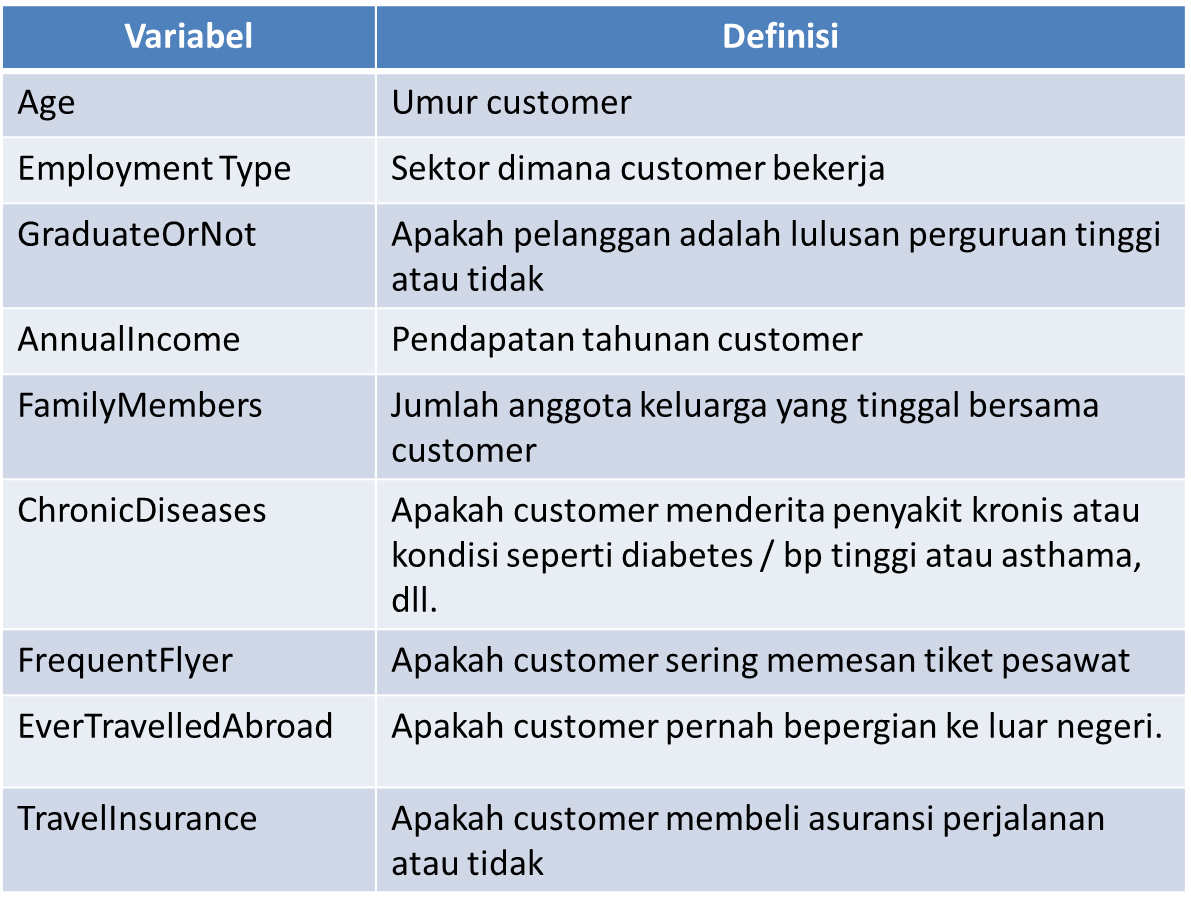

## EDA

### Statistik Deskriptif Data

In [146]:
# Cek dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


**Intepretasi**
- Data terdiri dari 8 kolom fitur, 1 kolom target, dan 1987 baris data.
- Kolom age, annual income, family members, chronic diseases dan travel insurance bertipe integer.
- Kolom employment type, graduate or not, frequent flyer, dan ever travelled abroad bertipe object. 
- Keempat kolom yang bertipe object pada point nomor 3 merupakan data Boolean yang bisa dilakukan feature encoding pada stage selanjutnya.
- Pada dataset ini, tidak ditemukan data null maupun NaN.


In [147]:
# Cek data duplikat
df.duplicated(subset = ['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad',"TravelInsurance"]).sum()

738

Pada dataset ini kita tidak menginclude pengecekan data duplikat pada data index dan tidak ditemukan sebanyak 738 baris data duplikat.
Data duplikat tersebut tidak di drop terlebih dahulu pada step ini, dan akan dilakukan pada stage 2 pada saat tahap data preprocessing.


In [149]:
df.shape

(1987, 10)

In [148]:
# Melihat isi Unique pada Coloumn
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("") 

index :
[   0    1    2 ... 1984 1985 1986]

Age :
[31 34 28 25 33 26 32 29 35 30 27]

Employment Type :
['Government Sector' 'Private Sector/Self Employed']

GraduateOrNot :
['Yes' 'No']

AnnualIncome :
[ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]

FamilyMembers :
[6 7 4 3 8 9 5 2]

ChronicDiseases :
[1 0]

FrequentFlyer :
['No' 'Yes']

EverTravelledAbroad :
['No' 'Yes']

TravelInsurance :
[0 1]



In [176]:
#Memisahkan data numerik dan data kategorik
num = ['Age','AnnualIncome','FamilyMembers']
cat = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']

In [177]:
# Melihat Statistika Deskriptif Data Numerik
df[num].describe()

Age  AnnualIncome  FamilyMembers
count  1987.000000  1.987000e+03    1987.000000
mean     29.650226  9.327630e+05       4.752894
std       2.913308  3.768557e+05       1.609650
min      25.000000  3.000000e+05       2.000000
25%      28.000000  6.000000e+05       4.000000
50%      29.000000  9.000000e+05       5.000000
75%      32.000000  1.250000e+06       6.000000
max      35.000000  1.800000e+06       9.000000

**Intepretasi**
- Range data min dan max masih bisa dikatakan wajar atau belum terlihat adanya data yang berbeda signifikan di setiap kolom
- Nilai mean dan median tidak terlampau jauh untuk setiap kolomnya
- Pada kolom age dan annual income nilai mean > median, sehingga datanya positively skewed.
- Sedangkan data family member negatively skewed karena nilai mean < median. 


In [178]:
df[cat].describe()

Employment Type GraduateOrNot FrequentFlyer  \
count                           1987          1987          1987   
unique                             2             2             2   
top     Private Sector/Self Employed           Yes            No   
freq                            1417          1692          1570   

       EverTravelledAbroad  
count                 1987  
unique                   2  
top                     No  
freq                  1607

**Intepretasi**

Mayoritas customer pada dataset ini berasal dari private sector / self employed dan graduate. Namun, kebanyakan customer bukan frequent flyer dan never travelled abroad. (lebih dari 70%). 

### Univariate Analysis

**Boxplot**

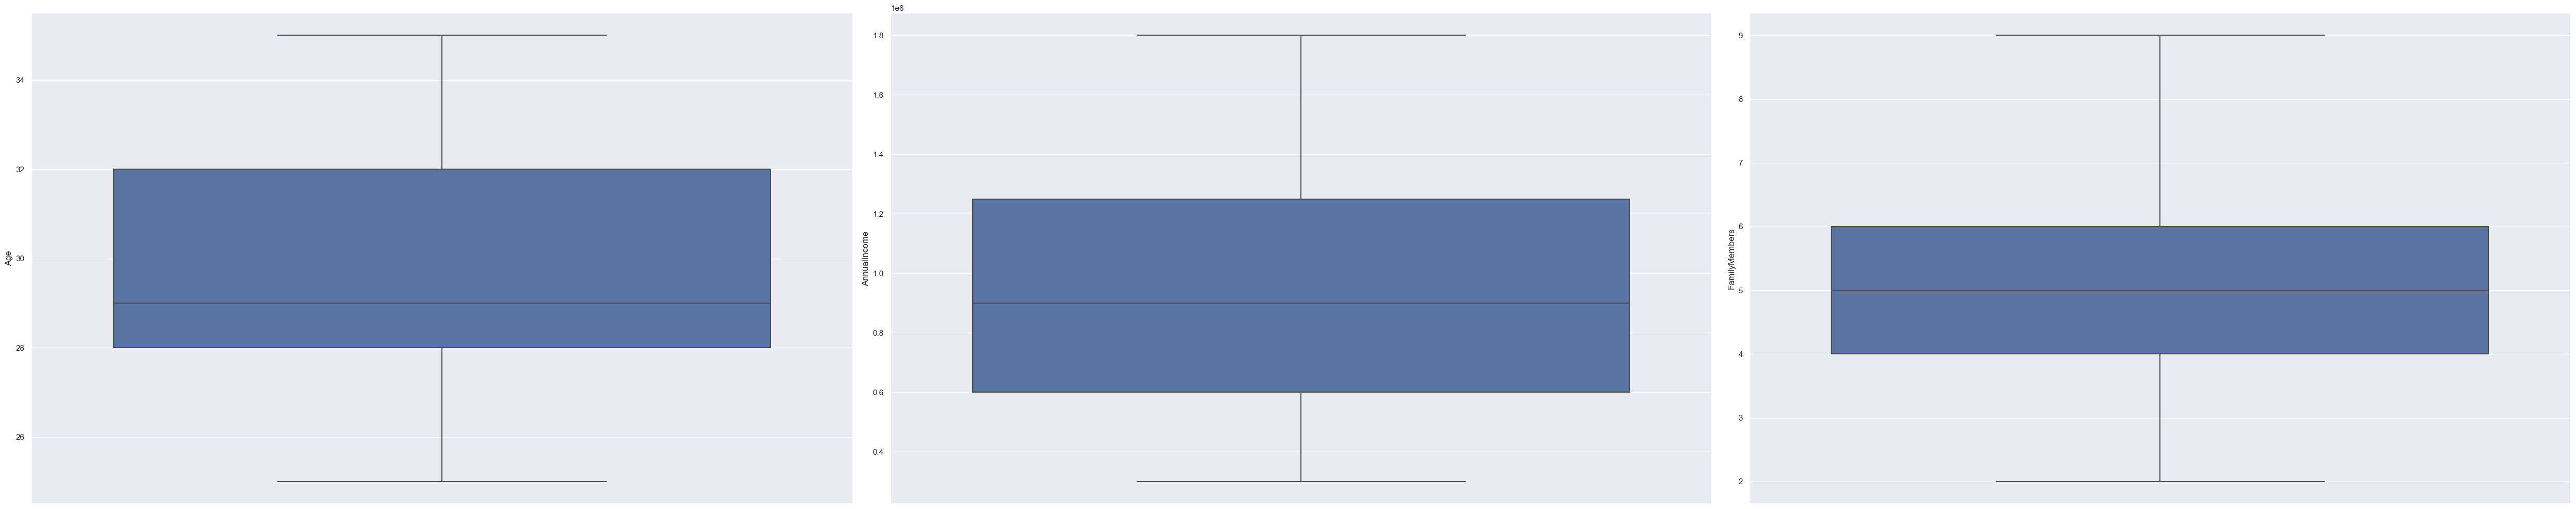

In [153]:
for i in range(0,len(num)) :
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]],  orient = 'v')
    plt.tight_layout()

Berdasarkan grafik boxplot diatas dapat diketahui bahwa data dari variabel yang berjenis numerikal **'Age', 'AnnualIncome', dan 'FamilyMember'** tidak memiliki outliers.

**Single Distribution**

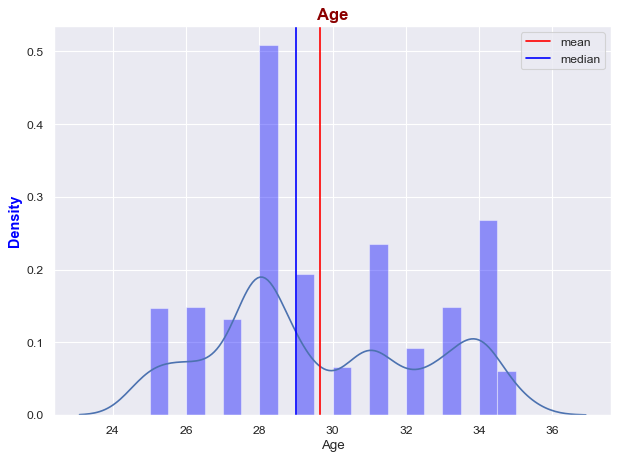

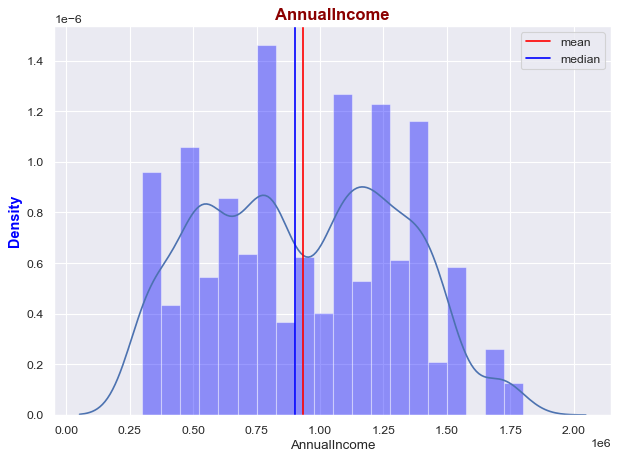

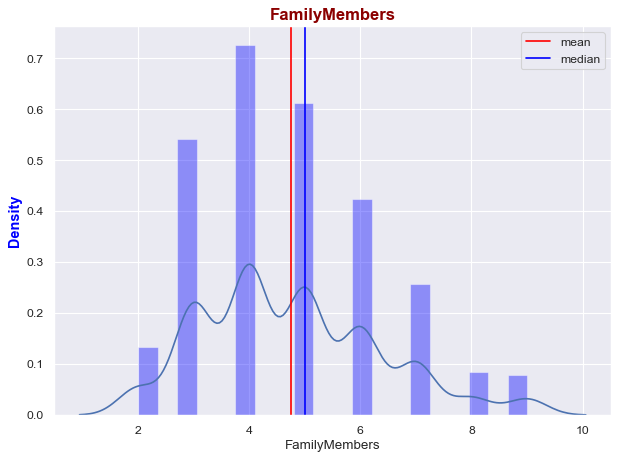

In [154]:
title_font = { "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"color" : "blue", "weight" : "bold", "size" : 13}

for i in list(num):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, color = "blue"), bins = 20)
    
    plt.axvline(df[i].describe()['mean'], color = 'red', label = 'mean')
    plt.axvline(df[i].describe()['50%'], color = 'blue', label = 'median')
    
    
    plt.title(i, fontdict = title_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.legend()
    plt.show()

In [155]:
#skewness value
for i in range(0, len(num)):
    print(f"Skewness {df[num].columns[i]} : {df[num[i]].skew()}")

Skewness Age : 0.23962475139295264
Skewness AnnualIncome : 0.07841699043593056
Skewness FamilyMembers : 0.5611969123054563


**Intepretasi**
- Variabel Age dan AnnualIncome bersifat positevely skew karena mean > median dan plot menjorok kekanan sedangkan FamilyMember bersifat negatively skew karena median > mean dan plot menjorok ke kekiri.

- Variabel Age dan AnnualIncome persebaran datanya simetris karena skewness value berada diantara -0,5 dan 0,5 sedangkan variabel FamilyMembers persebaran datanya moderately skewkarena skewness value berada diantara 0.5 dan 1.


**Numerical Values**

**Age**

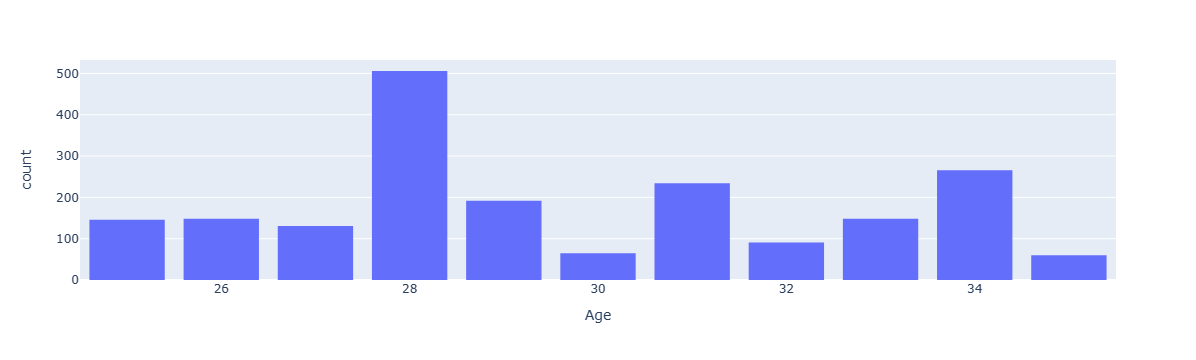

In [156]:
fig=px.histogram(df[num],'Age')
fig.update_layout(bargap=0.2)
fig.show()

In [157]:
df[num].stb.freq(['Age'], cum_cols = False)

Age  count    percent
0    28    506  25.465526
1    34    266  13.387016
2    31    234  11.776548
3    29    192   9.662808
4    33    148   7.448415
5    26    148   7.448415
6    25    146   7.347760
7    27    131   6.592854
8    32     91   4.579768
9    30     65   3.271263
10   35     60   3.019628

**Intepretasi**

- Tiga usia customer terbanyak pada dataset ini adalah usia 28, 34, dan 31 
- Pada histogram tersebut mayoritas customer berusia 28 tahun dengan presentasi 25,4% dari keseluruhan data


**Annual Income**

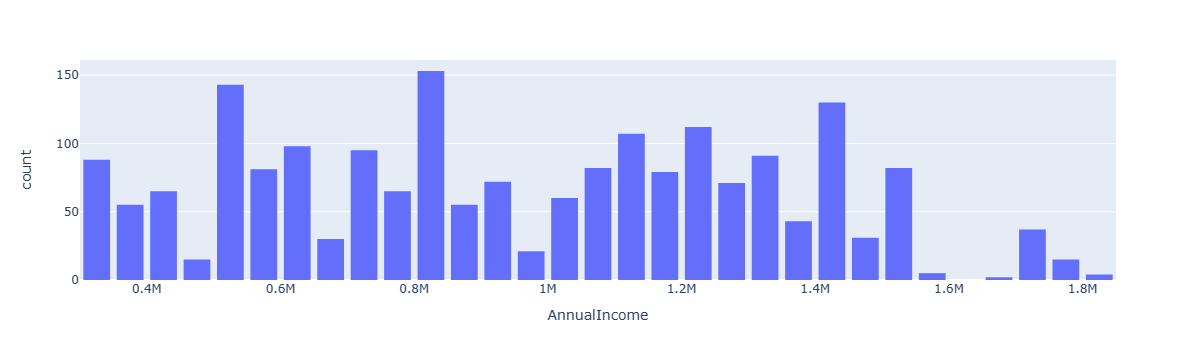

In [158]:
fig=px.histogram(df[num], 'AnnualIncome')
fig.update_layout(bargap=0.2)
fig.show()

In [159]:
df[num].stb.freq(['AnnualIncome'], cum_cols=False)

AnnualIncome  count   percent
0         800000    153  7.700050
1         500000    143  7.196779
2        1400000    130  6.542526
3        1200000    112  5.636638
4        1100000    107  5.385003
5         600000     98  4.932058
6         700000     95  4.781077
7        1300000     91  4.579768
8         300000     88  4.428787
9        1500000     82  4.126824
10       1050000     82  4.126824
11        550000     81  4.076497
12       1150000     79  3.975843
13        900000     72  3.623553
14       1250000     71  3.573226
15        750000     65  3.271263
16        400000     65  3.271263
17       1000000     60  3.019628
18        850000     55  2.767992
19        350000     55  2.767992
20       1350000     43  2.164066
21       1700000     37  1.862104
22       1450000     31  1.560141
23        650000     30  1.509814
24        950000     21  1.056870
25       1750000     15  0.754907
26        450000     15  0.754907
27       1550000      5  0.251636
28       1800000      4  0.201309
29       1650000      2  0.100654

**Intepretasi**

- Tiga annual income tertinggi customer pada dataset ini adalah 0.5, 0.8, dan 1.4 INR
- Pada histogram tersebut mayoritas customer memiliki annual income 800.000 dengan presentasi 7,7% dari keseluruhan data


**Family Member**

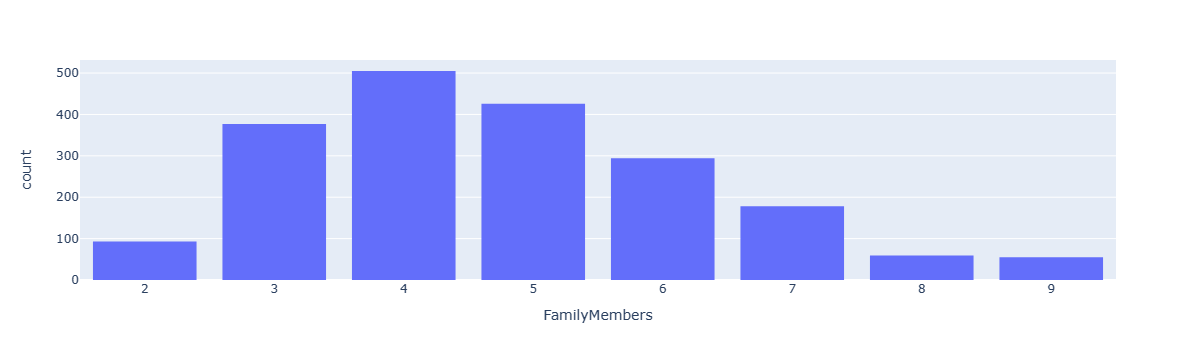

In [160]:
fig=px.histogram(df[num], 'FamilyMembers')
fig.update_layout(bargap=0.2)
fig.show()

In [161]:
df[num].stb.freq(['FamilyMembers'], cum_cols=False)

FamilyMembers  count    percent
0              4    505  25.415199
1              5    426  21.439356
2              3    377  18.973327
3              6    294  14.796175
4              7    178   8.958228
5              2     93   4.680423
6              8     59   2.969300
7              9     55   2.767992

**Intepretasi**

- Tiga customer teratas memiliki family members 3 sampai 5 orang
- Pada histogram tersebut mayoritas customer memiliki 4 family members dengan presentase 25,41% dari keseluruhan data


**Categorical Data**

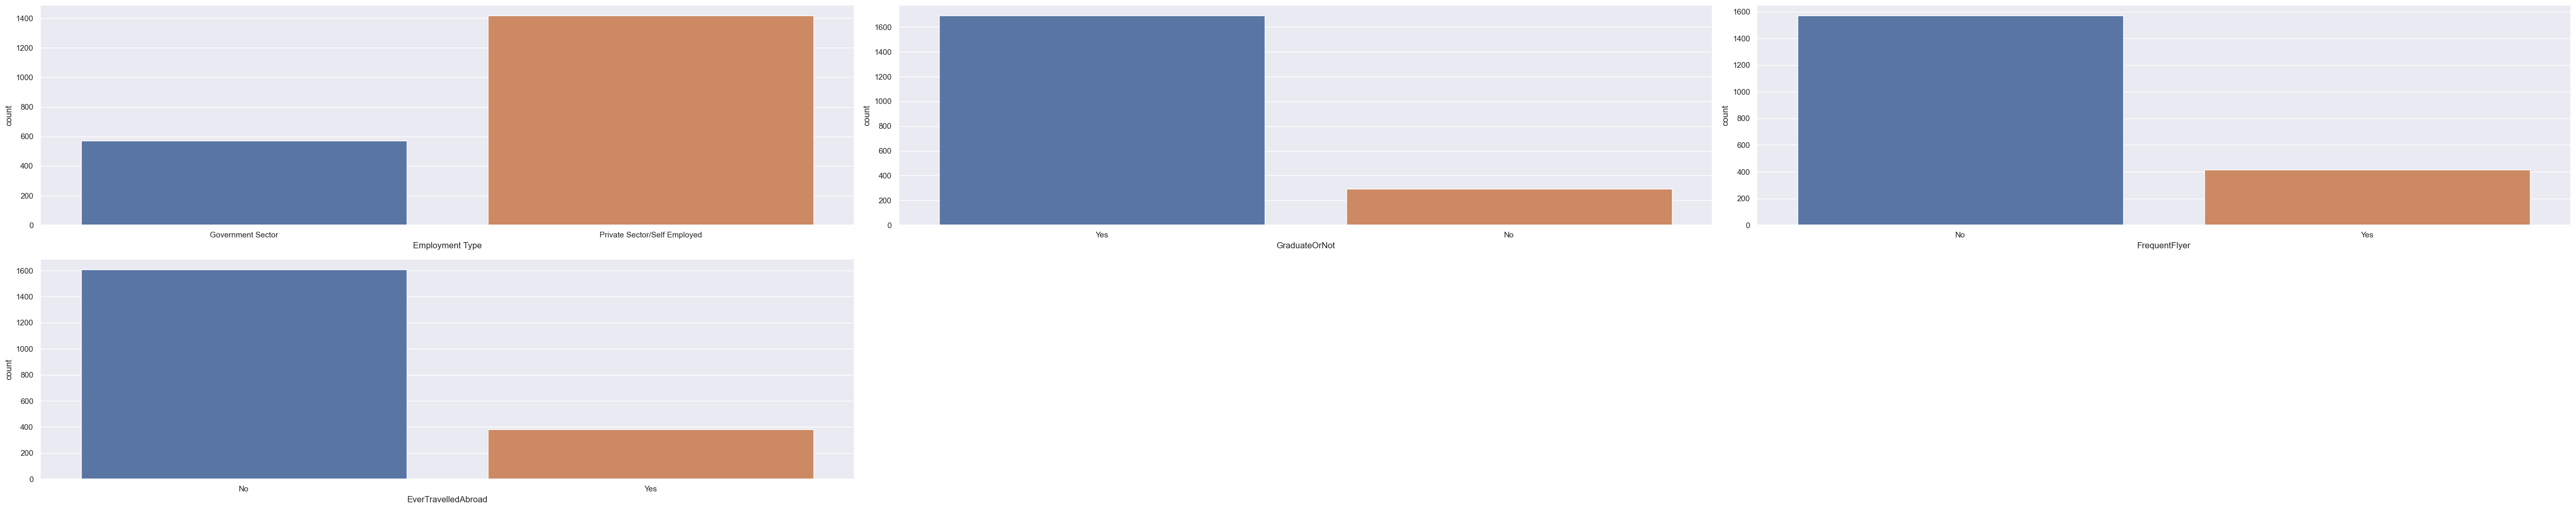

In [162]:
features = cat
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[cat[i]])
  plt.tight_layout()

In [163]:
# Employment Type
df[cat].stb.freq(['Employment Type'], cum_cols=False)

Employment Type  count    percent
0  Private Sector/Self Employed   1417  71.313538
1             Government Sector    570  28.686462

In [164]:
# Graduatee Or Not
df[cat].stb.freq(['GraduateOrNot'], cum_cols=False)

GraduateOrNot  count    percent
0           Yes   1692  85.153498
1            No    295  14.846502

In [165]:
# Frequent Flyer
df[cat].stb.freq(['FrequentFlyer'], cum_cols=False)

FrequentFlyer  count    percent
0            No   1570  79.013588
1           Yes    417  20.986412

In [166]:
# Ever Traveled Abroad
df[cat].stb.freq(['EverTravelledAbroad'], cum_cols=False)

EverTravelledAbroad  count    percent
0                  No   1607  80.875692
1                 Yes    380  19.124308

In [167]:
# Chronic Diseases
df.stb.freq(['ChronicDiseases'], cum_cols=False)

ChronicDiseases  count    percent
0                0   1435  72.219426
1                1    552  27.780574

In [168]:
# Travel Insurance
df.stb.freq(['TravelInsurance'], cum_cols=False)

TravelInsurance  count   percent
0                0   1277  64.26774
1                1    710  35.73226

**Intepretasi**

- Mayoritas Individu dengan 71.31% dari keseluruhan populasi bekerja di private sector (perusahaan swasta) dan self employment atau bekerja mandiri.
- Mayoritas Individu yang terdaftar dengan 85,15% dari keseluruhan populasi merupakan lulusan kuliah.
- Mayoritas individu yang terdaftar dengan 79.01% dari populasi jarang berpergian menggunakan layanan penerbangan.
- Mayoritas individu yang terdaftar dengan 72,21% dari populasi tidak mengidap penyakit kronis.
- Mayoritas individu dengan 80,87% dari keseluruhan populasi tidak pernah bepergian keluar negeri
- Mayoritas individu dengan 64,26% dari keseluruhan populasi belum membeli travelinsurance

**Follow Up yang perlu dilakukan di Data Processing berdasarkan hasil analisis** 


**Data Cleansing**

- Tidak perlu dilakukan handling missing value karena tidak adanya data yang null
- Terdapat 738 duplicate data yang perlu diremove.
- Terdapat beberapa features yang bertipe jenis kategorikal yang perlu dilakukan feature encoding dan transformation (FamilyMembers, FrequentFlyer, EverTravelledAbroad, ChronicDisseases, GraduateOrNot, dan Employment Type). 
- Terpantau datasetnya imbalance dilihat dari persebaran kolom target travel insurance. Pada data processing perlu dilakukan Smote / Weight Class Sampling / Oversampling / Undersampling.
- Tidak terdapat adanya outliers sehingga tidak perlu dilakukannya handling outliers.


**Feature Engineering**

- Melakukan feature selection dengan menggunakan Chi Square (Feature Kategorik -> Target Kategorik) dan Anova (Feature Numerik -> Target Kategorik).
- Mungkin bisa melakukan feature extraction dengan membuat feature baru yakni income per capita yang didapat dari kolom (Annual Income / Family Member) dan lain sebagainya.


### Multivariate Analysis

**Correlation by Heatmap**

In [170]:
# Melakukan Categorial Encoding agar data kategorik bisa ditampilkan di heatmap
df['Employment Type']=df['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0,'Yes':1})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0,'Yes':1})

<Axes: >

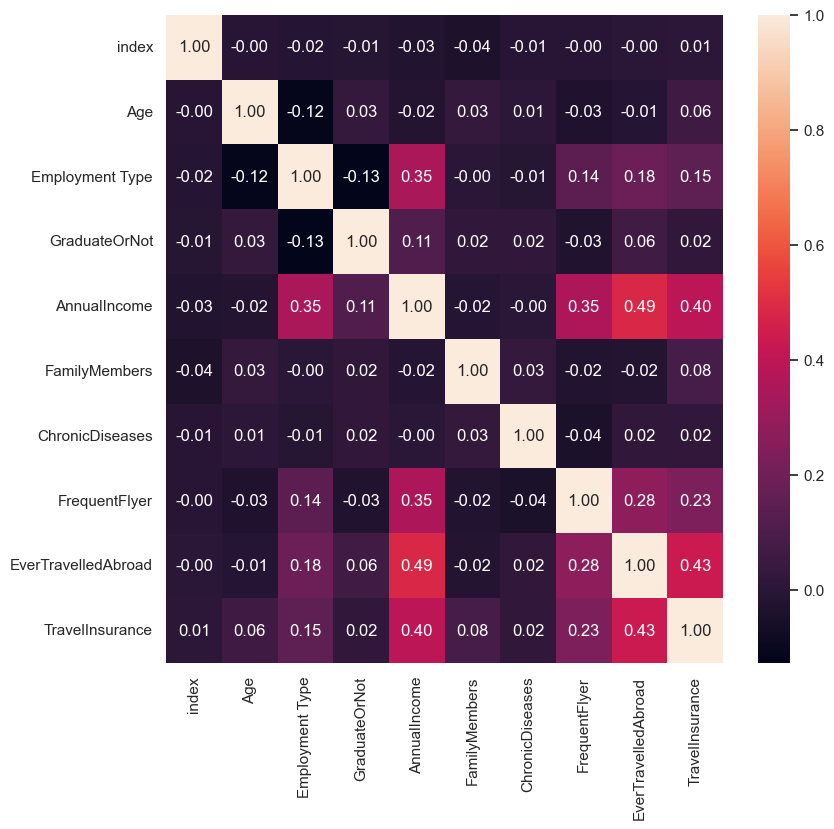

In [171]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**Intepretasi hasil korelasi heatmap**

- Variabel AnnualIncome dan EverTravelledAbroad  memiliki korelasi positif yang cukup kuat terhadap Travel Insurance karena rentang nilainya diatas atau sama dengan 0.4. Artinya semakin besar variabel AnnualIncome dan EverTravelledabroad maka semakin besar pula nilai travel insurance-nya.

- Variabel FrequentFlyer memiliki korelasi positif moderat terhadap Travel Insurance karena nilai korelasinya berada pada rentang 0.2 hingga 0.4.

- Variabel Age, EmploymentType, GraduateOrNot, FamilyMembers, Chronic Diseasses memiliki korelasi positif rendah terhadap TravelInsurance karena nilai korelasinya berada pada 0.0 hingga 0.2. Hal ini berarti 5 variabel diatas memiliki kemungkinan kecil dalam mempengaruhi pembelian Travel Insurance.

- EmploymentType dan FrequentFlyers memiliki korelasi positif moderat terhadap AnnualIncome karena nilai korelasinya berada pada nilai 0.2 hingga 0.4. Hal ini berarti EmploymentType dan FrequentFlyers  memiliki kemungkinan mempengaruhi pembelian travel insurance secara tidak langsung lewat variabel AnnualIncome.

- Variabel EmployementType, EverTravelledAbroad, AnnualIncome,dan FrequentFlyers perlu dianalisis lebih dalam karena dapat memberikan business insight berharga bagi peningkatan Travel Insurance.

- Variabel Travel Insurance terdeteksi memiliki class imbalance  ringan maka nantinya perlu dilakukan smote / weight class sampling / oversampling / undersampling di data processing.


Sumber : https://www.simplypsychology.org/correlation.html

**Correlation and Distribution by Pairplot**

<Figure size 400x400 with 0 Axes>

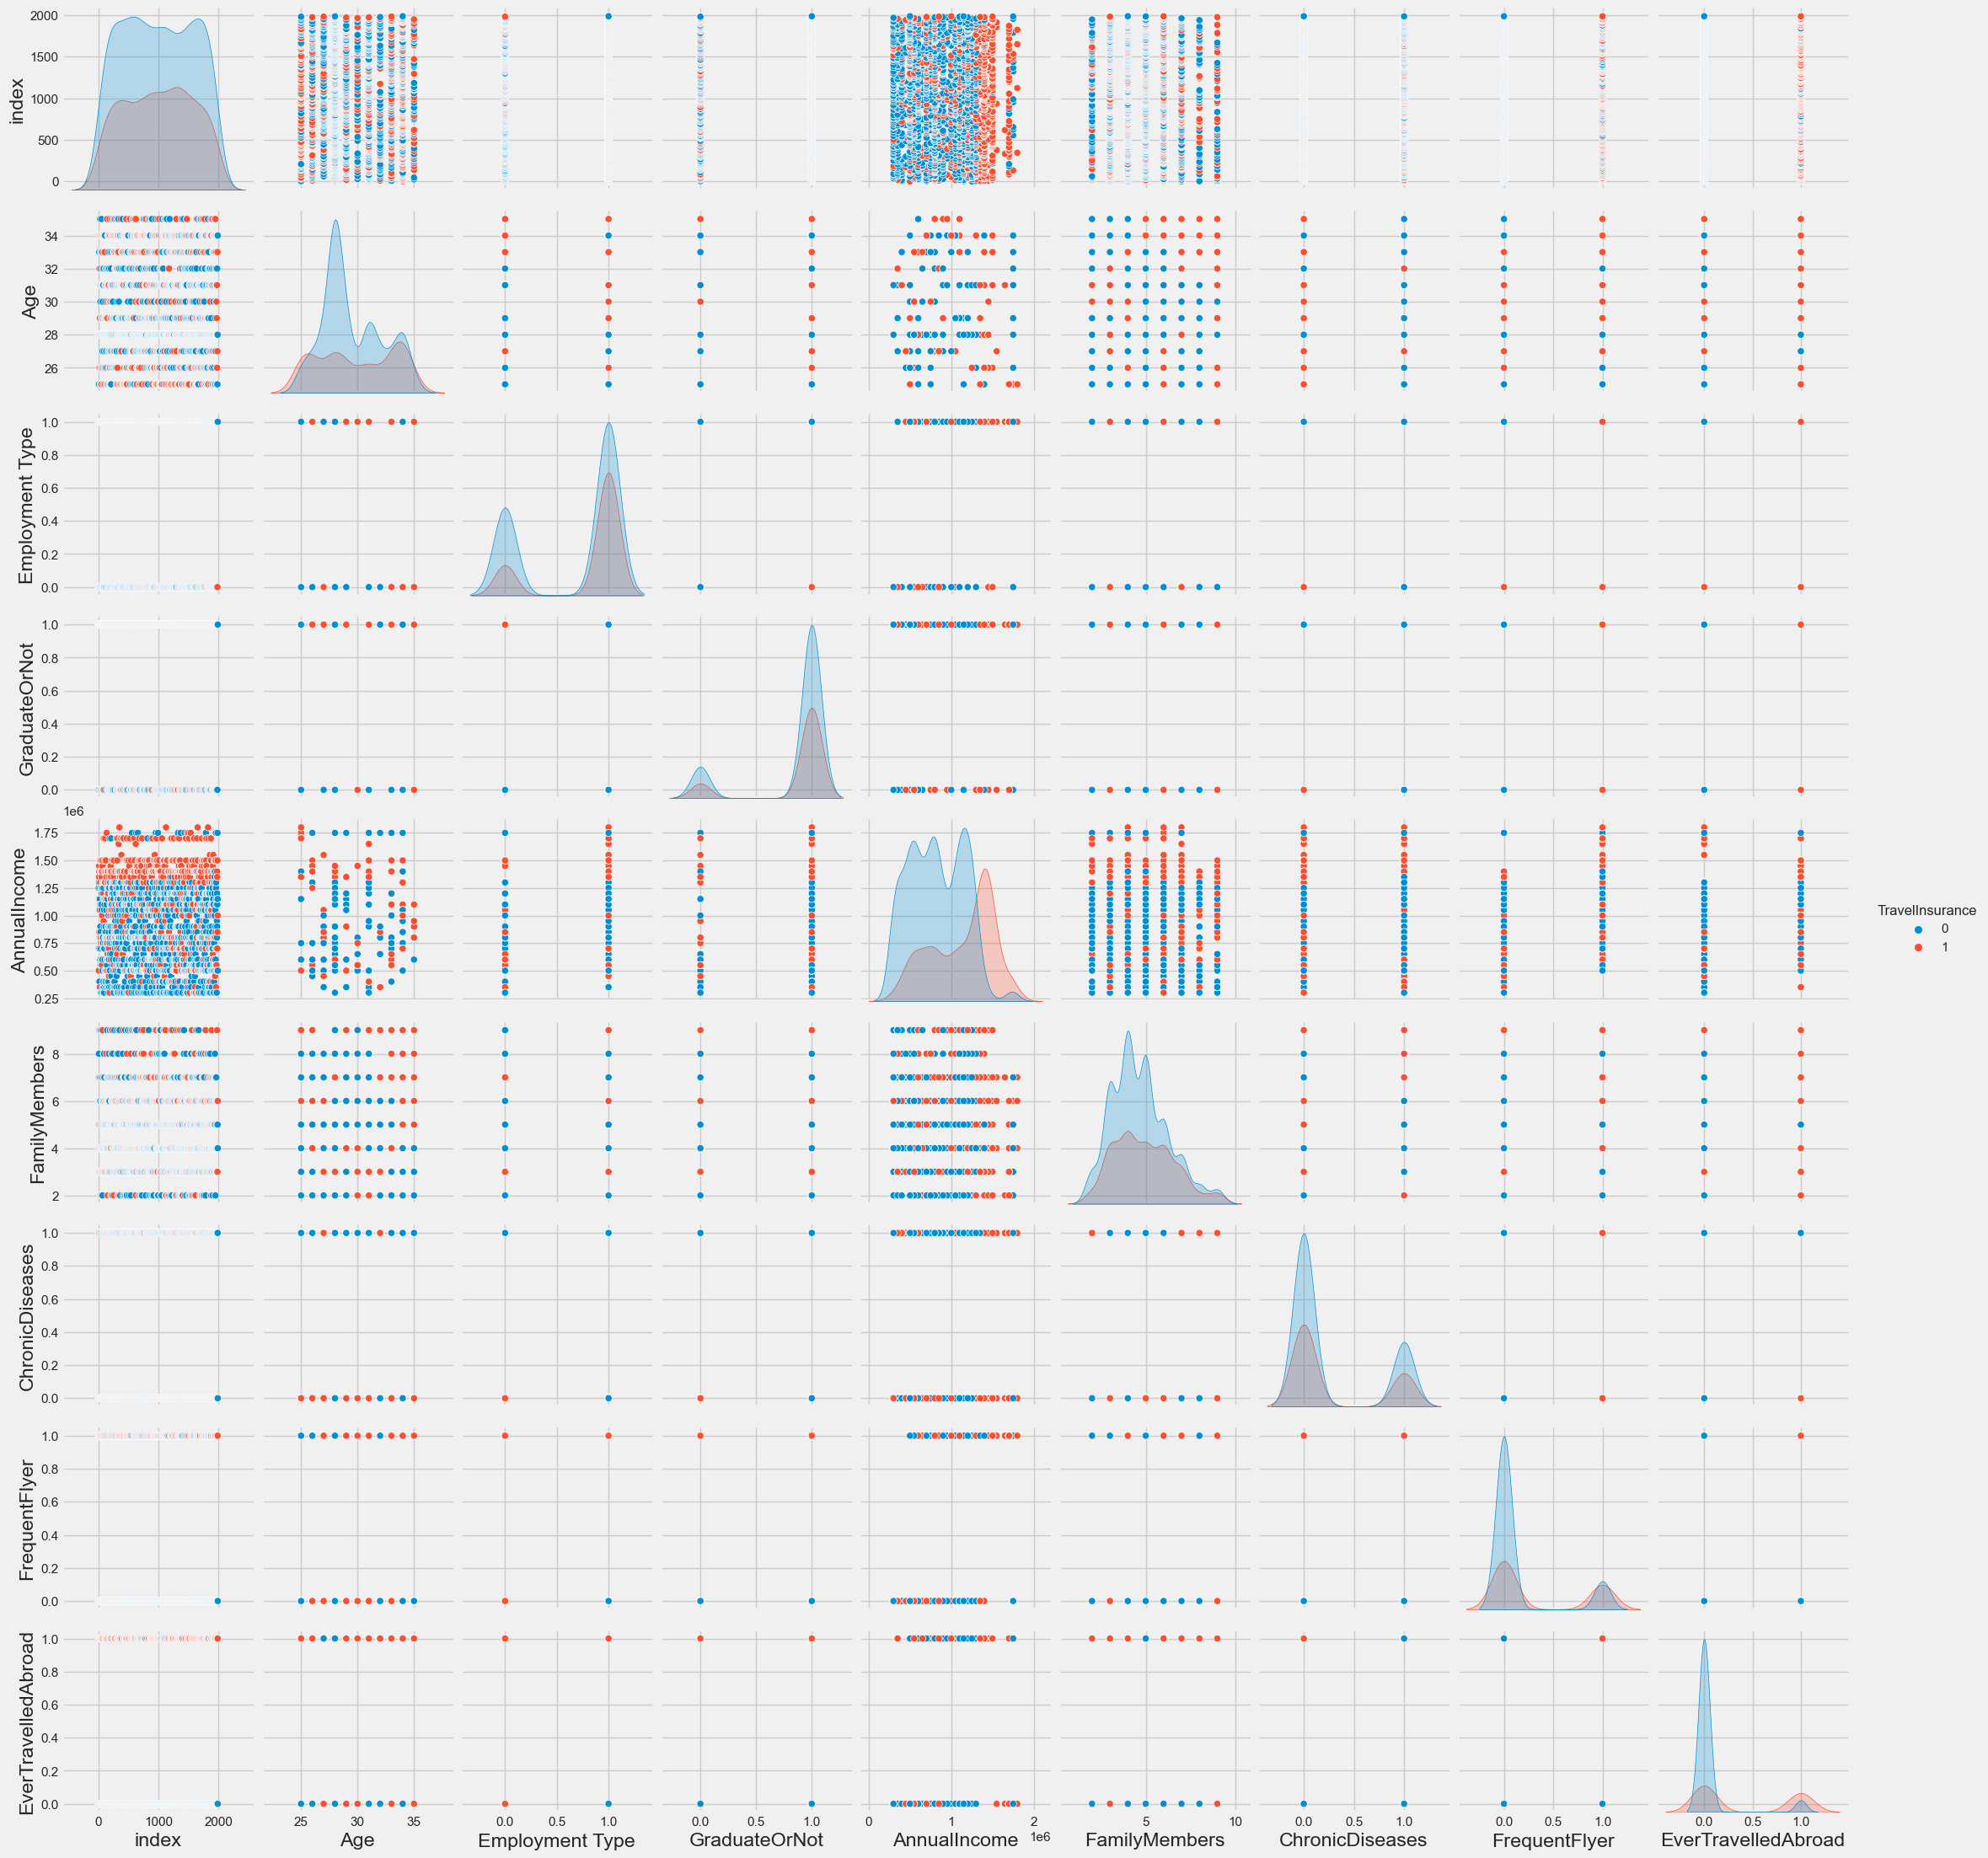

In [91]:
#pallet size
plt.figure(figsize=(4,4))

#pairplot
sns.pairplot(df, diag_kind='kde', hue='TravelInsurance')

plt.show()

**Intepretasi Korelasi dan Distribusi menggunakan Pairplot**

- Berdasarkan grafik pairplot diatas, kita dapat melihat bahwa jumlah data yang ada belum mampu menunjukan korelasi dan distribusi dari keseluruhan data terhadap variabel lainnya.

- Perlu dilakukan pengecekan lebih lanjut dengan menggunakan multibarplot pada variabel terhadap feature vs Target sehingga dapat diperoleh gambaran besar untuk business insightnya.

**A.Feature VS Target**

**1.Age VS TravelInsurance**

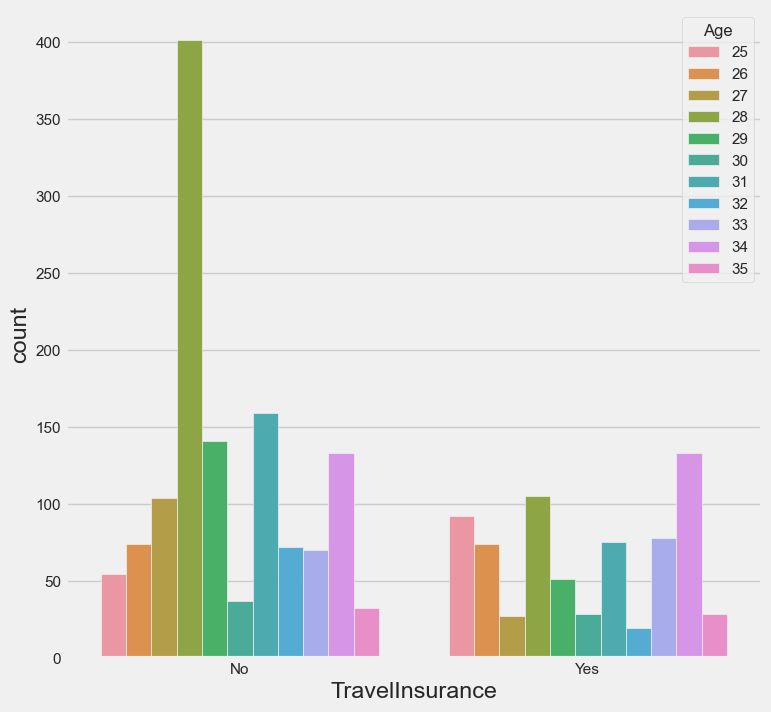

In [92]:
df_travel_age = df.copy()
df_travel_age['TravelInsurance'] = df_travel_age['TravelInsurance'].astype(str)
df_travel_age['TravelInsurance'] = df_travel_age['TravelInsurance'].replace(['0','1'], ['No','Yes'])


fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='Age',x='TravelInsurance',data=df_travel_age)
plt.show()

In [93]:
df_age_travel = df.copy()
df_age_travel = pd.pivot_table(df_age_travel,
                              index=['Age'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_age_travel.columns =[0,1]
df_age_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_age_travel.drop([0],axis=1,inplace=True)
df_age_travel.reset_index(inplace=True)
df_age_travel['Total_Buy_Travel_Insurance'] = df_age_travel['Buy_Travel_Insurance'].sum()
df_age_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_age_travel['Buy_Travel_Insurance']/(df_age_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_age_travel

Age  Buy_Travel_Insurance  Total_Buy_Travel_Insurance  \
0    25                    92                         710   
1    26                    74                         710   
2    27                    27                         710   
3    28                   105                         710   
4    29                    51                         710   
5    30                    28                         710   
6    31                    75                         710   
7    32                    19                         710   
8    33                    78                         710   
9    34                   133                         710   
10   35                    28                         710   

    Rasio customer yang telah membeli Travel Insurance(%)  
0                                               12.96      
1                                               10.42      
2                                                3.80      
3                                               14.79      
4                                                7.18      
5                                                3.94      
6                                               10.56      
7                                                2.68      
8                                               10.99      
9                                               18.73      
10                                               3.94

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


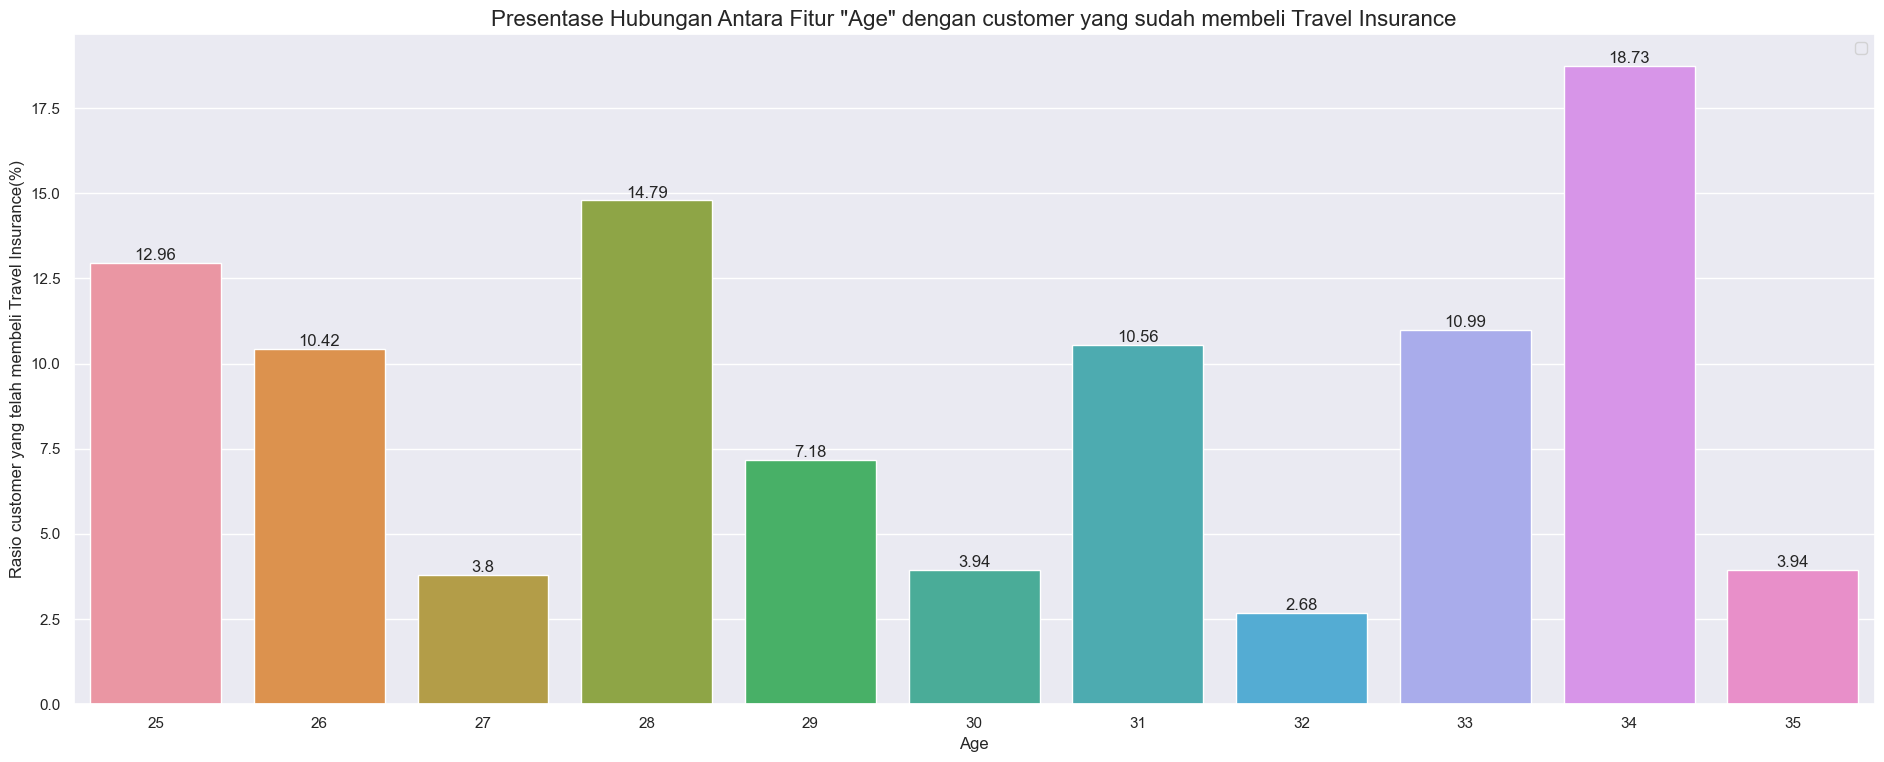

In [94]:
# Visualisasi Persenan
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='Age', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_age_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "Age" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (20.7,8.27)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance berada pada umur 34 tahun dengan 18,73% dari list customer yang terdaftar di travel insurance.

- Customer dengan umur 28 tahun merupakan customer mayoritas yang belum membeli travel insurance. Walaupun begitu dalam list customer yang terdaftar di travel insurance umur 28 tahun berada pada nomer ke-2 terbanyak, hal ini berarti customer dengan umur 28 tahun dapat menjadi target dengan jumlah yang besar karena memiliki populasi besar yang belum terjamah, namun memiliki ketertarikan terhadap travel insurance yang cukup tinggi.

- Top 3 jumlah terbanyak yang membeli travel insurance ada pada umur 34, 28, dan 25.


**2.EmploymentType Vs TravelInsurance**

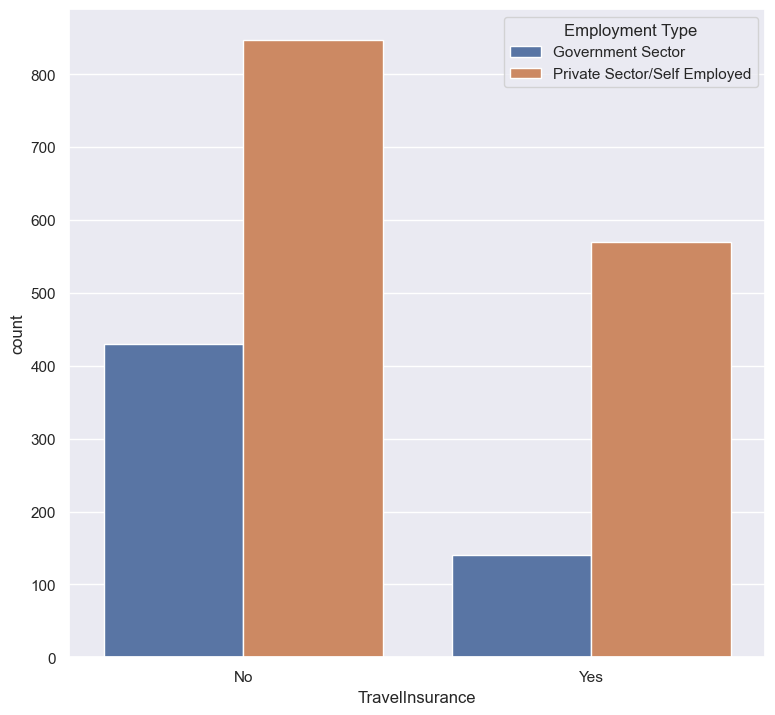

In [95]:
df_travel_EmploymentType = df.copy()
df_travel_EmploymentType['TravelInsurance'] = df_travel_EmploymentType['TravelInsurance'].astype(str)
df_travel_EmploymentType['TravelInsurance'] = df_travel_EmploymentType['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_EmploymentType['Employment Type'] = df_travel_EmploymentType['Employment Type'].astype(str)
df_travel_EmploymentType['Employment Type'] = df_travel_EmploymentType['Employment Type'].replace(['0','1'], ['Government Sector','Private Sector/Self Employed'])

fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='Employment Type',x='TravelInsurance',data=df_travel_EmploymentType)
plt.show()

In [96]:
# Mencari rasio persenan
df_EmploymentType_travel = df.copy()
df_EmploymentType_travel = pd.pivot_table(df_EmploymentType_travel,
                              index=['Employment Type'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_EmploymentType_travel.columns =[0,1]
df_EmploymentType_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_EmploymentType_travel.drop([0],axis=1,inplace=True)
df_EmploymentType_travel.reset_index(inplace=True)
df_EmploymentType_travel['Total_Buy_Travel_Insurance'] = df_EmploymentType_travel['Buy_Travel_Insurance'].sum()
df_EmploymentType_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_EmploymentType_travel['Buy_Travel_Insurance']/(df_EmploymentType_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_EmploymentType_travel

Employment Type  Buy_Travel_Insurance  Total_Buy_Travel_Insurance  \
0                0                   140                         710   
1                1                   570                         710   

   Rasio customer yang telah membeli Travel Insurance(%)  
0                                              19.72      
1                                              80.28

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


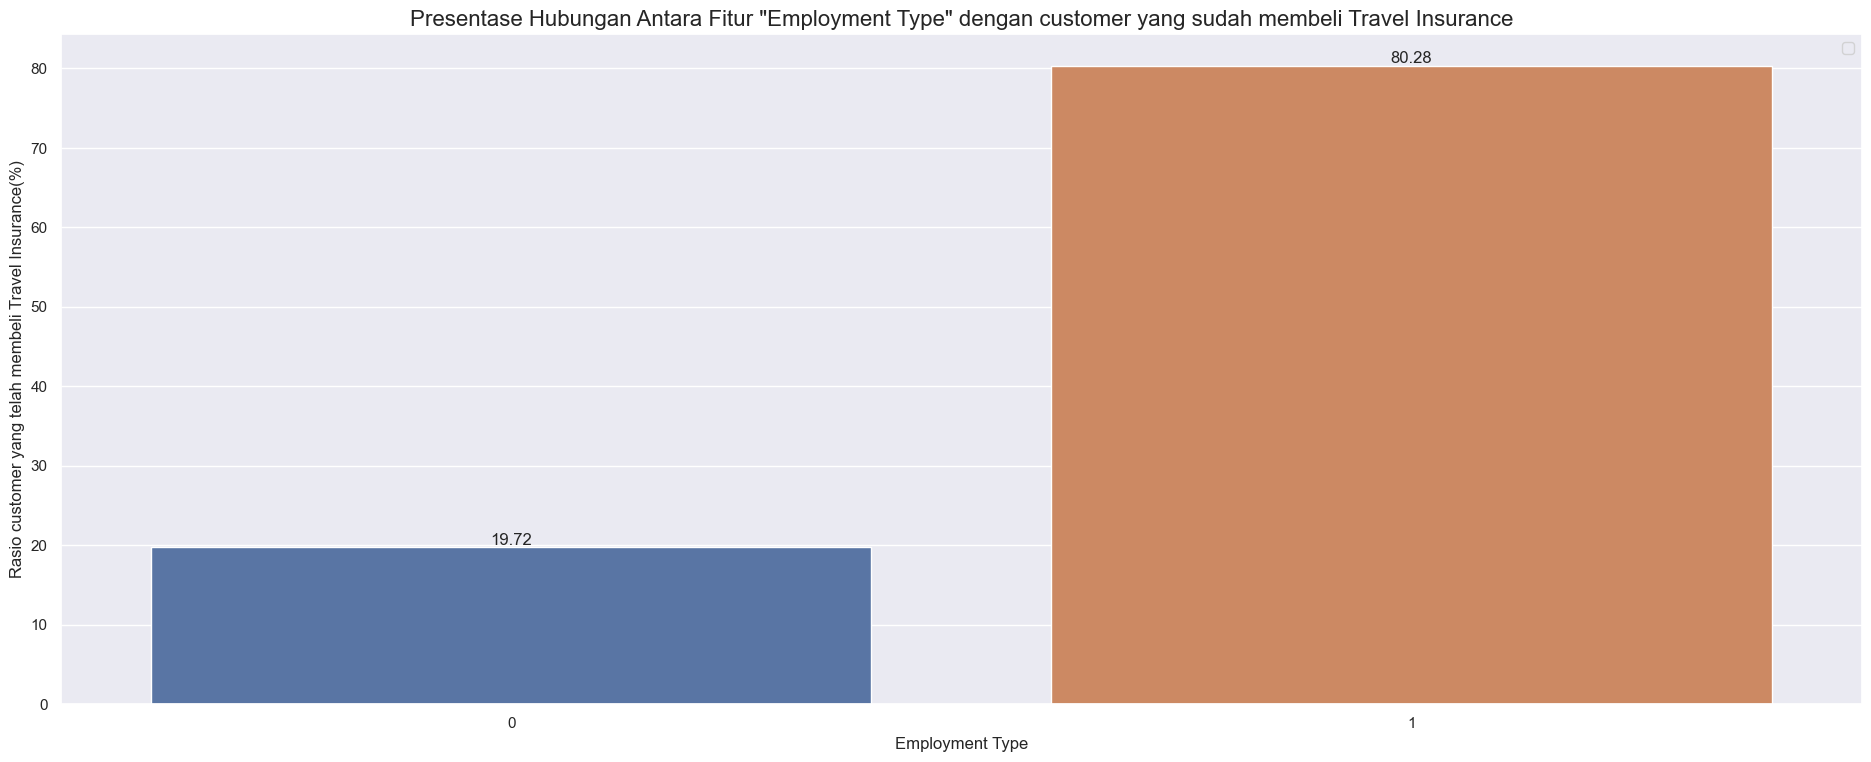

In [97]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='Employment Type', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_EmploymentType_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "Employment Type" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (20.7,8.27)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance bekerja di private sector/Self Employed dengan persentase 80.28%. Hal ini berbanding terbalik dengan customer yang bekerja di pemerintahan atau government sector yang hanya 19,72% saja.Penyebab ketimpangan ini mungkin dikarenakan di customer yang bekerja di perusahaan swasta atau wirausaha cenderung lebih sering berpergian ketimbang yang bekerja di pemerintahan.

- Pada marketing campaign nantinya lebih baik difokuskan pada customer yang bekerja di perusahaan swasta atau yang bekerja sebagai wiraswasta.


**3.GraduateOrNot VS TravelInsurance**

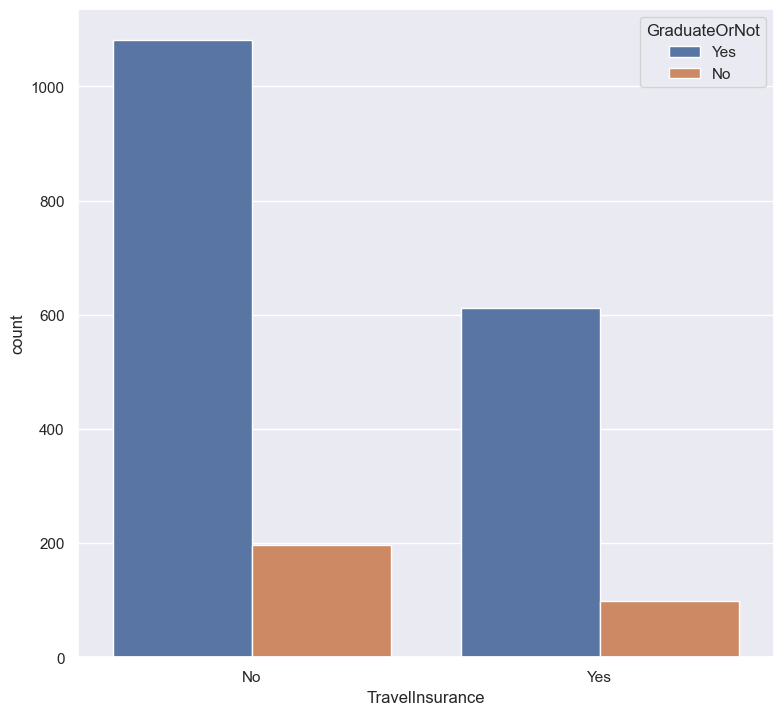

In [98]:
df_travel_GraduateOrNot = df.copy()
df_travel_GraduateOrNot['TravelInsurance'] = df_travel_GraduateOrNot['TravelInsurance'].astype(str)
df_travel_GraduateOrNot['TravelInsurance'] = df_travel_GraduateOrNot['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_GraduateOrNot['GraduateOrNot'] = df_travel_GraduateOrNot['GraduateOrNot'].astype(str)
df_travel_GraduateOrNot['GraduateOrNot'] = df_travel_GraduateOrNot['GraduateOrNot'].replace(['0','1'], ['No','Yes'])


fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='GraduateOrNot',x='TravelInsurance',data=df_travel_GraduateOrNot)
plt.show()

In [99]:
#Mencari rasio persenan
df_GraduateOrNot_travel = df.copy()
df_GraduateOrNot_travel = pd.pivot_table(df_GraduateOrNot_travel,
                              index=['GraduateOrNot'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_GraduateOrNot_travel.columns =[0,1]
df_GraduateOrNot_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_GraduateOrNot_travel.drop([0],axis=1,inplace=True)
df_GraduateOrNot_travel.reset_index(inplace=True)
df_GraduateOrNot_travel['Total_Buy_Travel_Insurance'] = df_GraduateOrNot_travel['Buy_Travel_Insurance'].sum()
df_GraduateOrNot_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_GraduateOrNot_travel['Buy_Travel_Insurance']/(df_GraduateOrNot_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_GraduateOrNot_travel

GraduateOrNot  Buy_Travel_Insurance  Total_Buy_Travel_Insurance  \
0              0                    99                         710   
1              1                   611                         710   

   Rasio customer yang telah membeli Travel Insurance(%)  
0                                              13.94      
1                                              86.06

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


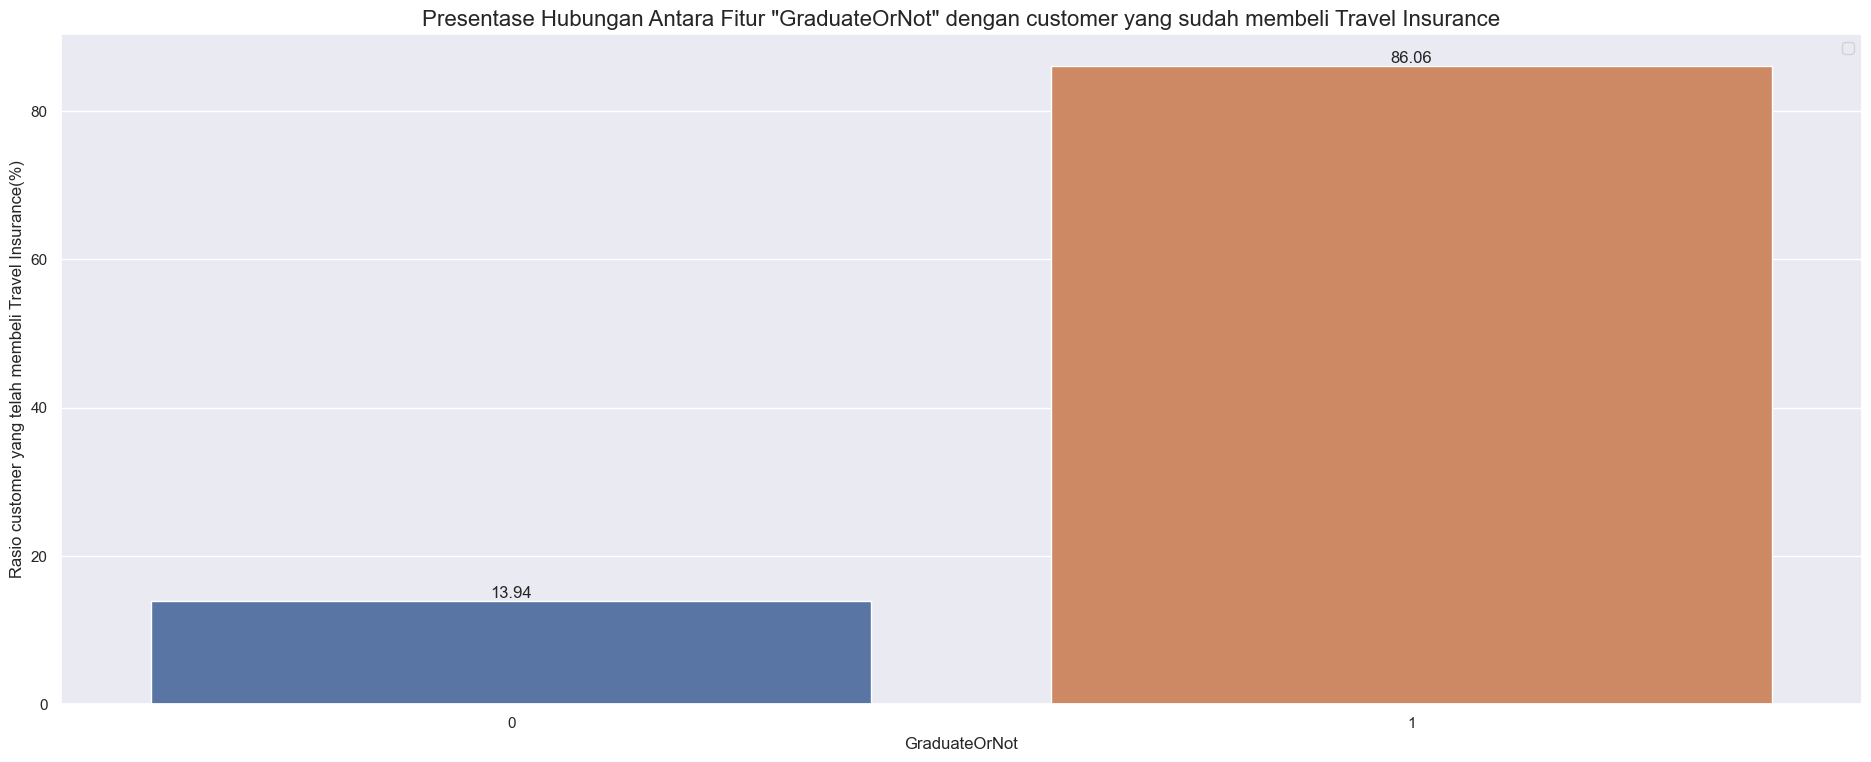

In [100]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='GraduateOrNot', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_GraduateOrNot_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "GraduateOrNot" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (10,8)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance belum lulus kuliah dengan persentase 86.06% dari list customer yang terdaftar di travel insurance.


- Pada marketing campaign nantinya tidak perlu spesifik menargetkan lulusan kuliah atau sajana, namun bisa lebih universal.


**4.AnnualIncome VS TravelInsurance**

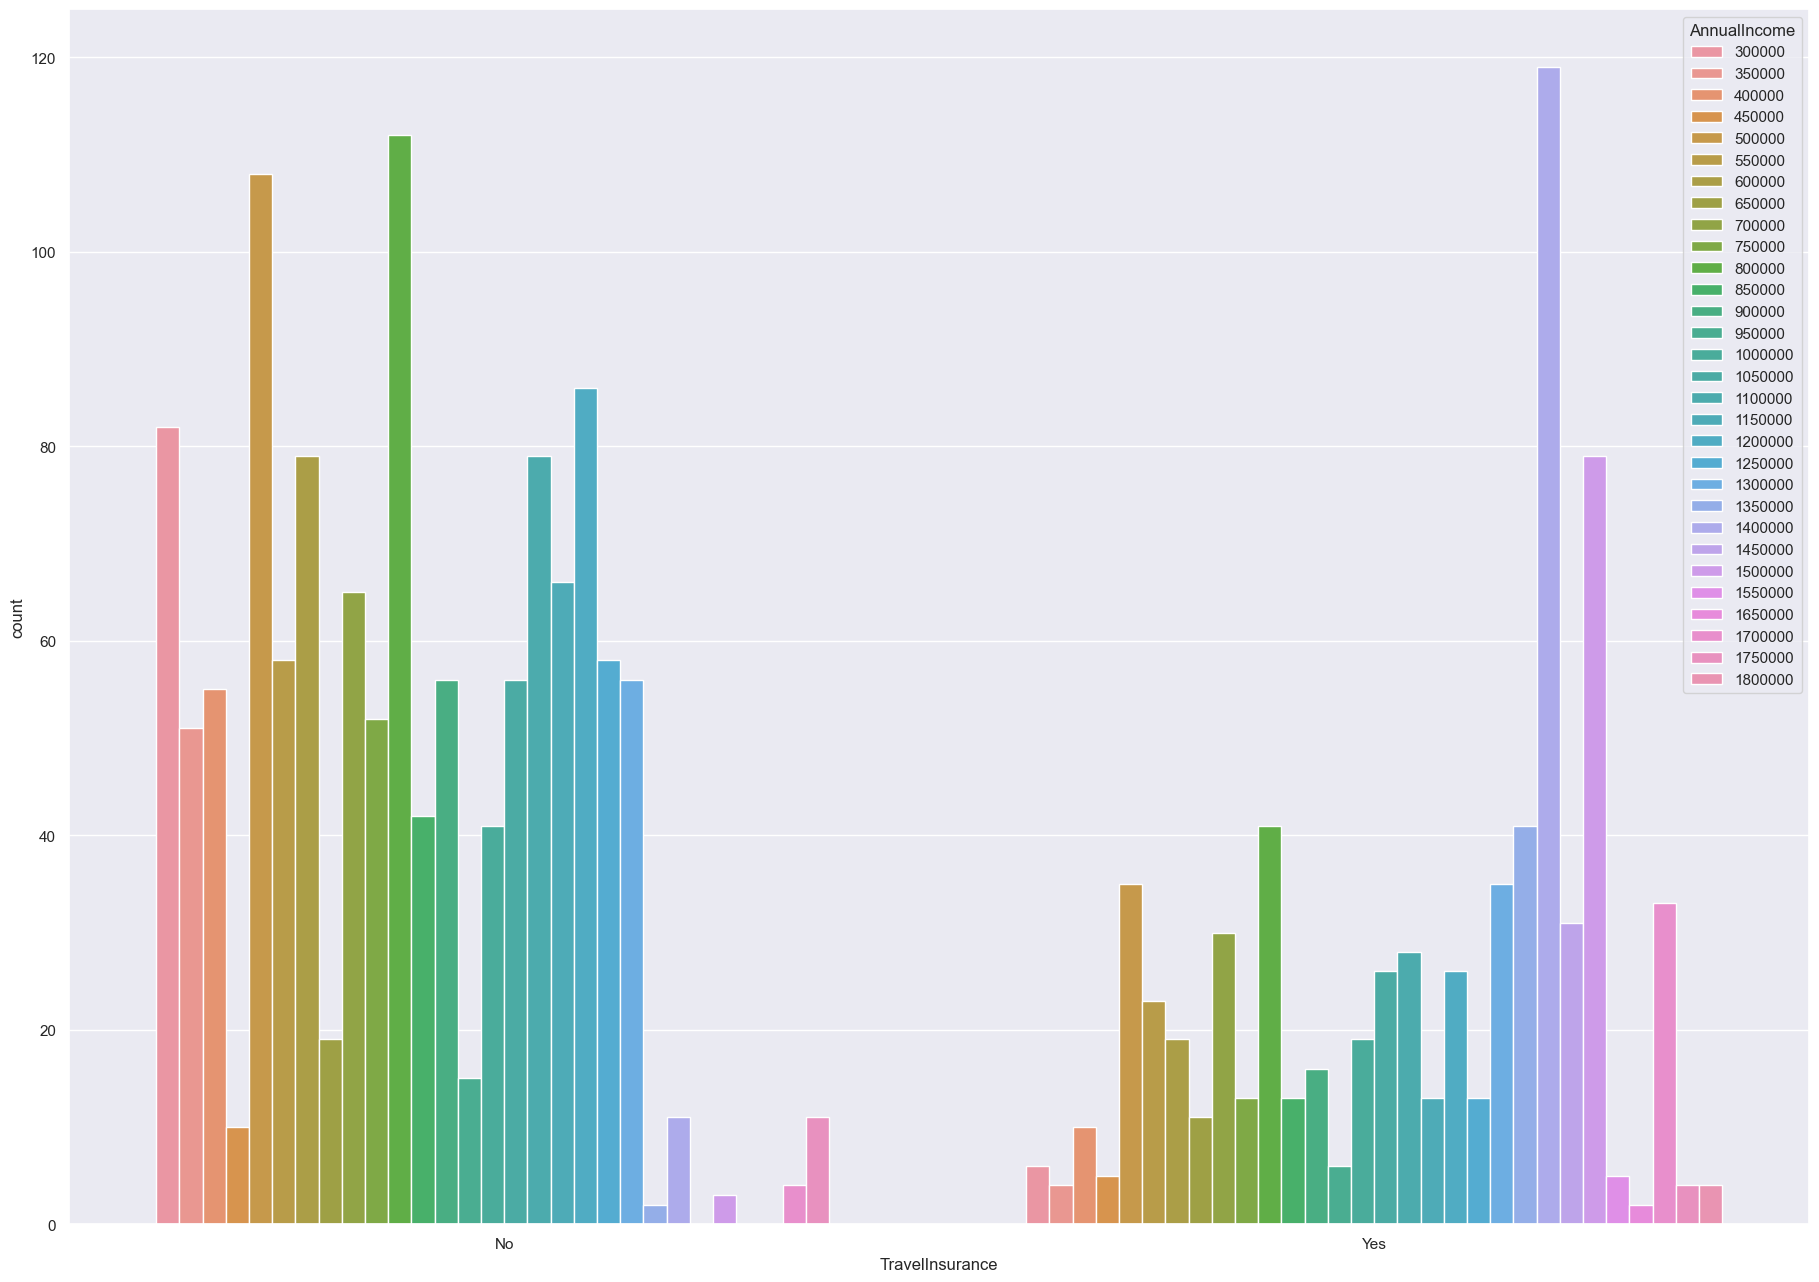

In [101]:
df_travel_AnnualIncome = df.copy()

df_travel_AnnualIncome['TravelInsurance'] = df_travel_AnnualIncome['TravelInsurance'].astype(str)
df_travel_AnnualIncome['TravelInsurance'] = df_travel_AnnualIncome['TravelInsurance'].replace(['0','1'], ['No','Yes'])



fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='AnnualIncome',x='TravelInsurance',data=df_travel_AnnualIncome)
plt.show()

In [102]:
#Mencari rasio persenan
df_AnnualIncome_travel = df.copy()
df_AnnualIncome_travel = pd.pivot_table(df_AnnualIncome_travel,
                              index=['AnnualIncome'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_AnnualIncome_travel.columns =[0,1]
df_AnnualIncome_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_AnnualIncome_travel.drop([0],axis=1,inplace=True)
df_AnnualIncome_travel.reset_index(inplace=True)
df_AnnualIncome_travel['Total_Buy_Travel_Insurance'] = df_AnnualIncome_travel['Buy_Travel_Insurance'].sum()
df_AnnualIncome_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_AnnualIncome_travel['Buy_Travel_Insurance']/(df_AnnualIncome_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_AnnualIncome_travel

AnnualIncome  Buy_Travel_Insurance  Total_Buy_Travel_Insurance  \
0         300000                   6.0                       710.0   
1         350000                   4.0                       710.0   
2         400000                  10.0                       710.0   
3         450000                   5.0                       710.0   
4         500000                  35.0                       710.0   
5         550000                  23.0                       710.0   
6         600000                  19.0                       710.0   
7         650000                  11.0                       710.0   
8         700000                  30.0                       710.0   
9         750000                  13.0                       710.0   
10        800000                  41.0                       710.0   
11        850000                  13.0                       710.0   
12        900000                  16.0                       710.0   
13        950000                   6.0                       710.0   
14       1000000                  19.0                       710.0   
15       1050000                  26.0                       710.0   
16       1100000                  28.0                       710.0   
17       1150000                  13.0                       710.0   
18       1200000                  26.0                       710.0   
19       1250000                  13.0                       710.0   
20       1300000                  35.0                       710.0   
21       1350000                  41.0                       710.0   
22       1400000                 119.0                       710.0   
23       1450000                  31.0                       710.0   
24       1500000                  79.0                       710.0   
25       1550000                   5.0                       710.0   
26       1650000                   2.0                       710.0   
27       1700000                  33.0                       710.0   
28       1750000                   4.0                       710.0   
29       1800000                   4.0                       710.0   

    Rasio customer yang telah membeli Travel Insurance(%)  
0                                                0.85      
1                                                0.56      
2                                                1.41      
3                                                0.70      
4                                                4.93      
5                                                3.24      
6                                                2.68      
7                                                1.55      
8                                                4.23      
9                                                1.83      
10                                               5.77      
11                                               1.83      
12                                               2.25      
13                                               0.85      
14                                               2.68      
15                                               3.66      
16                                               3.94      
17                                               1.83      
18                                               3.66      
19                                               1.83      
20                                               4.93      
21                                               5.77      
22                                              16.76      
23                                               4.37      
24                                              11.13      
25                                               0.70      
26                                               0.28      
27                                               4.65      
28                                               0.56      
29                               

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


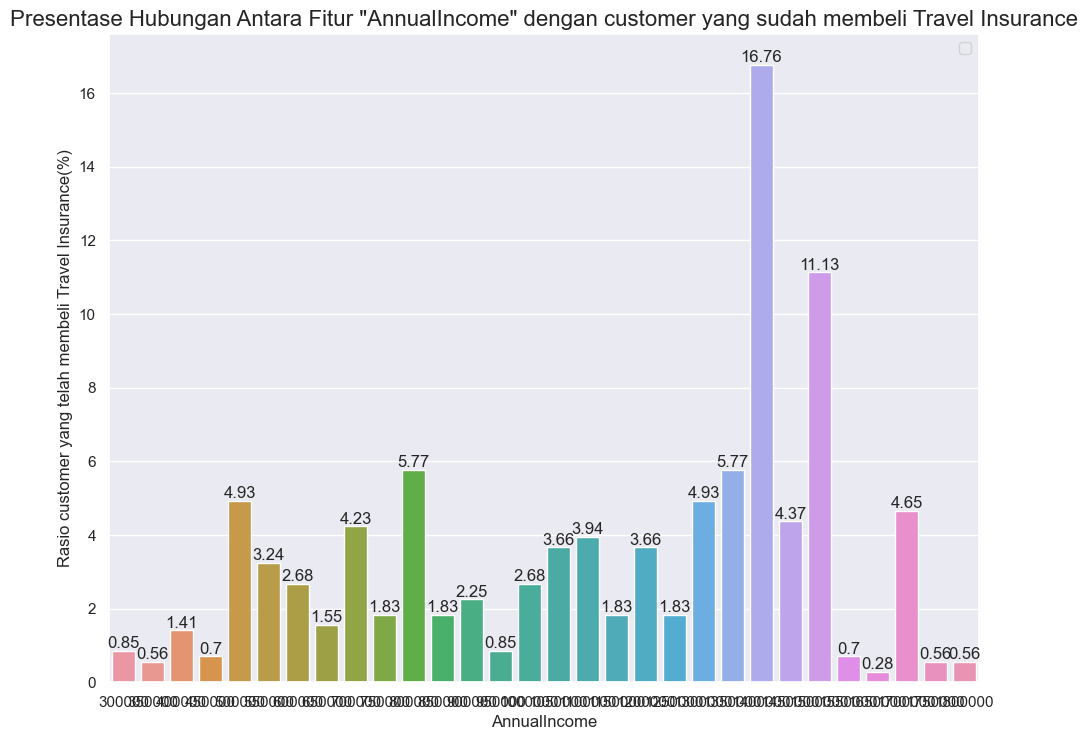

In [103]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='AnnualIncome', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_AnnualIncome_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "AnnualIncome" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (50,10)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

<Axes: xlabel='TravelInsurance', ylabel='AnnualIncome'>

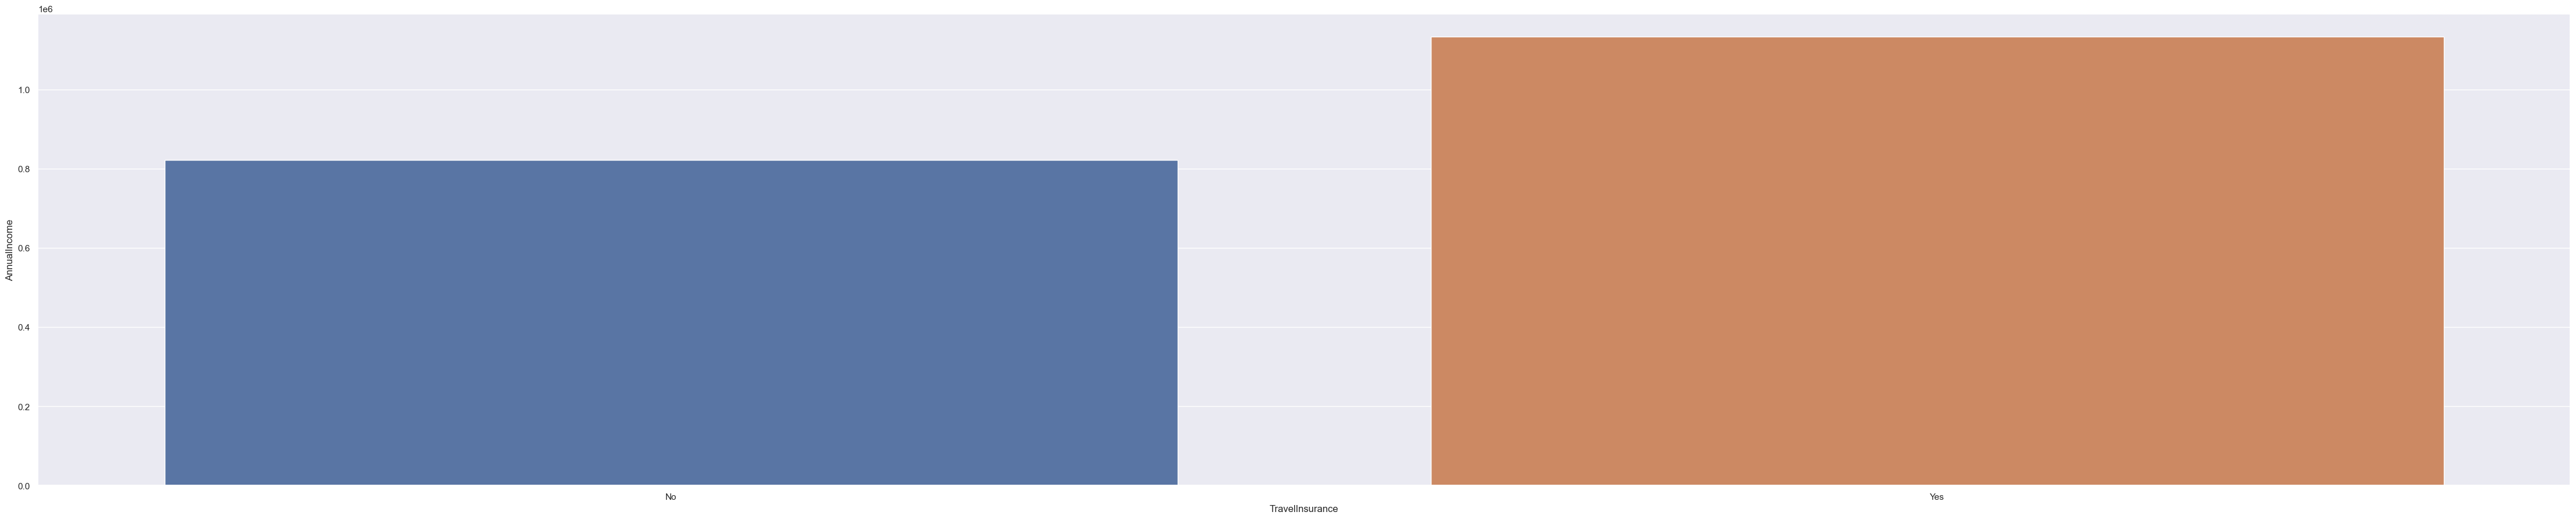

In [104]:
sns.barplot(x='TravelInsurance',y='AnnualIncome',data=df_travel_AnnualIncome,ci=None)

**Intepretasi**

- Mayoritas customer yang membeli travel insurance berdasarkan grafik memiliki pendapatan yang lebih banyak ketimbang yang tidak.

- Mayoritas customer yang memiliki travel insurance memiliki pendapatan 1,4 juta dengan 16,76%.

- Customer yang pendapatan tahunannya lebih besar dari 1,3 juta telah membeli lebih banyak travel insurance daripada orang yang pendapatan tahunannya kurang dari 1,3 juta

- Pada saat marketing  sebaiknya terlebih dahulu melakukan profiling atas pendapatan yang dimiliki customer dan memprioritaskan pendapatan yang besar terlebih dahulu.


**5.FamilyMembers VS Travel Insurance**

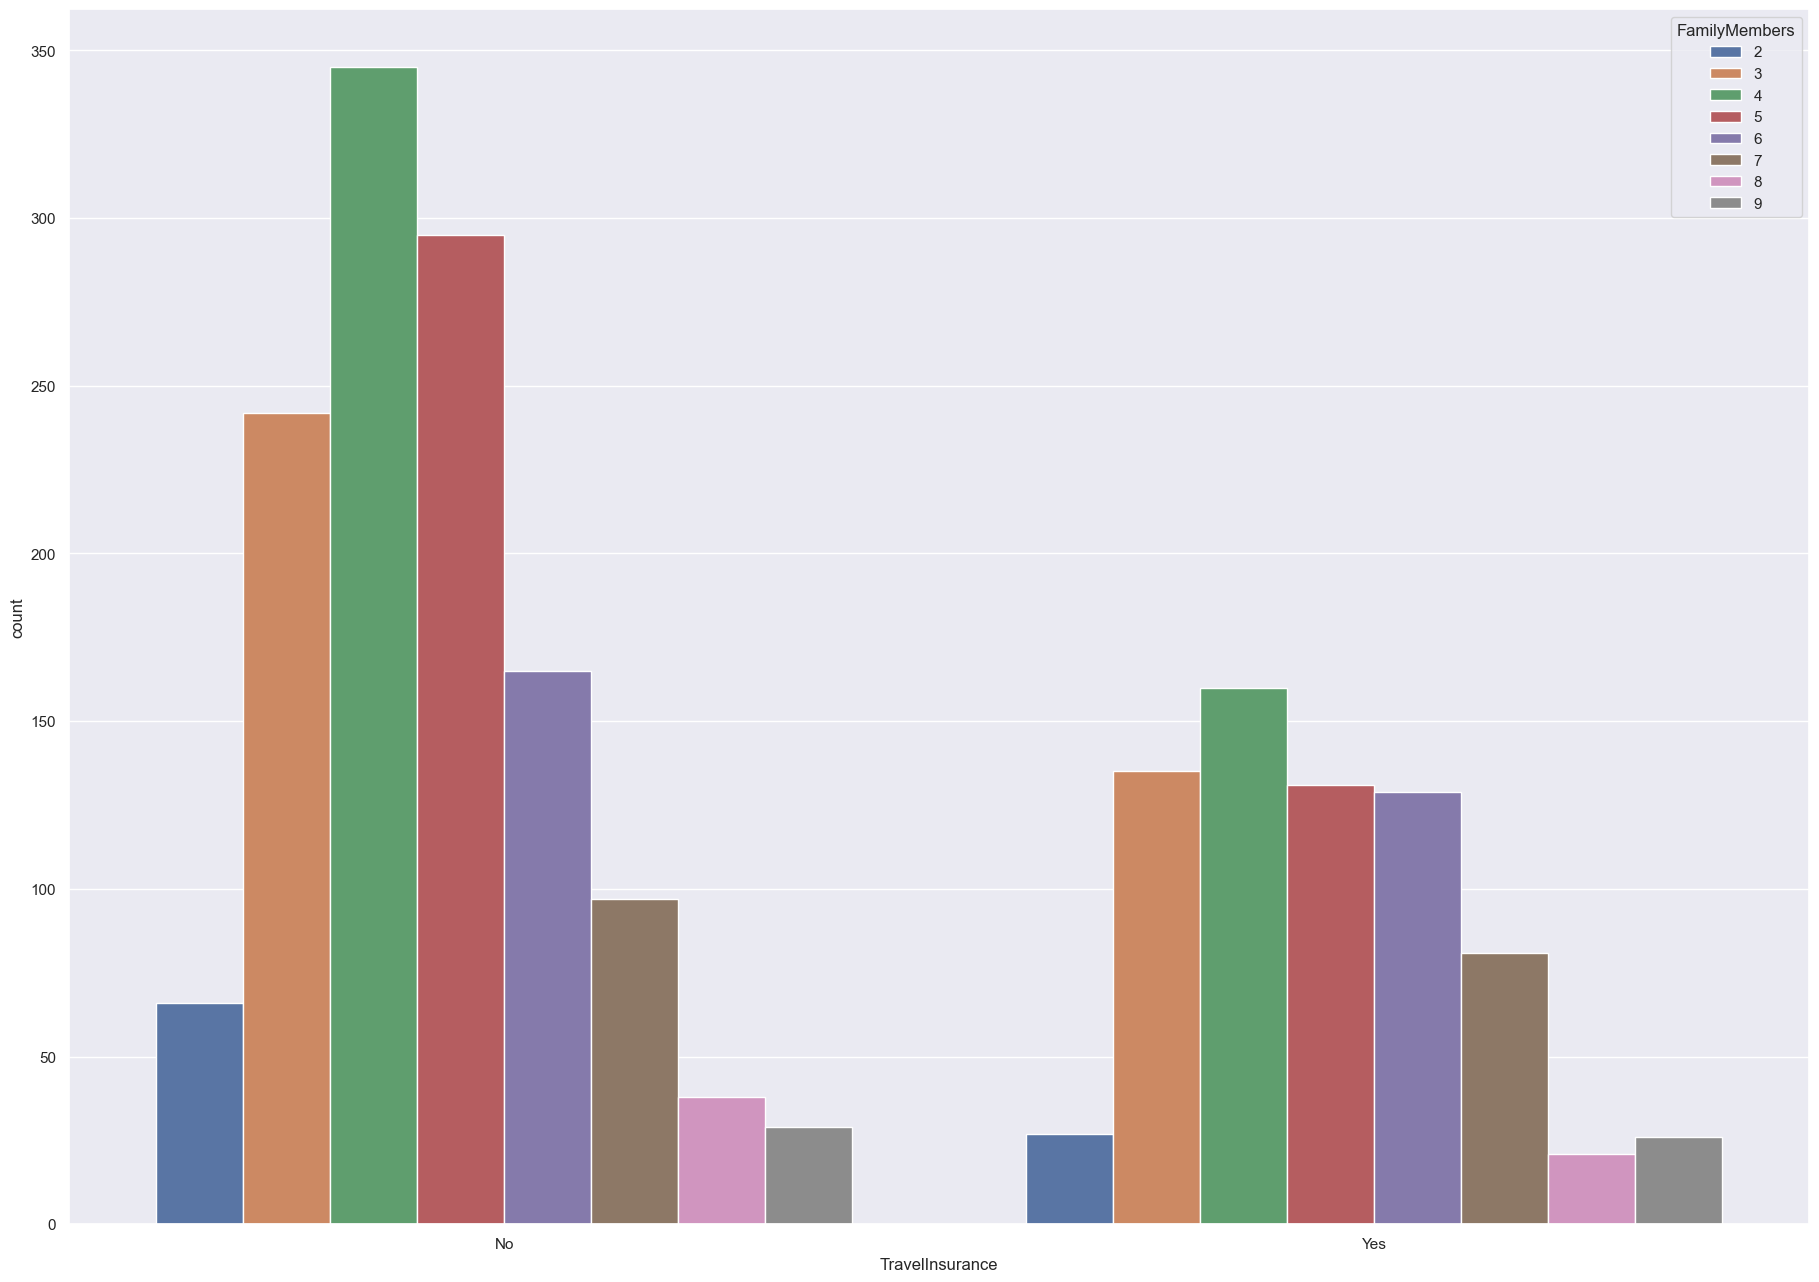

In [105]:
#Countplot
df_travel_FamilyMembers = df.copy()

df_travel_FamilyMembers['TravelInsurance'] = df_travel_FamilyMembers['TravelInsurance'].astype(str)
df_travel_FamilyMembers['TravelInsurance'] = df_travel_FamilyMembers['TravelInsurance'].replace(['0','1'], ['No','Yes'])


fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='FamilyMembers',x='TravelInsurance',data=df_travel_FamilyMembers)
plt.show()

In [106]:
#Mencari rasio persenan
df_FamilyMembers_travel = df.copy()
df_FamilyMembers_travel = pd.pivot_table(df_FamilyMembers_travel,
                              index=['FamilyMembers'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_FamilyMembers_travel.columns =[0,1]
df_FamilyMembers_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_FamilyMembers_travel.drop([0],axis=1,inplace=True)
df_FamilyMembers_travel.reset_index(inplace=True)
df_FamilyMembers_travel['Total_Buy_Travel_Insurance'] = df_FamilyMembers_travel['Buy_Travel_Insurance'].sum()
df_FamilyMembers_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_FamilyMembers_travel['Buy_Travel_Insurance']/(df_FamilyMembers_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_FamilyMembers_travel

FamilyMembers  Buy_Travel_Insurance  Total_Buy_Travel_Insurance  \
0              2                    27                         710   
1              3                   135                         710   
2              4                   160                         710   
3              5                   131                         710   
4              6                   129                         710   
5              7                    81                         710   
6              8                    21                         710   
7              9                    26                         710   

   Rasio customer yang telah membeli Travel Insurance(%)  
0                                               3.80      
1                                              19.01      
2                                              22.54      
3                                              18.45      
4                                              18.17      
5                                              11.41      
6                                               2.96      
7                                               3.66

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


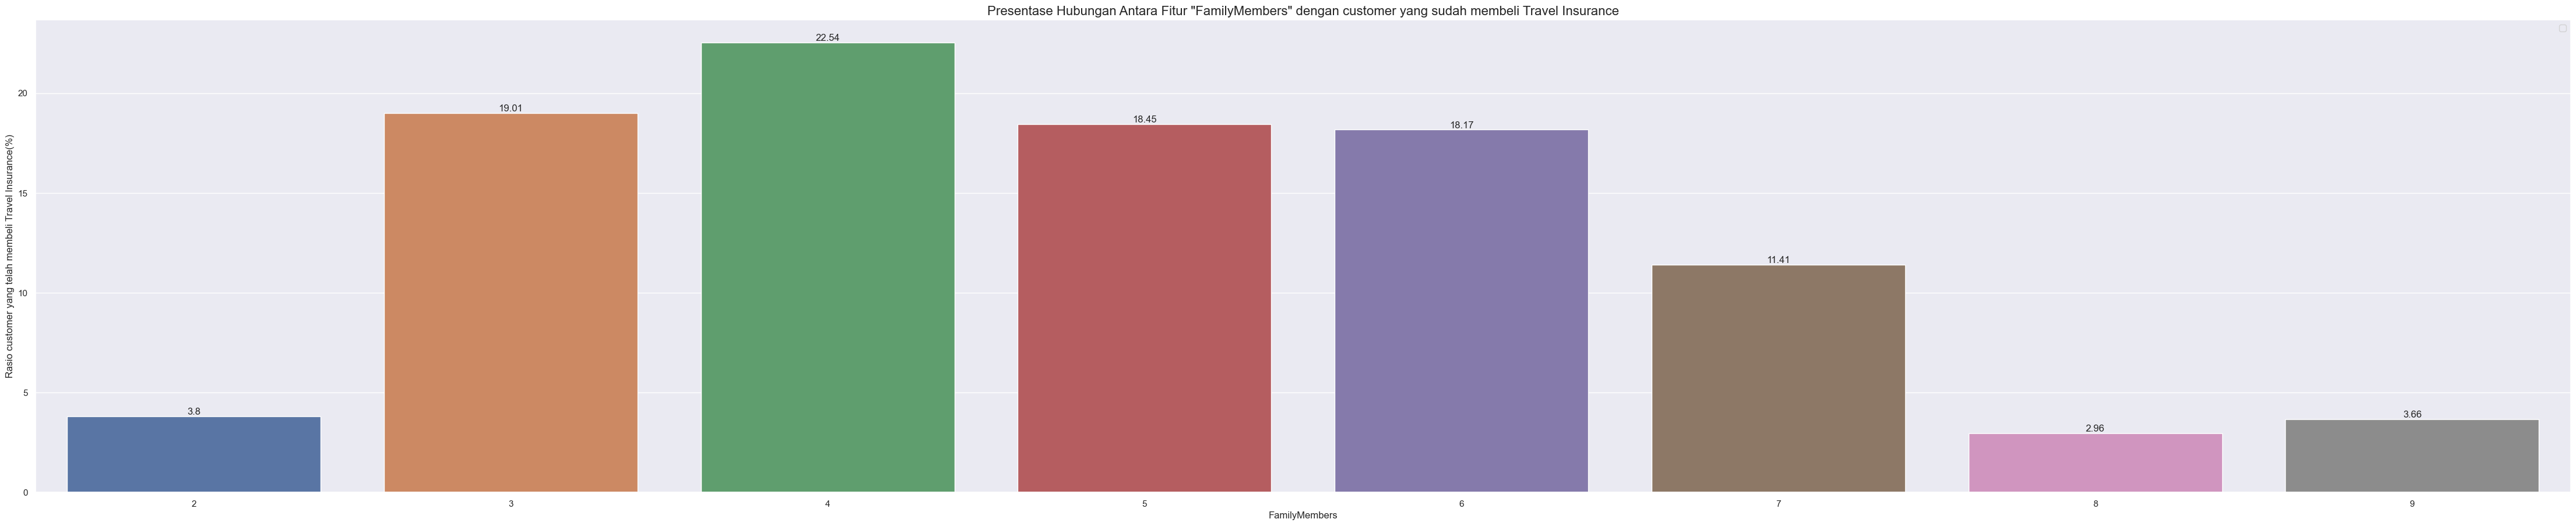

In [107]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='FamilyMembers', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_FamilyMembers_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "FamilyMembers" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (20,30)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance memiliki jumlah anggota keluarga 4 orang dengan presentase 22.54%

- Dapat disimpulkan bahwa jumlah anggota keluarga tidak terlalu berpengaruh terhadap travel insurance  karena rasionya hampir sama. Namun, keluarga yang beranggotakan 8 hingga 9 orang tidak membeli banyak travel insurance dibandingkan keluarga lainnya

**6.ChronicDiseasses VS Travel Insurance**

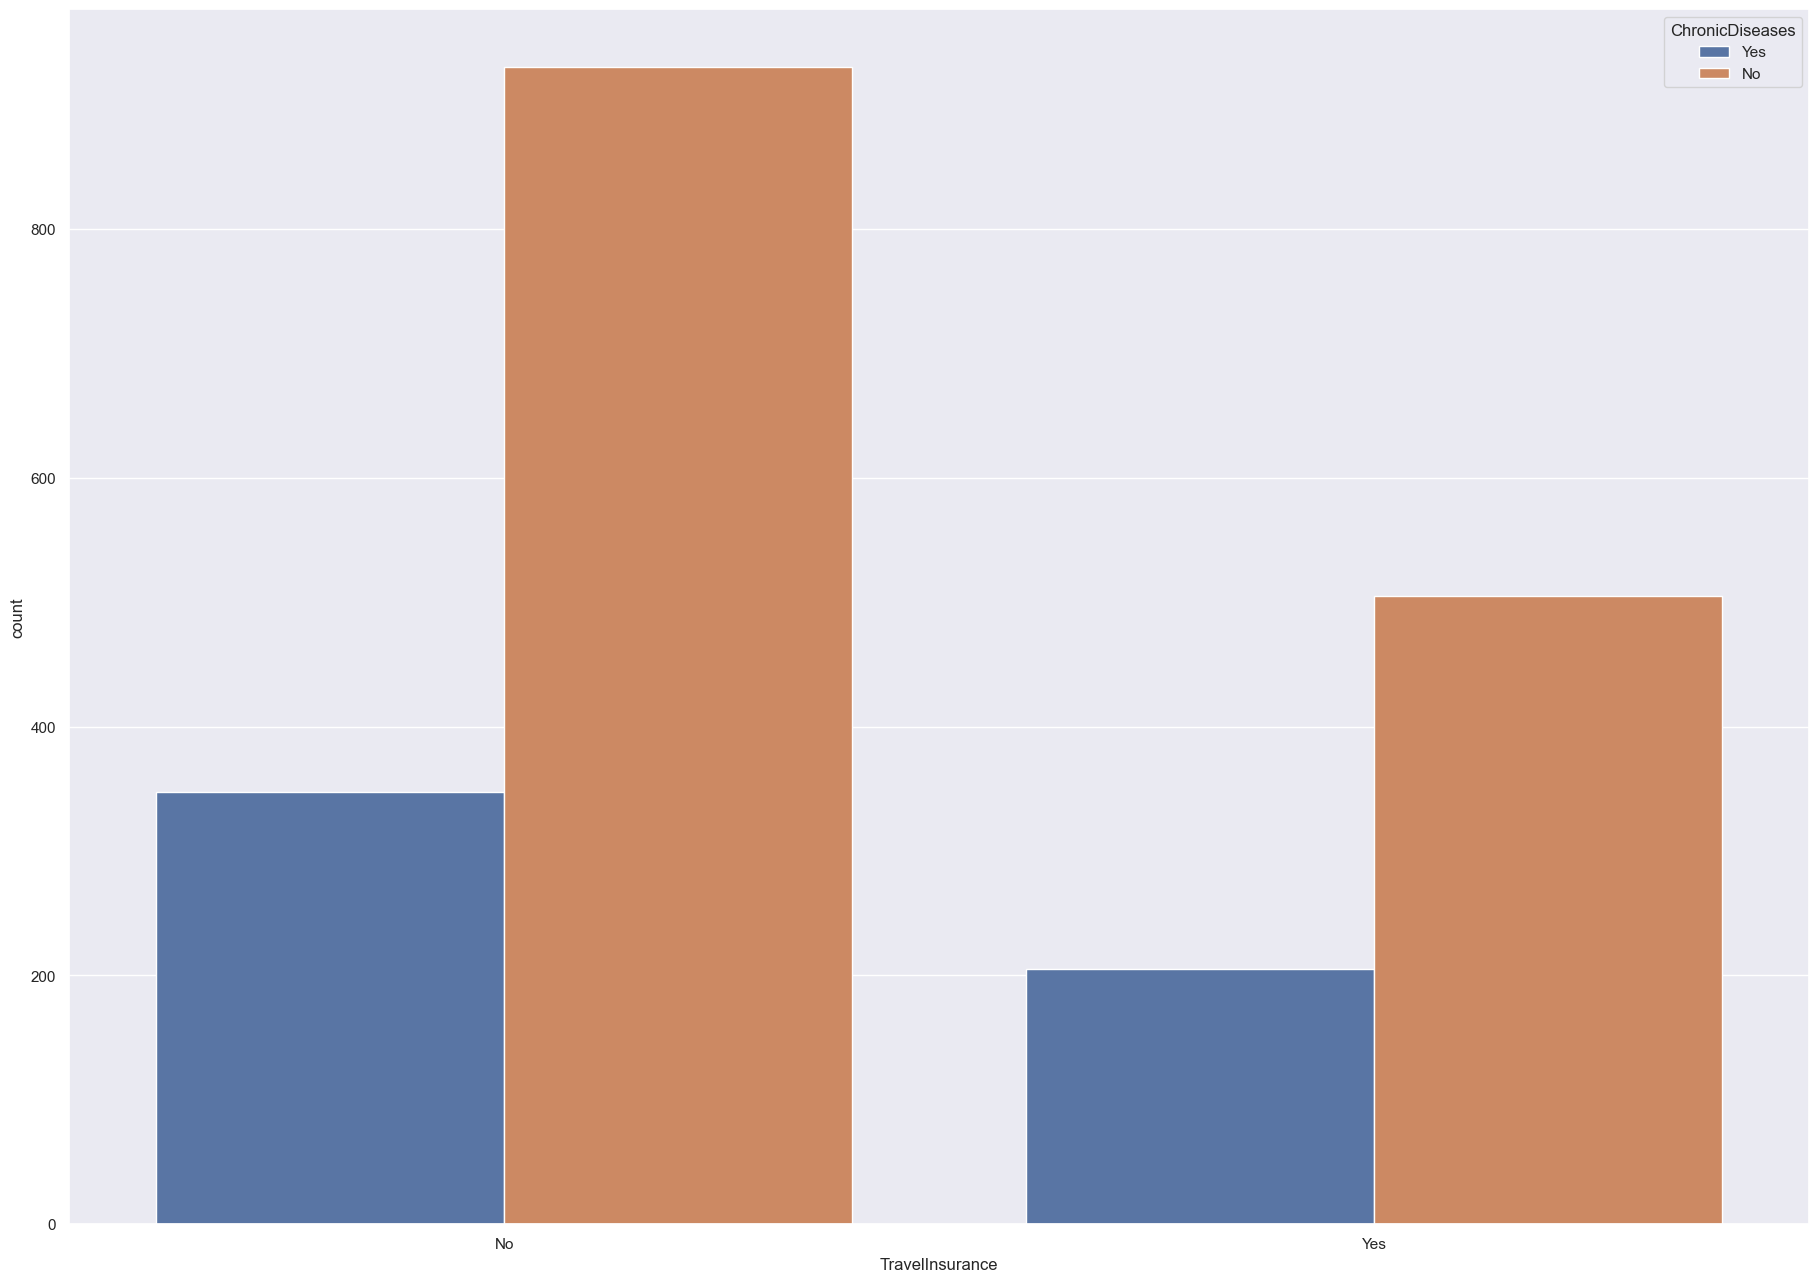

In [108]:
#Countplot
df_travel_ChronicDiseasses = df.copy()

df_travel_ChronicDiseasses['TravelInsurance'] = df_travel_ChronicDiseasses['TravelInsurance'].astype(str)
df_travel_ChronicDiseasses['TravelInsurance'] = df_travel_ChronicDiseasses['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_ChronicDiseasses['ChronicDiseases'] = df_travel_ChronicDiseasses['ChronicDiseases'].astype(str)
df_travel_ChronicDiseasses['ChronicDiseases'] = df_travel_ChronicDiseasses['ChronicDiseases'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='ChronicDiseases',x='TravelInsurance',data=df_travel_ChronicDiseasses)
plt.show()

In [109]:
#Mencari rasio persenan
df_ChronicDisseases_travel = df.copy()
df_ChronicDisseases_travel = pd.pivot_table(df_ChronicDisseases_travel,
                              index=['ChronicDiseases'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_ChronicDisseases_travel.columns =[0,1]
df_ChronicDisseases_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_ChronicDisseases_travel.drop([0],axis=1,inplace=True)
df_ChronicDisseases_travel.reset_index(inplace=True)
df_ChronicDisseases_travel['Total_Buy_Travel_Insurance'] = df_ChronicDisseases_travel['Buy_Travel_Insurance'].sum()
df_ChronicDisseases_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_ChronicDisseases_travel['Buy_Travel_Insurance']/(df_ChronicDisseases_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_ChronicDisseases_travel

ChronicDiseases  Buy_Travel_Insurance  Total_Buy_Travel_Insurance  \
0                0                   505                         710   
1                1                   205                         710   

   Rasio customer yang telah membeli Travel Insurance(%)  
0                                              71.13      
1                                              28.87

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


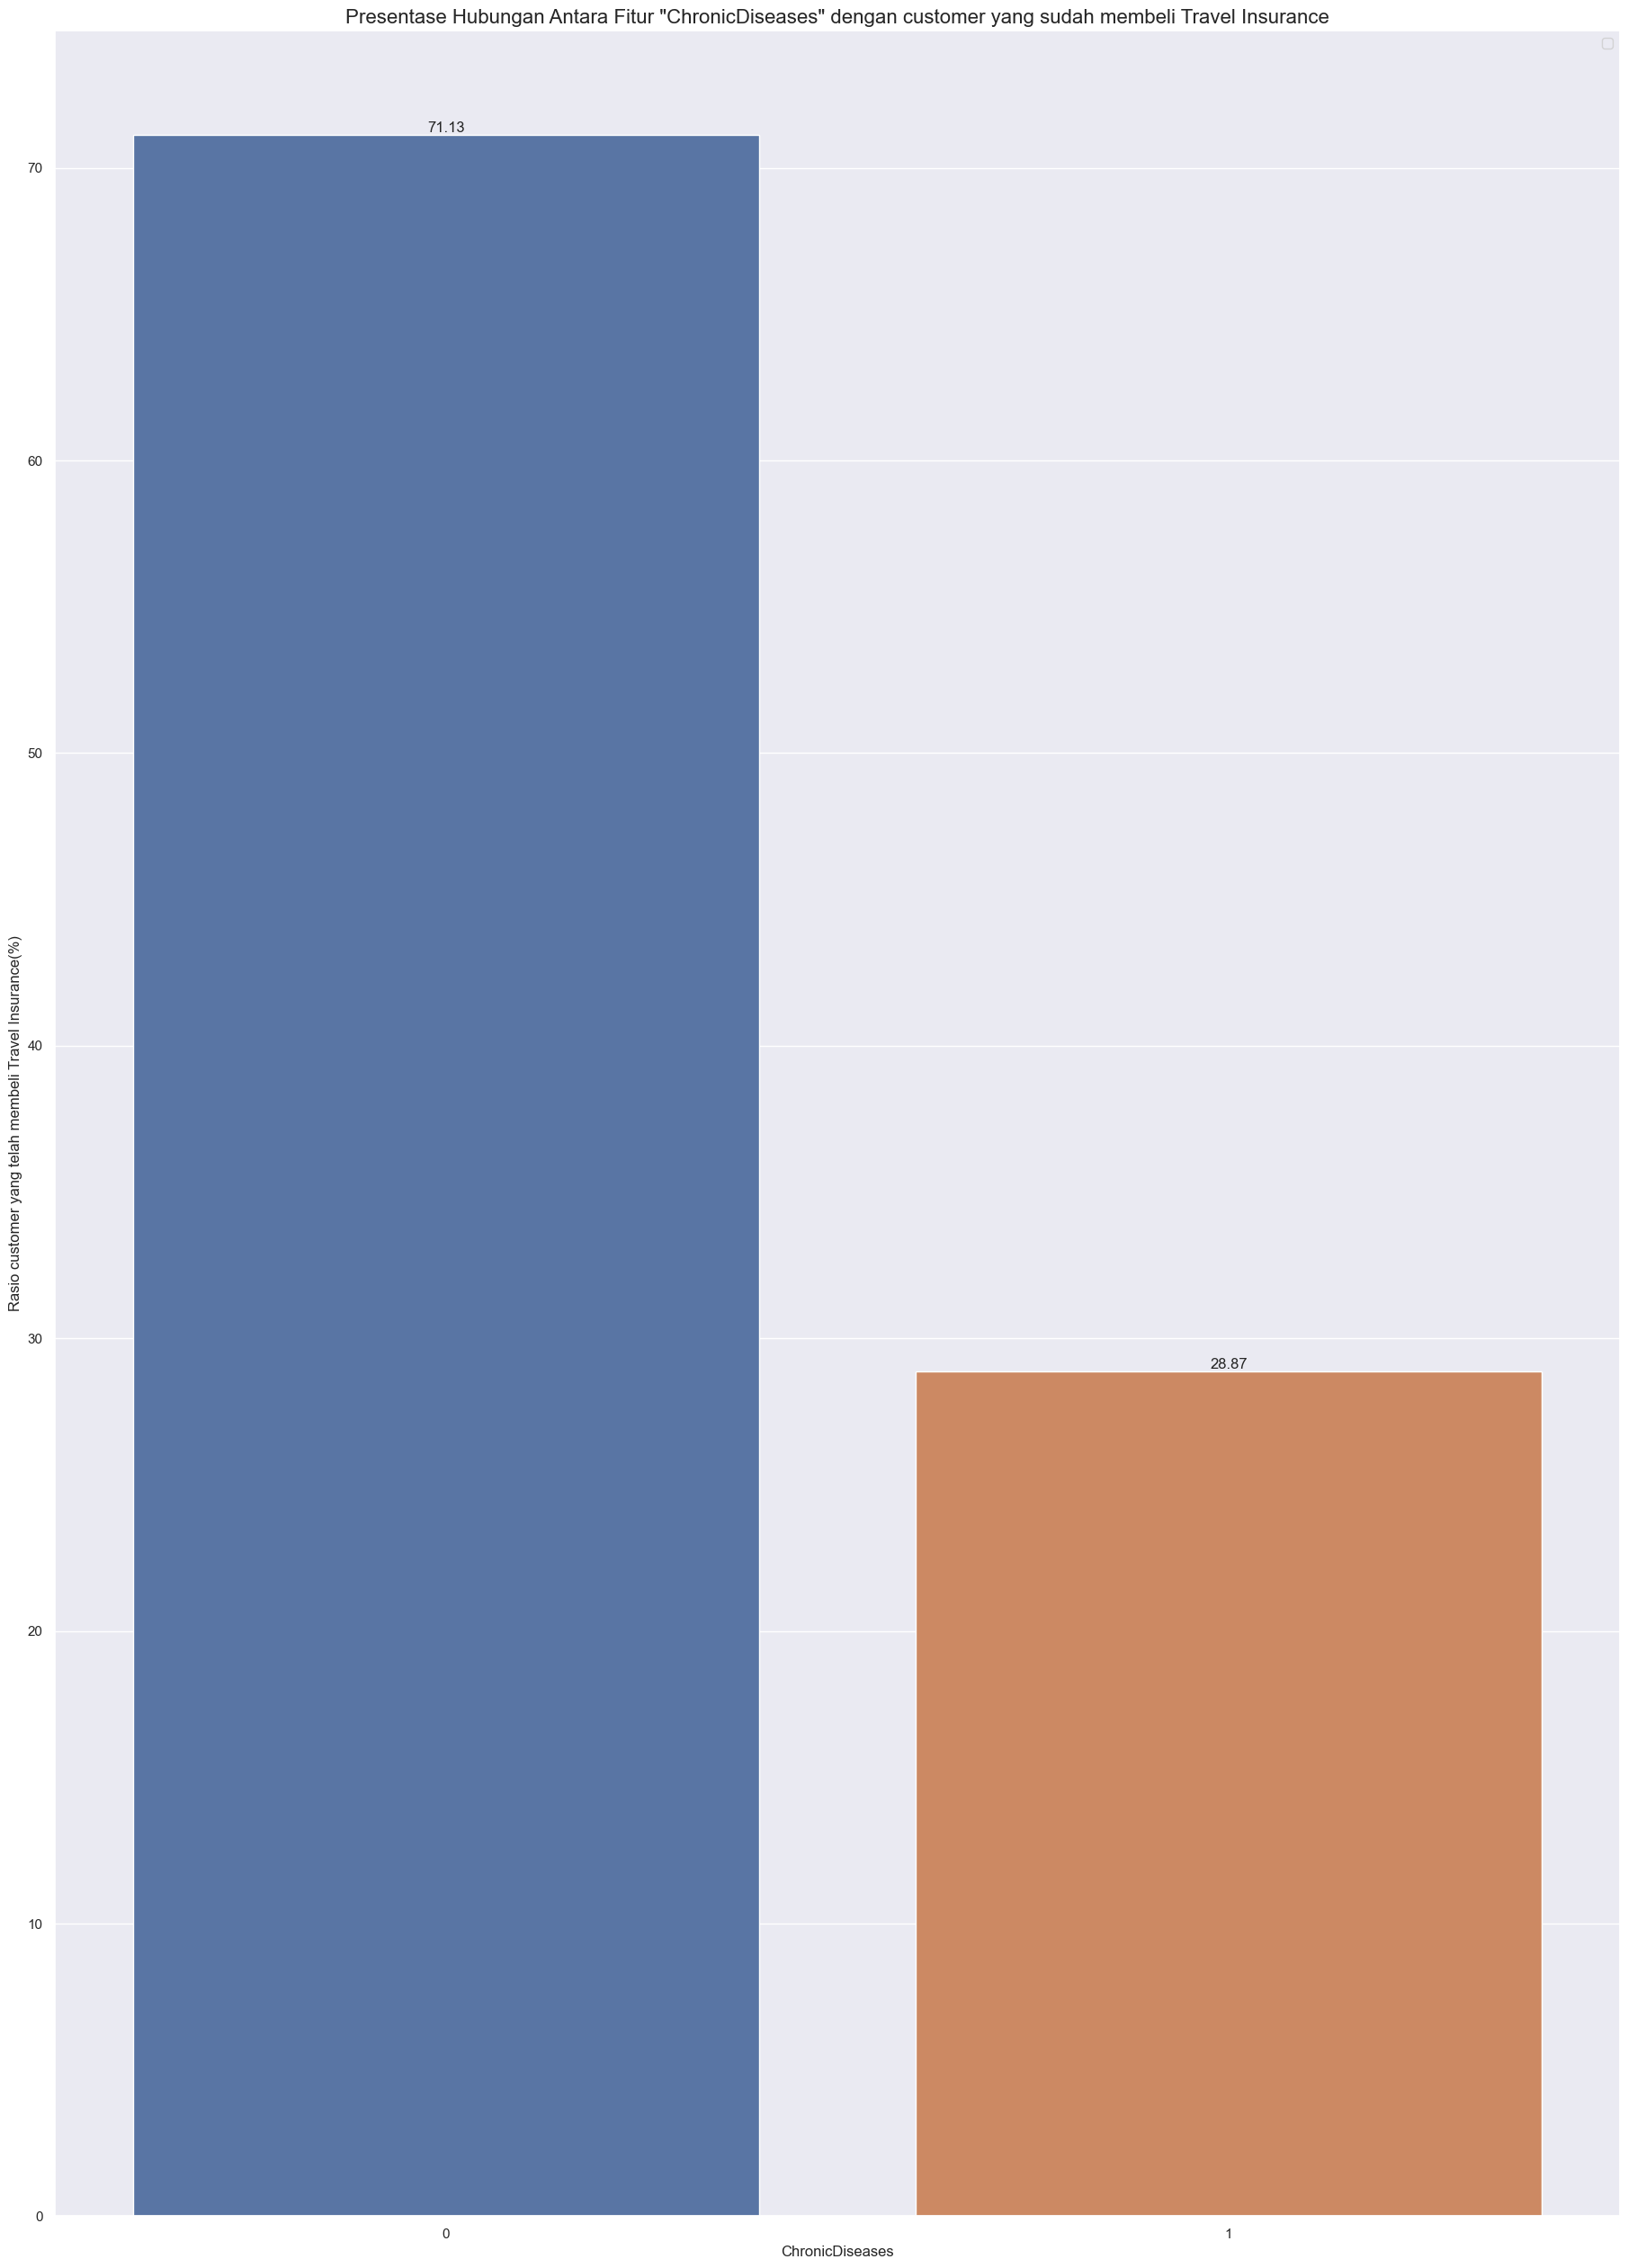

In [110]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='ChronicDiseases', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_ChronicDisseases_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "ChronicDiseases" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (20,30)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**Intepretasi**

- Mayoritas customer yang membeli travel insurance tidak memiliki penyakit kronis dengan rasio 71.13%

- Dari grafik di atas kita dapat berasumsi bahwa penyakit kurang berdampak pada pembelian asuransi perjalanan atau tidak.

**7.FrequentFlyer VS Travel Insurance**

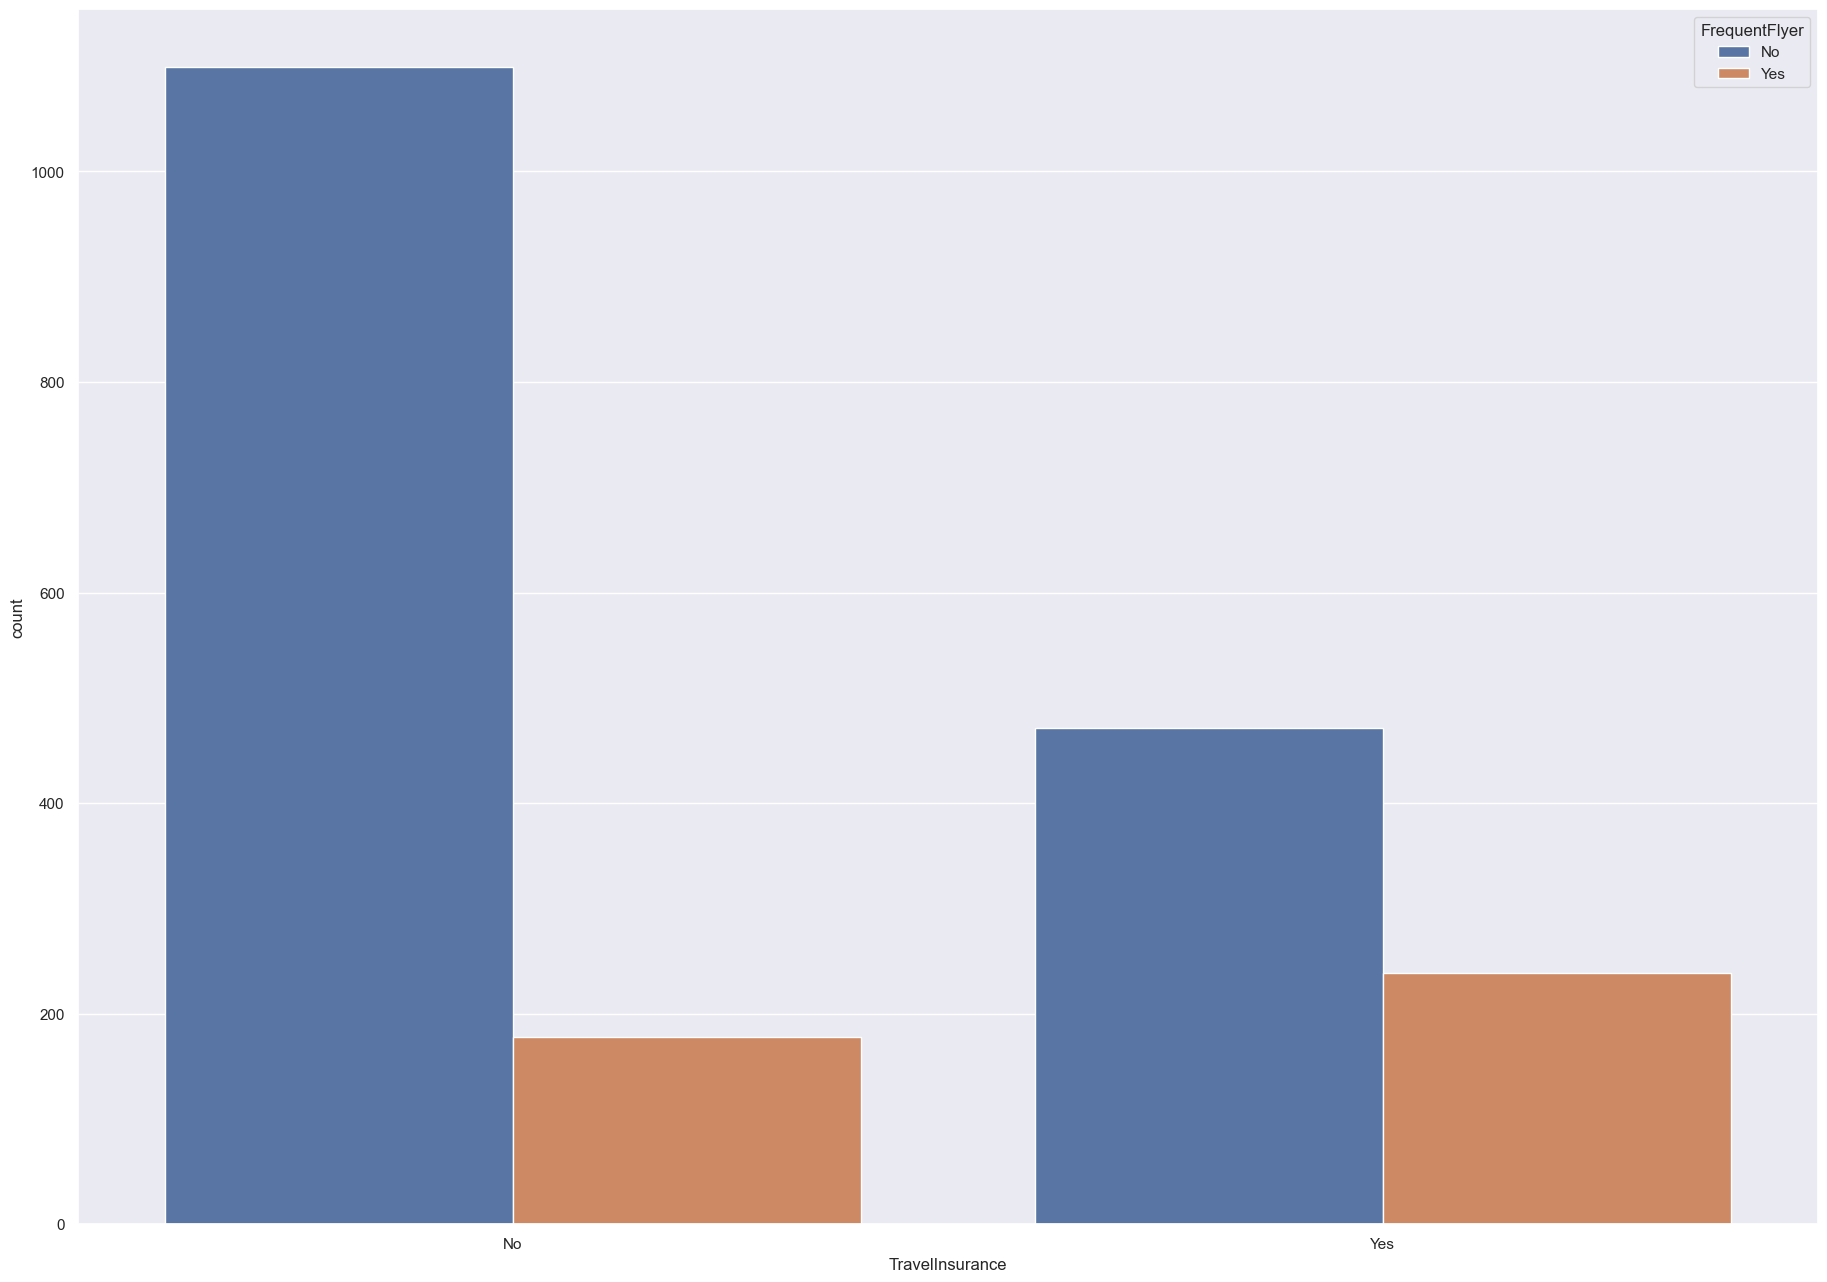

In [111]:
#Countplot
df_travel_FrequentFlyer = df.copy()

df_travel_FrequentFlyer['TravelInsurance'] = df_travel_FrequentFlyer['TravelInsurance'].astype(str)
df_travel_FrequentFlyer['TravelInsurance'] = df_travel_FrequentFlyer['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_FrequentFlyer['FrequentFlyer'] = df_travel_FrequentFlyer['FrequentFlyer'].astype(str)
df_travel_FrequentFlyer['FrequentFlyer'] = df_travel_FrequentFlyer['FrequentFlyer'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='FrequentFlyer',x='TravelInsurance',data=df_travel_FrequentFlyer)
plt.show()

In [112]:
#Mencari rasio persenan
df_FrequentFlyer_travel = df.copy()
df_FrequentFlyer_travel = pd.pivot_table(df_FrequentFlyer_travel,
                              index=['FrequentFlyer'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_FrequentFlyer_travel.columns =[0,1]
df_FrequentFlyer_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_FrequentFlyer_travel.drop([0],axis=1,inplace=True)
df_FrequentFlyer_travel.reset_index(inplace=True)
df_FrequentFlyer_travel['Total_Buy_Travel_Insurance'] = df_FrequentFlyer_travel['Buy_Travel_Insurance'].sum()
df_FrequentFlyer_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_FrequentFlyer_travel['Buy_Travel_Insurance']/(df_FrequentFlyer_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_FrequentFlyer_travel

FrequentFlyer  Buy_Travel_Insurance  Total_Buy_Travel_Insurance  \
0              0                   471                         710   
1              1                   239                         710   

   Rasio customer yang telah membeli Travel Insurance(%)  
0                                              66.34      
1                                              33.66

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


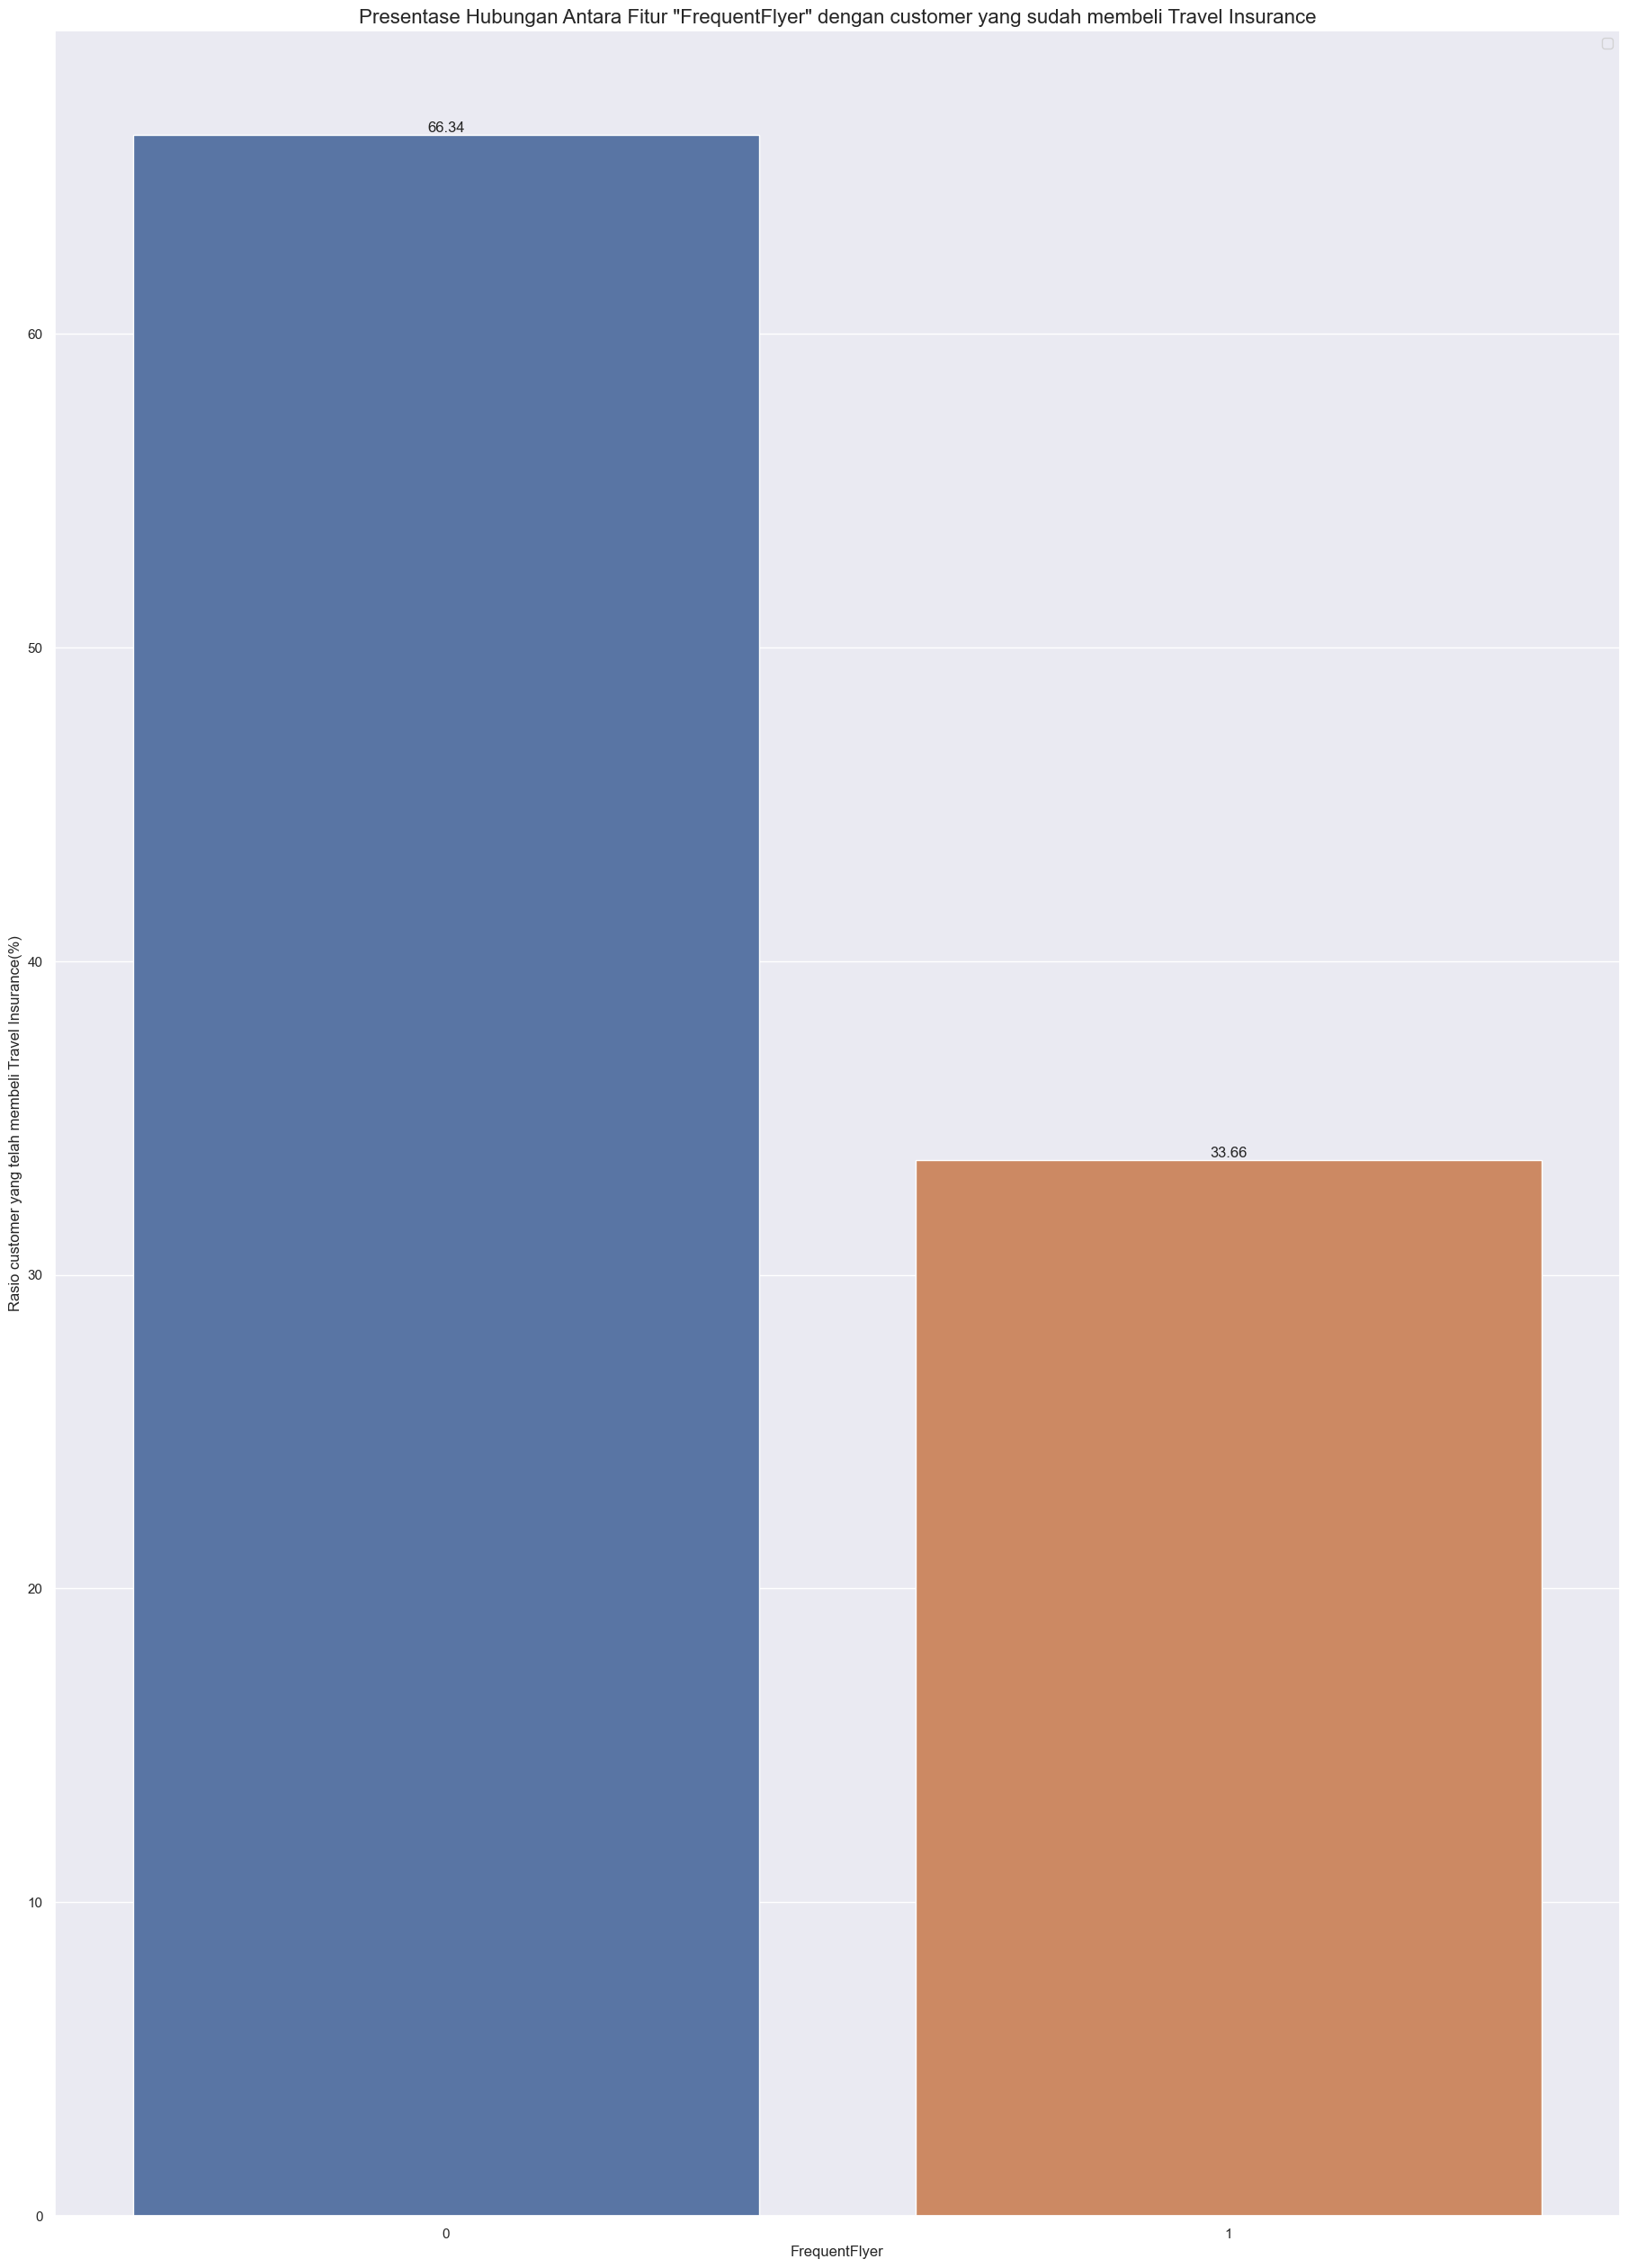

In [113]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='FrequentFlyer', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_FrequentFlyer_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "FrequentFlyer" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (50,10)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

**8.EverTravelledAbroad VS Travel Insurance**

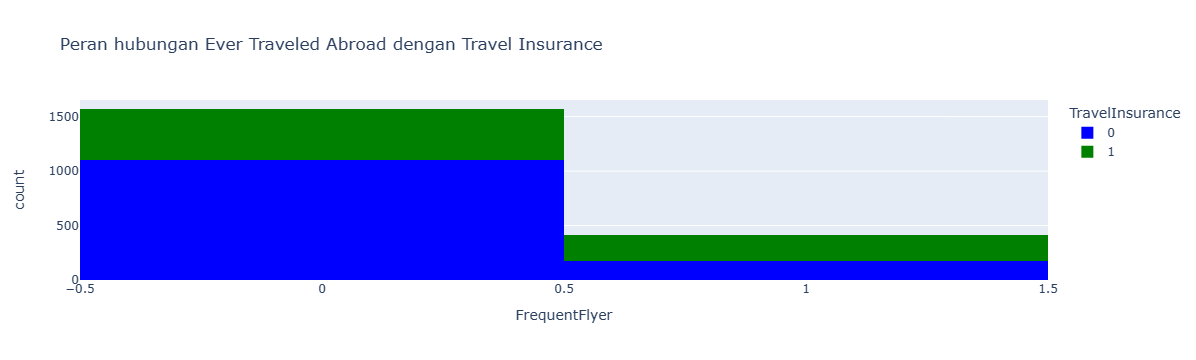

In [119]:
px.histogram(df, 
             x='FrequentFlyer', 
             color='TravelInsurance', 
             color_discrete_map={1:'green', 0:'blue'}, 
             title='Peran hubungan Ever Traveled Abroad dengan Travel Insurance',
            )  

**Intepretasi**

- Customer yang tidak sering melakukan penerbangan memiliki rasio untuk membeli travel insurance lebih besar dengan rasio sekitar 66.34%.

- Customer yang sering travel menggunakan pesawat lebih cenderung membeli asuransi perjalanan sedangkan ada sebagian kecil customer yang tidak sering travel menggunakan pesawat tetapi masih memiliki travel insurance.



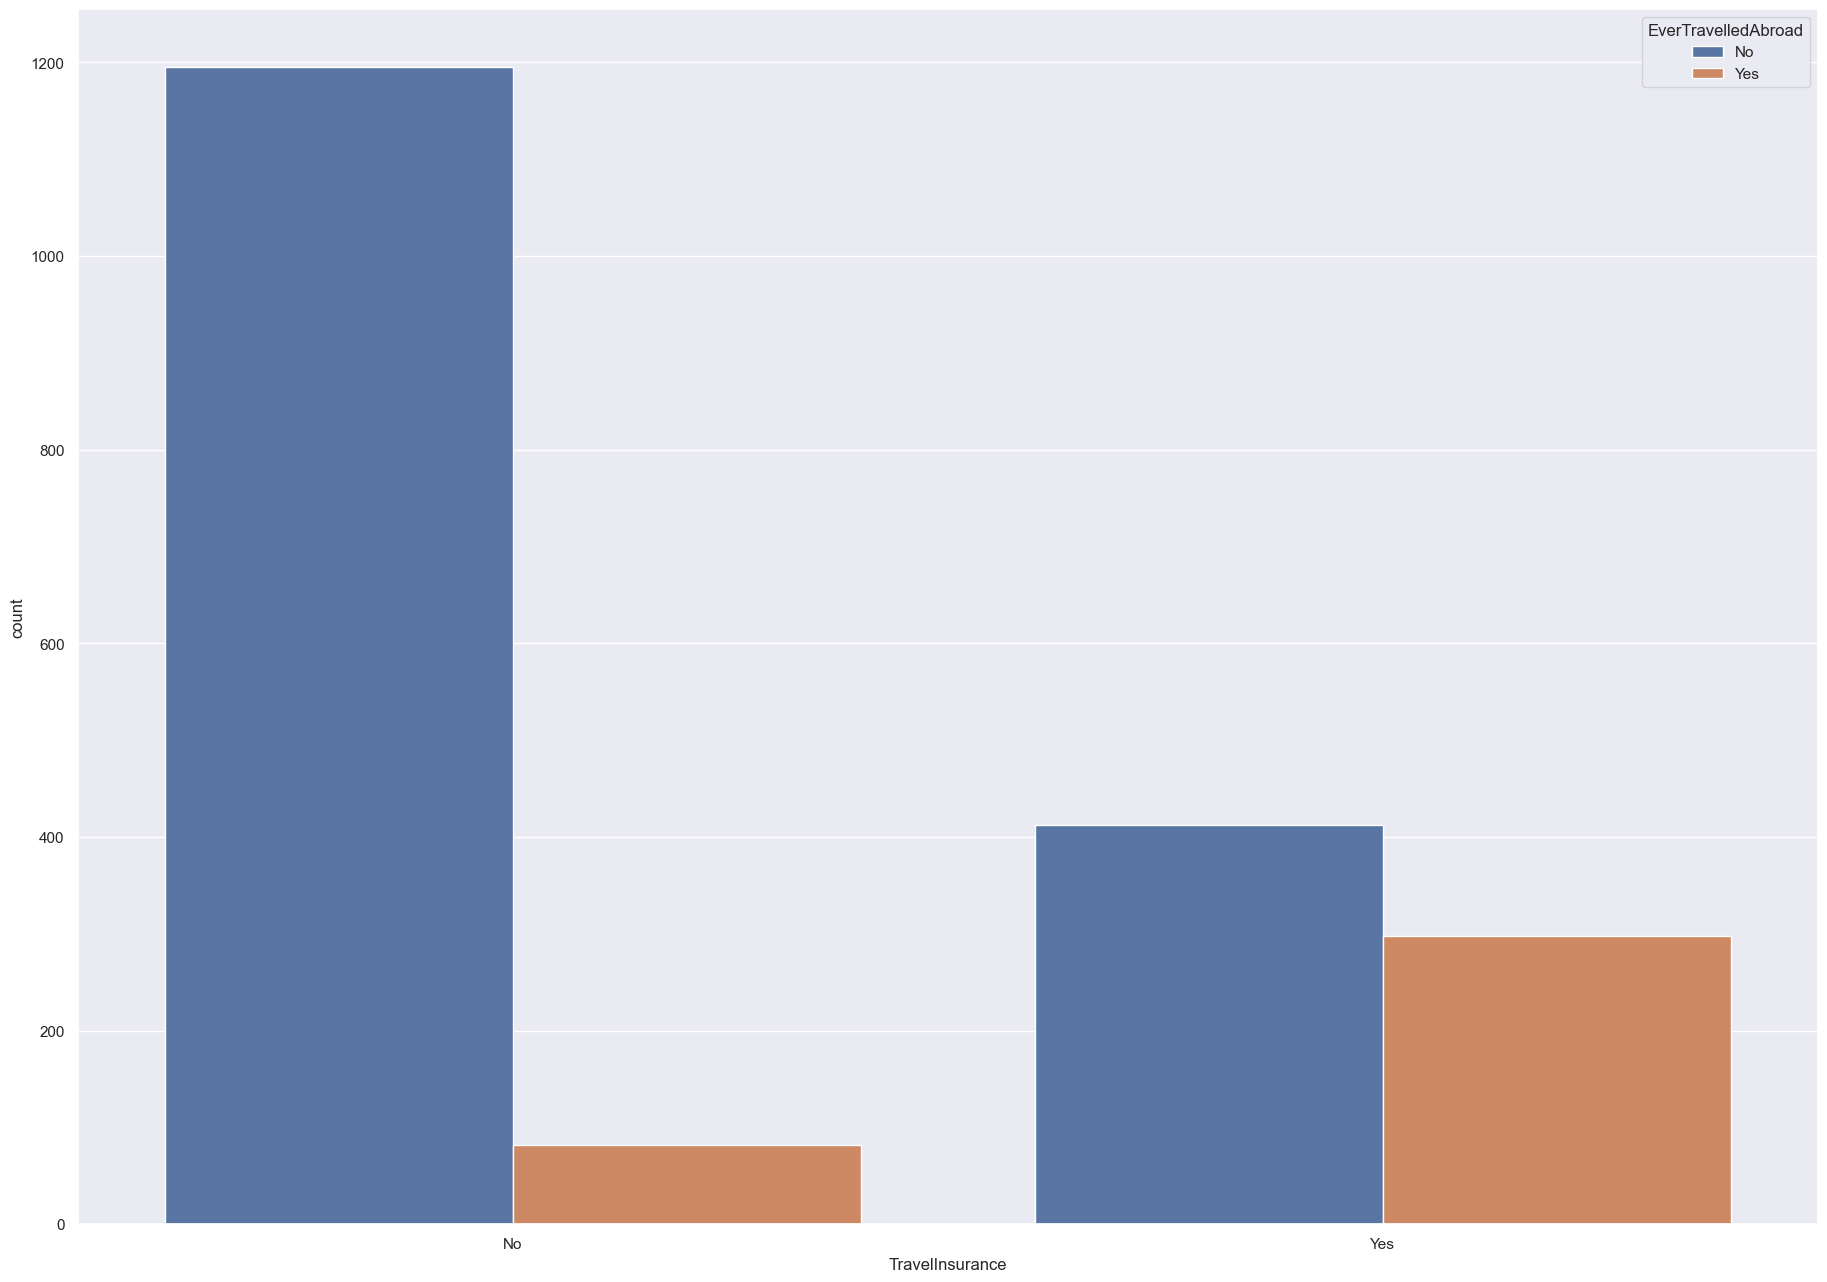

In [120]:
#Countplot
df_travel_EverTravelledAbroad = df.copy()

df_travel_EverTravelledAbroad['TravelInsurance'] = df_travel_EverTravelledAbroad['TravelInsurance'].astype(str)
df_travel_EverTravelledAbroad['TravelInsurance'] = df_travel_EverTravelledAbroad['TravelInsurance'].replace(['0','1'], ['No','Yes'])
df_travel_EverTravelledAbroad['EverTravelledAbroad'] = df_travel_EverTravelledAbroad['EverTravelledAbroad'].astype(str)
df_travel_EverTravelledAbroad['EverTravelledAbroad'] = df_travel_EverTravelledAbroad['EverTravelledAbroad'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='EverTravelledAbroad',x='TravelInsurance',data=df_travel_EverTravelledAbroad)
plt.show()

In [121]:
#Mencari rasio persenan
df_EverTravelledAbroad_travel = df.copy()
df_EverTravelledAbroad_travel = pd.pivot_table(df_EverTravelledAbroad_travel,
                              index=['EverTravelledAbroad'],
                              columns=['TravelInsurance'],
                              aggfunc={'TravelInsurance':'count'})
df_EverTravelledAbroad_travel.columns =[0,1]
df_EverTravelledAbroad_travel.rename(columns = {1:'Buy_Travel_Insurance'}, inplace = True)
df_EverTravelledAbroad_travel.drop([0],axis=1,inplace=True)
df_EverTravelledAbroad_travel.reset_index(inplace=True)
df_EverTravelledAbroad_travel['Total_Buy_Travel_Insurance'] = df_EverTravelledAbroad_travel['Buy_Travel_Insurance'].sum()
df_EverTravelledAbroad_travel['Rasio customer yang telah membeli Travel Insurance(%)'] = round((df_EverTravelledAbroad_travel['Buy_Travel_Insurance']/(df_EverTravelledAbroad_travel['Total_Buy_Travel_Insurance'])) , 4)*100
df_EverTravelledAbroad_travel

EverTravelledAbroad  Buy_Travel_Insurance  Total_Buy_Travel_Insurance  \
0                    0                   412                         710   
1                    1                   298                         710   

   Rasio customer yang telah membeli Travel Insurance(%)  
0                                              58.03      
1                                              41.97

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


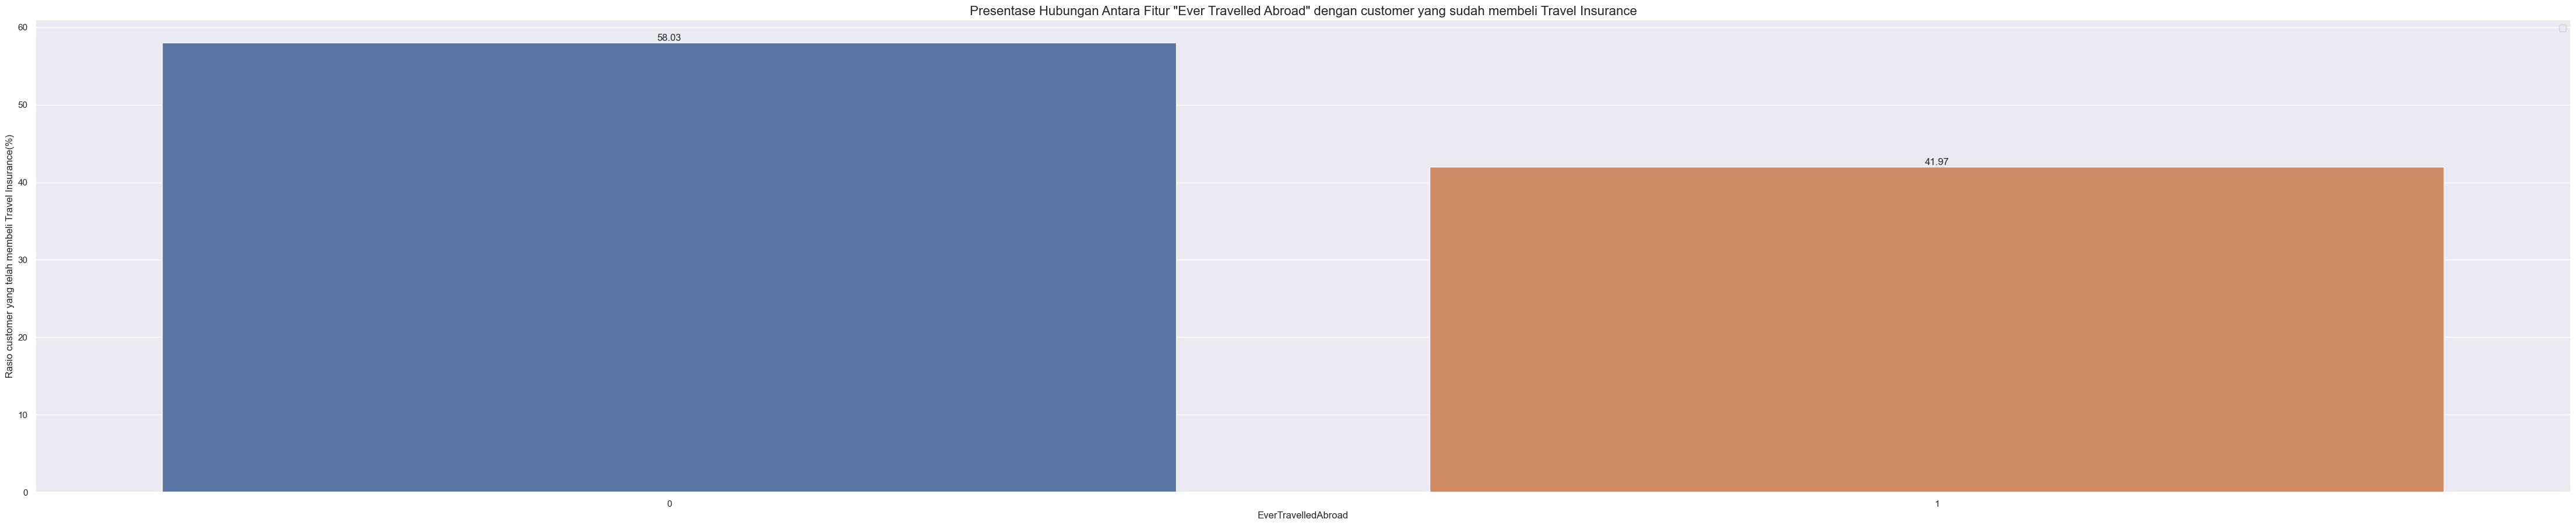

In [122]:
# Visualisasi Persenan 
sns.set_theme(style='darkgrid')
ax = sns.barplot(x='EverTravelledAbroad', y='Rasio customer yang telah membeli Travel Insurance(%)',data=df_EverTravelledAbroad_travel)
plt.xticks(rotation = 0)
plt.title('Presentase Hubungan Antara Fitur "Ever Travelled Abroad" dengan customer yang sudah membeli Travel Insurance',fontsize=16)
sns.set(rc={'figure.figsize': (50,10)})
ax.bar_label(ax.containers[0])

plt.legend()

plt.show()

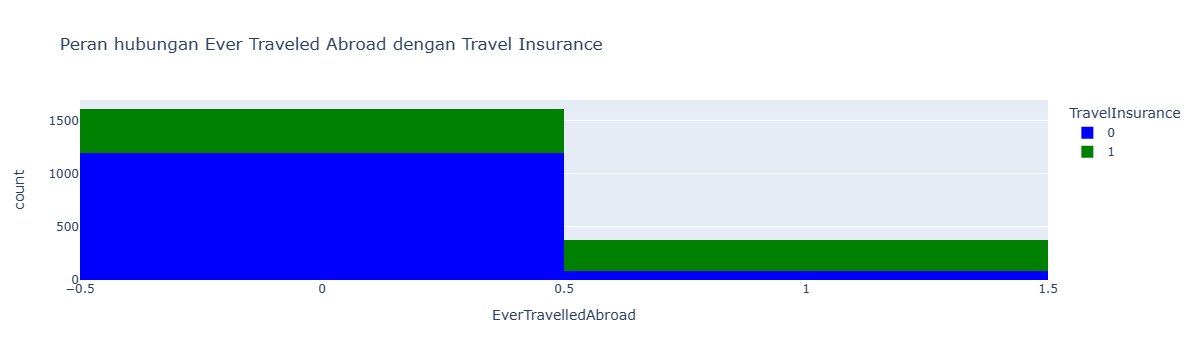

In [118]:
px.histogram(df, 
             x='EverTravelledAbroad', 
             color='TravelInsurance', 
             color_discrete_map={1:'green', 0:'blue'}, 
             title='Peran hubungan Ever Traveled Abroad dengan Travel Insurance',
             
            )

**Intepretasi**

- Mayoritas orang telah bepergian ke luar negeri dan membeli asuransi memiliki persentase 58.03 %.

- Seperti yang kita ketahui, bahwa mayoritas masyarakat yang belum bepergian ke luar negeri dan belum membeli asuransi. Jadi satu hal yang dapat kita asumsikan bahwa orang yang belum bepergian ke luar negeri tidak memerlukan travel insurance saat bepergian di dalam negara yang sama. 

**B. Feature VS Feature yang berkemunginan memilike indirect impact terhadap pembelian Travel Insurance** 

**1. AnnualIncome VS EmploymentType**

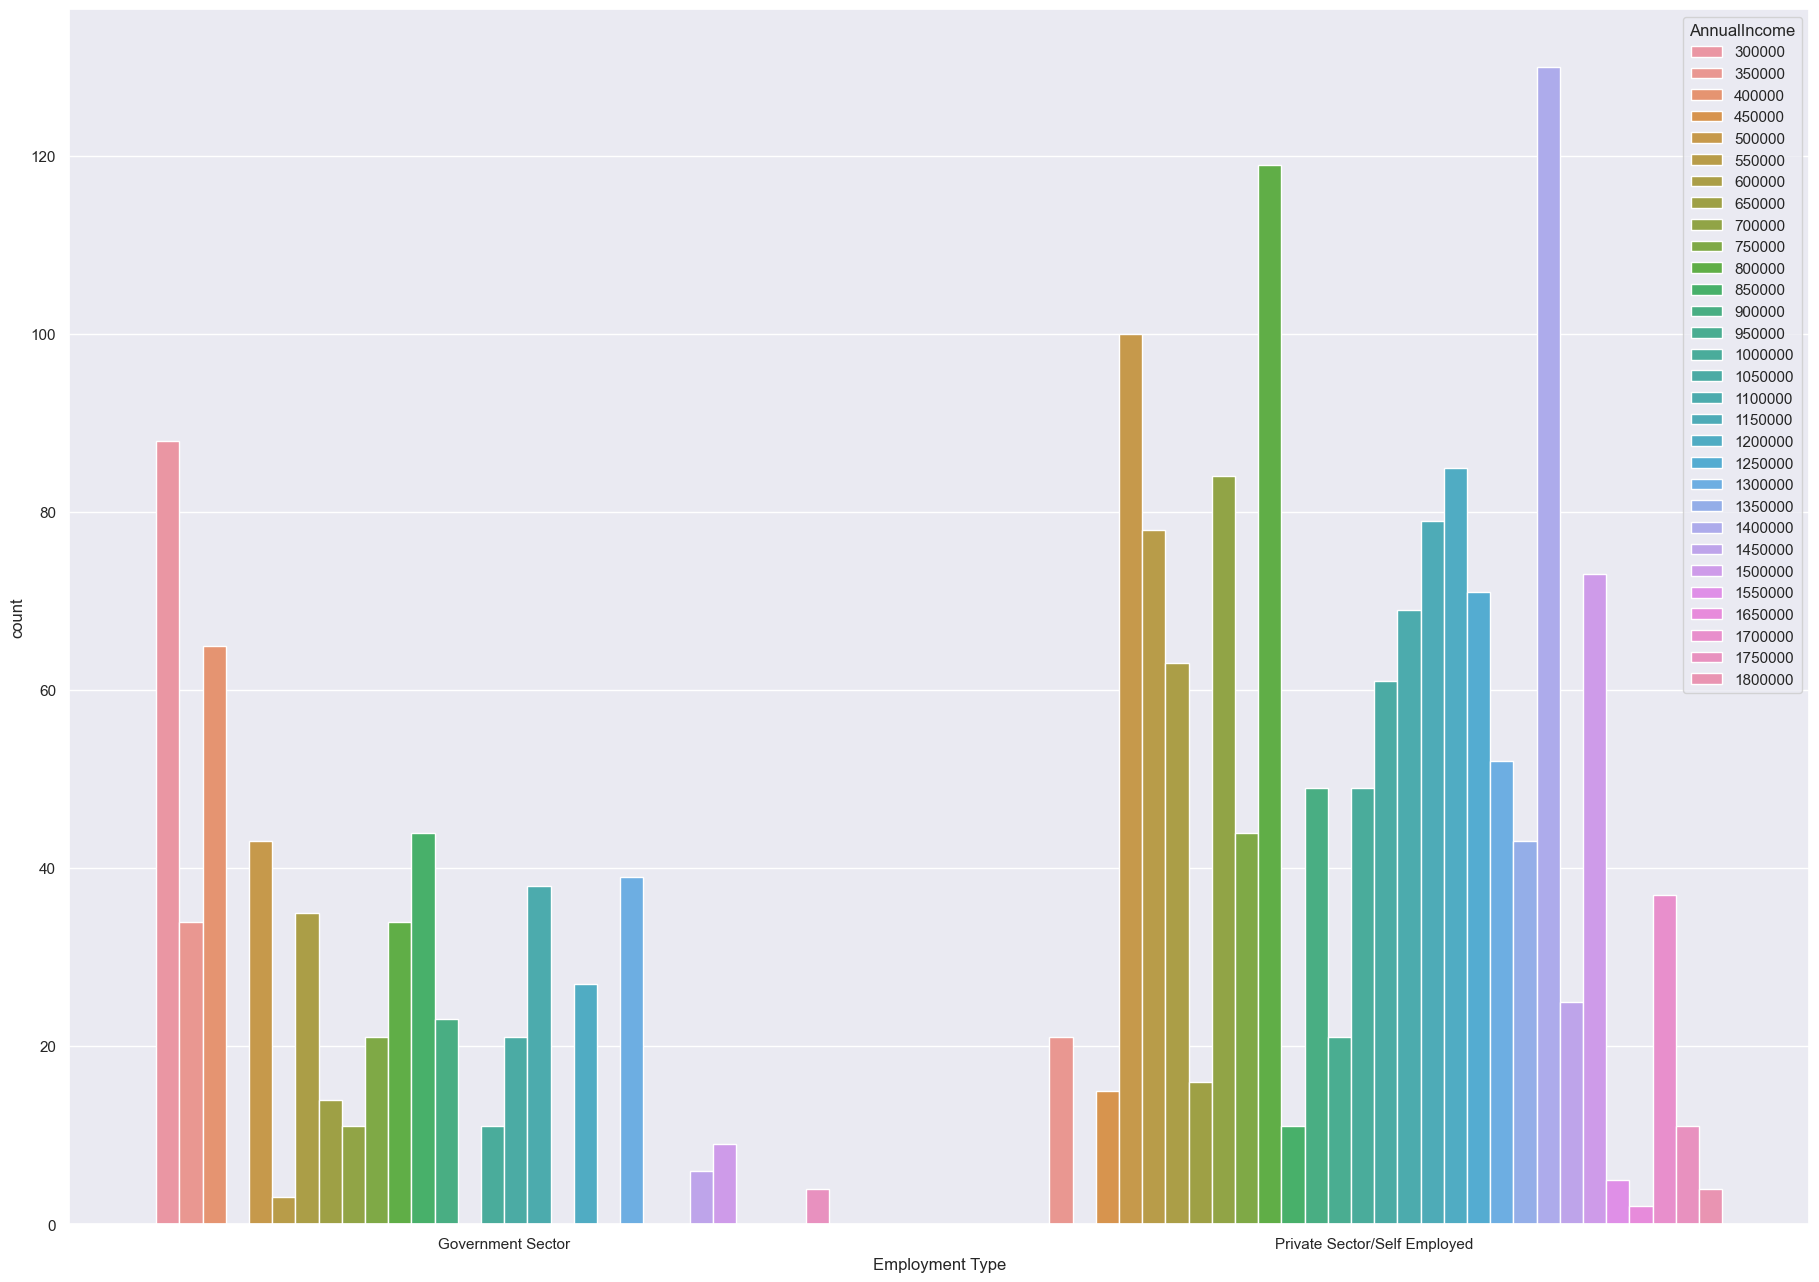

In [123]:
#Countplot
df_AnnualIncome_EmploymentType = df.copy()
df_AnnualIncome_EmploymentType['Employment Type'] = df_AnnualIncome_EmploymentType['Employment Type'].astype(str)
df_AnnualIncome_EmploymentType['Employment Type'] = df_AnnualIncome_EmploymentType['Employment Type'].replace(['0','1'], ['Government Sector','Private Sector/Self Employed'])

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(hue='AnnualIncome',x='Employment Type',data=df_AnnualIncome_EmploymentType)
plt.show()

**Intepretasi**

Berdasarkan grafik dapat diambil kesimpulan bahwa customer yang bekerja di private sector (perusahaan swasta) /self employed (wiraswasta) cenderung memiliki penghasilan yang lebih besar ketimbang yang bekerja di pemerintahan atau goverment sector.

**2. AnnualIncome VS EvertravelledAbroad**

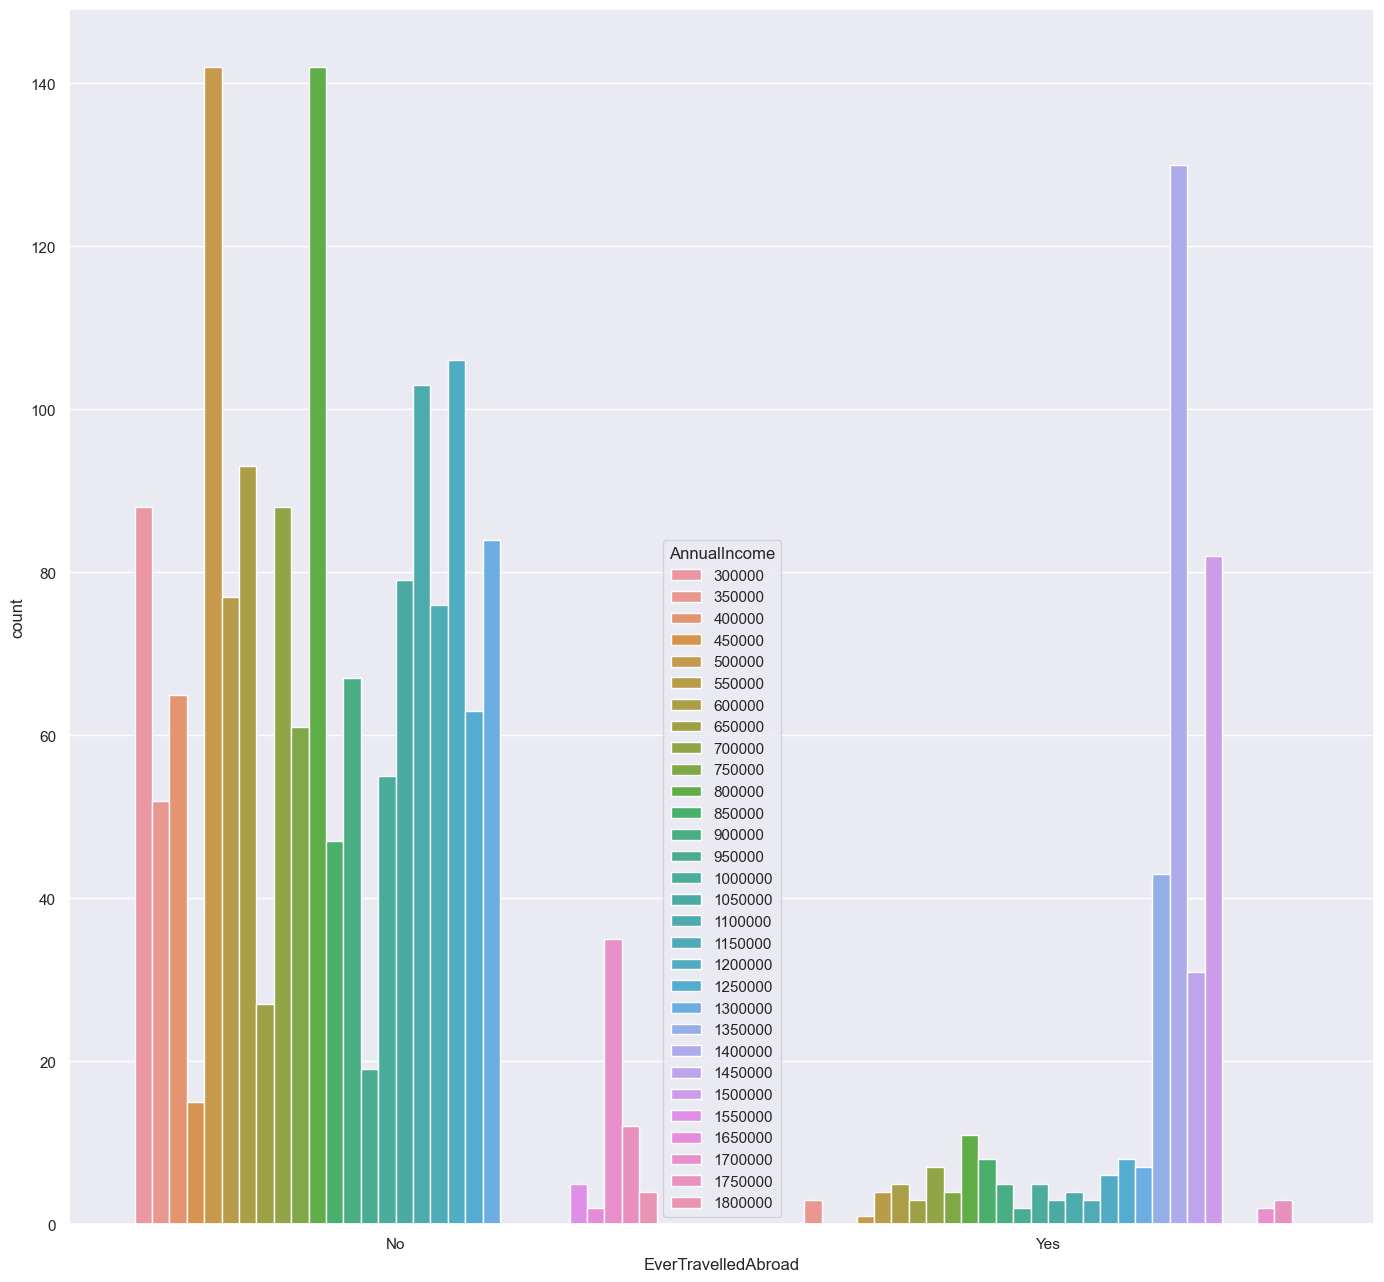

In [124]:
#Countplot
df_AnnualIncome_EverTravelledAbroad = df.copy()
df_AnnualIncome_EverTravelledAbroad['EverTravelledAbroad'] = df_AnnualIncome_EverTravelledAbroad['EverTravelledAbroad'].astype(str)
df_AnnualIncome_EverTravelledAbroad['EverTravelledAbroad'] = df_AnnualIncome_EverTravelledAbroad['EverTravelledAbroad'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hue='AnnualIncome',x='EverTravelledAbroad',data=df_AnnualIncome_EverTravelledAbroad)

plt.show()

**Intepretasi**

Berdasarkan grafik dapat diambil kesimpulan bahwa jumlah penghasilan tidak terlalu menentukan apakah customer pernah travel keluar negeri atau tidak. Walaupun begitu, dapat terlihat bahwa masyarakat dengan penghasilan dibawah 1.400.000 rupee cenderung tidak pernah travel ke luar negeri.

**3.AnnualIncome vs FrequentFlyer**

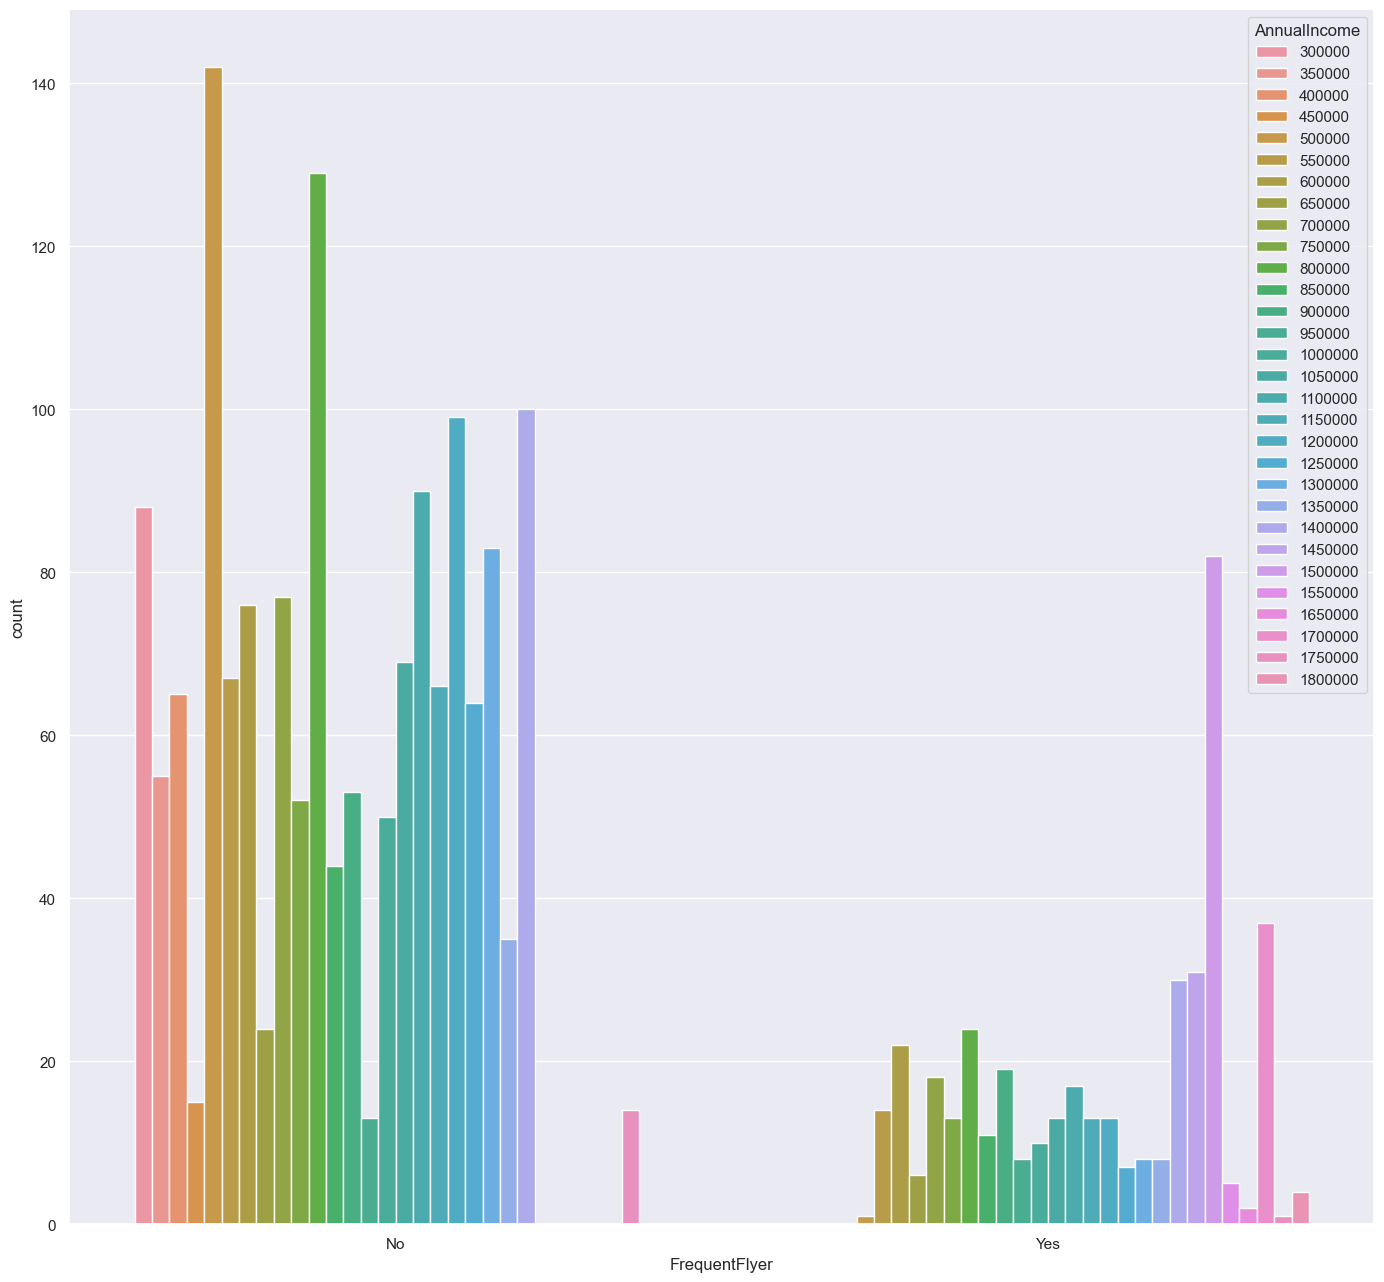

In [125]:
#Countplot
df_AnnualIncome_FrequentFlyer = df.copy()
df_AnnualIncome_FrequentFlyer['FrequentFlyer'] = df_AnnualIncome_FrequentFlyer['FrequentFlyer'].astype(str)
df_AnnualIncome_FrequentFlyer['FrequentFlyer'] = df_AnnualIncome_FrequentFlyer['FrequentFlyer'].replace(['0','1'], ['No','Yes'])

fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hue='AnnualIncome',x='FrequentFlyer',data=df_AnnualIncome_FrequentFlyer)

plt.show()

**Intepretasi**

Berdasarkan grafik dapat diambil kesimpulan bahwa jumlah penghasilan juga tidak terlalu menentukan apakah customer akan sering travel menggunakan pesawat atau tidak. Walaupun begitu dapat terlihat bahwa masyarakat dengan penghasilan dibawah 450.000 rupee cenderung tidak sering travel menggunakan pesawat.

**4. AnnualIncome VS FamilyMembers**

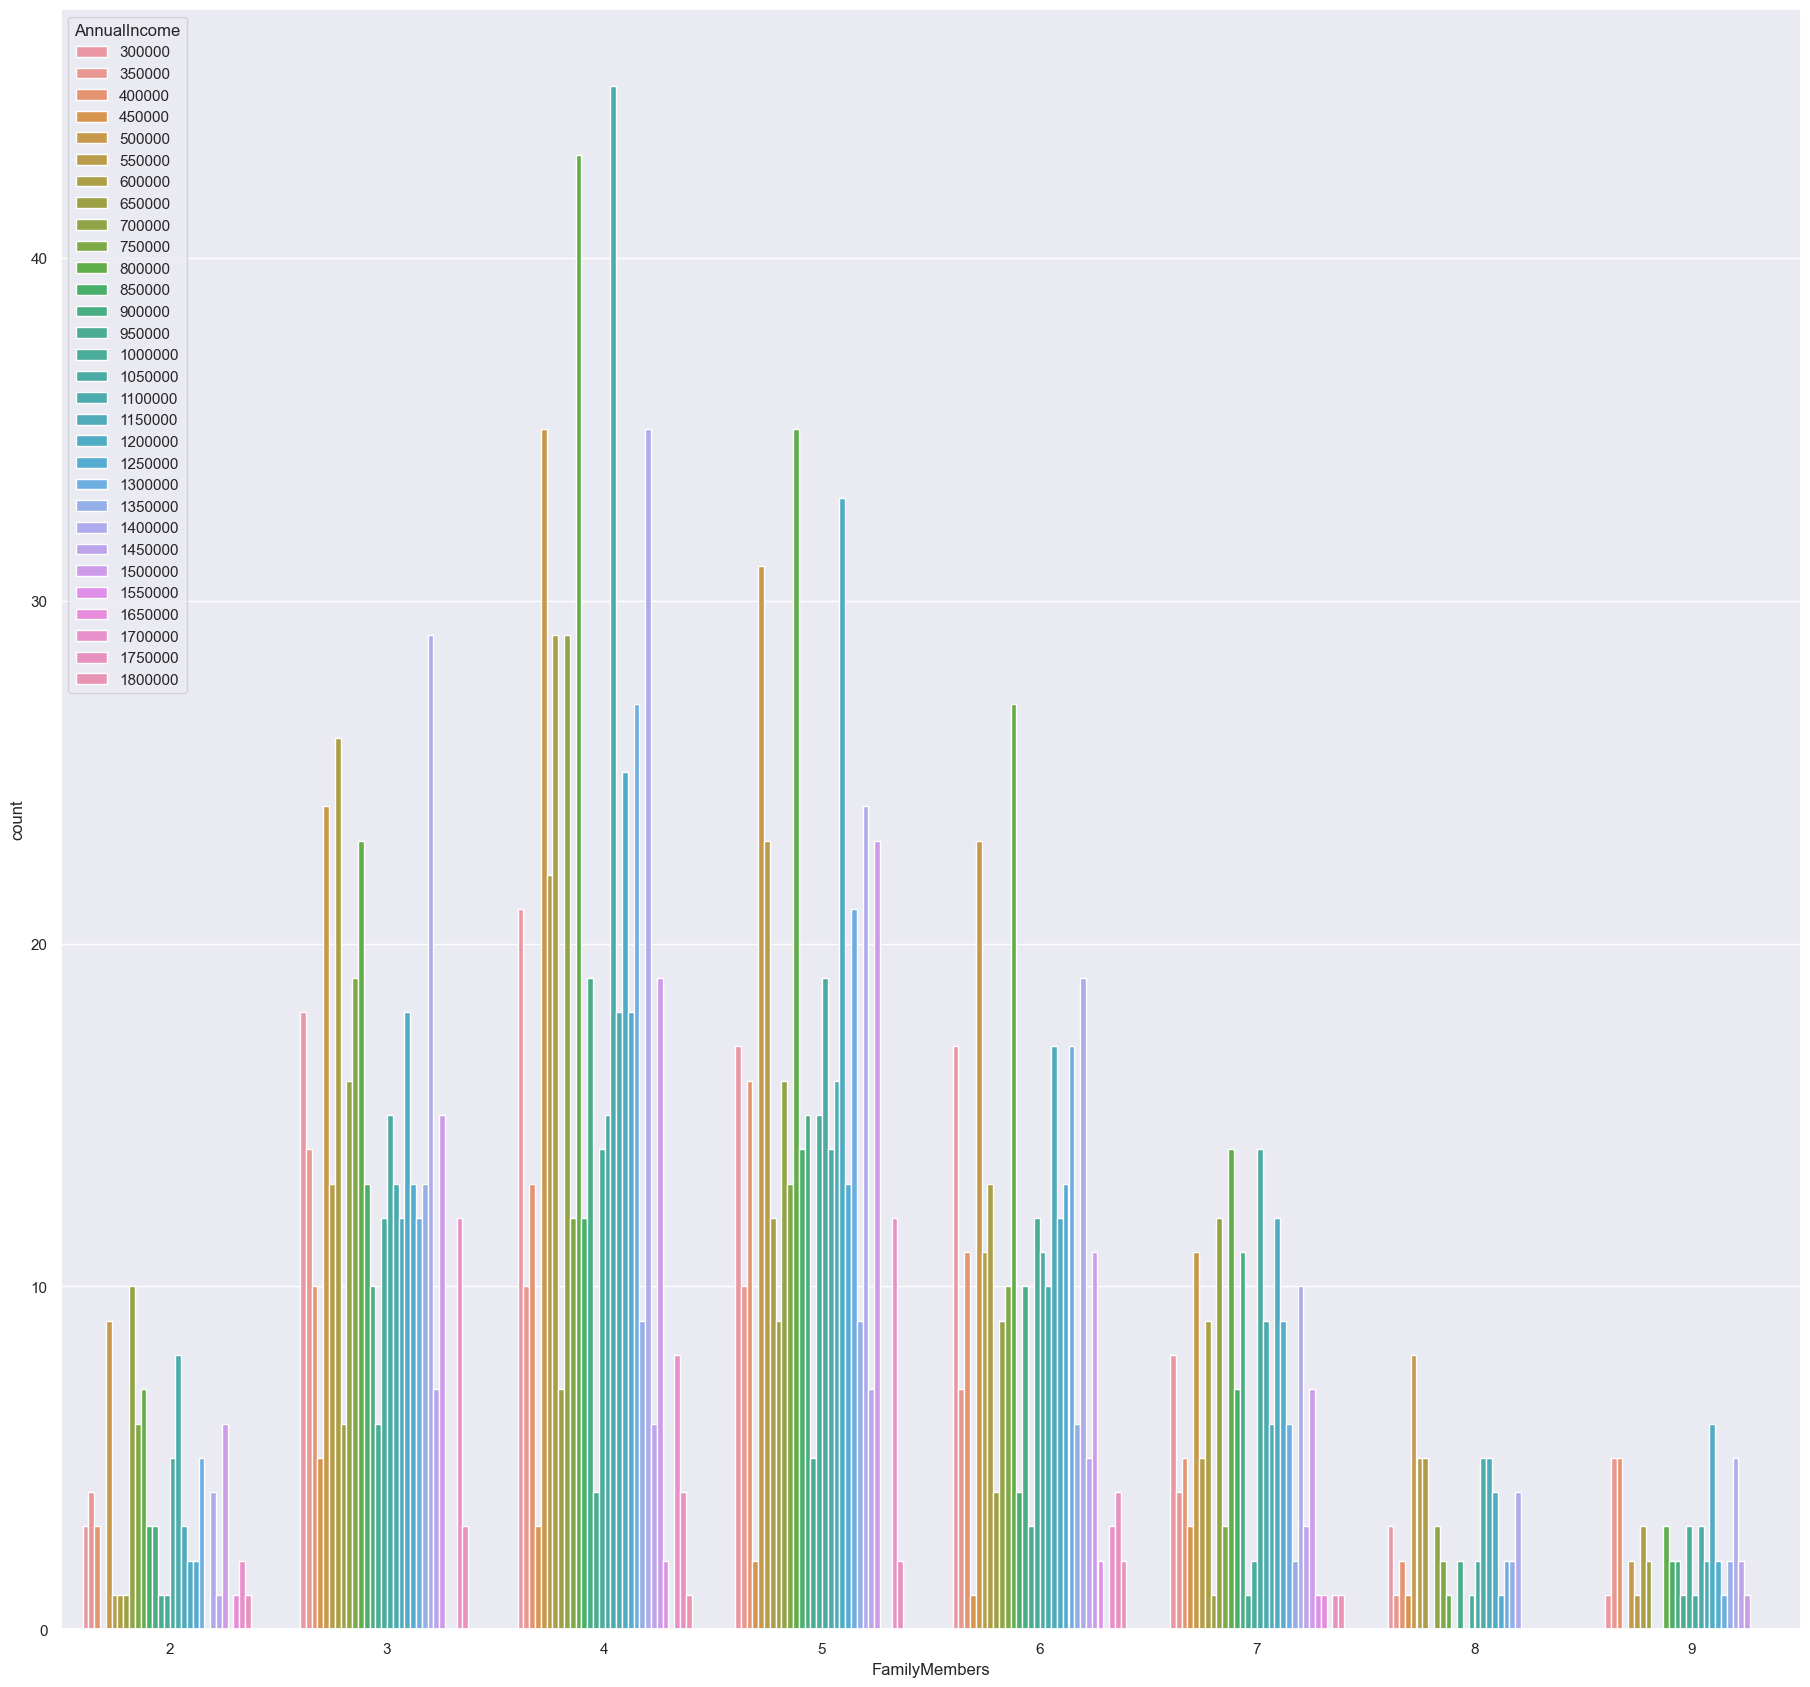

In [126]:
#Countplot
fig, ax = plt.subplots(figsize=(20,20))
sns.countplot(hue='AnnualIncome',x='FamilyMembers',data=df)

plt.show()

**Intepretasi**

Berdasarkan grafik dapat terlihat bahwa customer dengan penghasilan terbesaar atau diatas 1,3 juta mayoritas memiliki 4 anggota keluarga. Berdasarkan hal ini mungkin bisa dilihat income/capita tiap customer.

**5.EverTravelledAbroad VS FrequentFlyer**

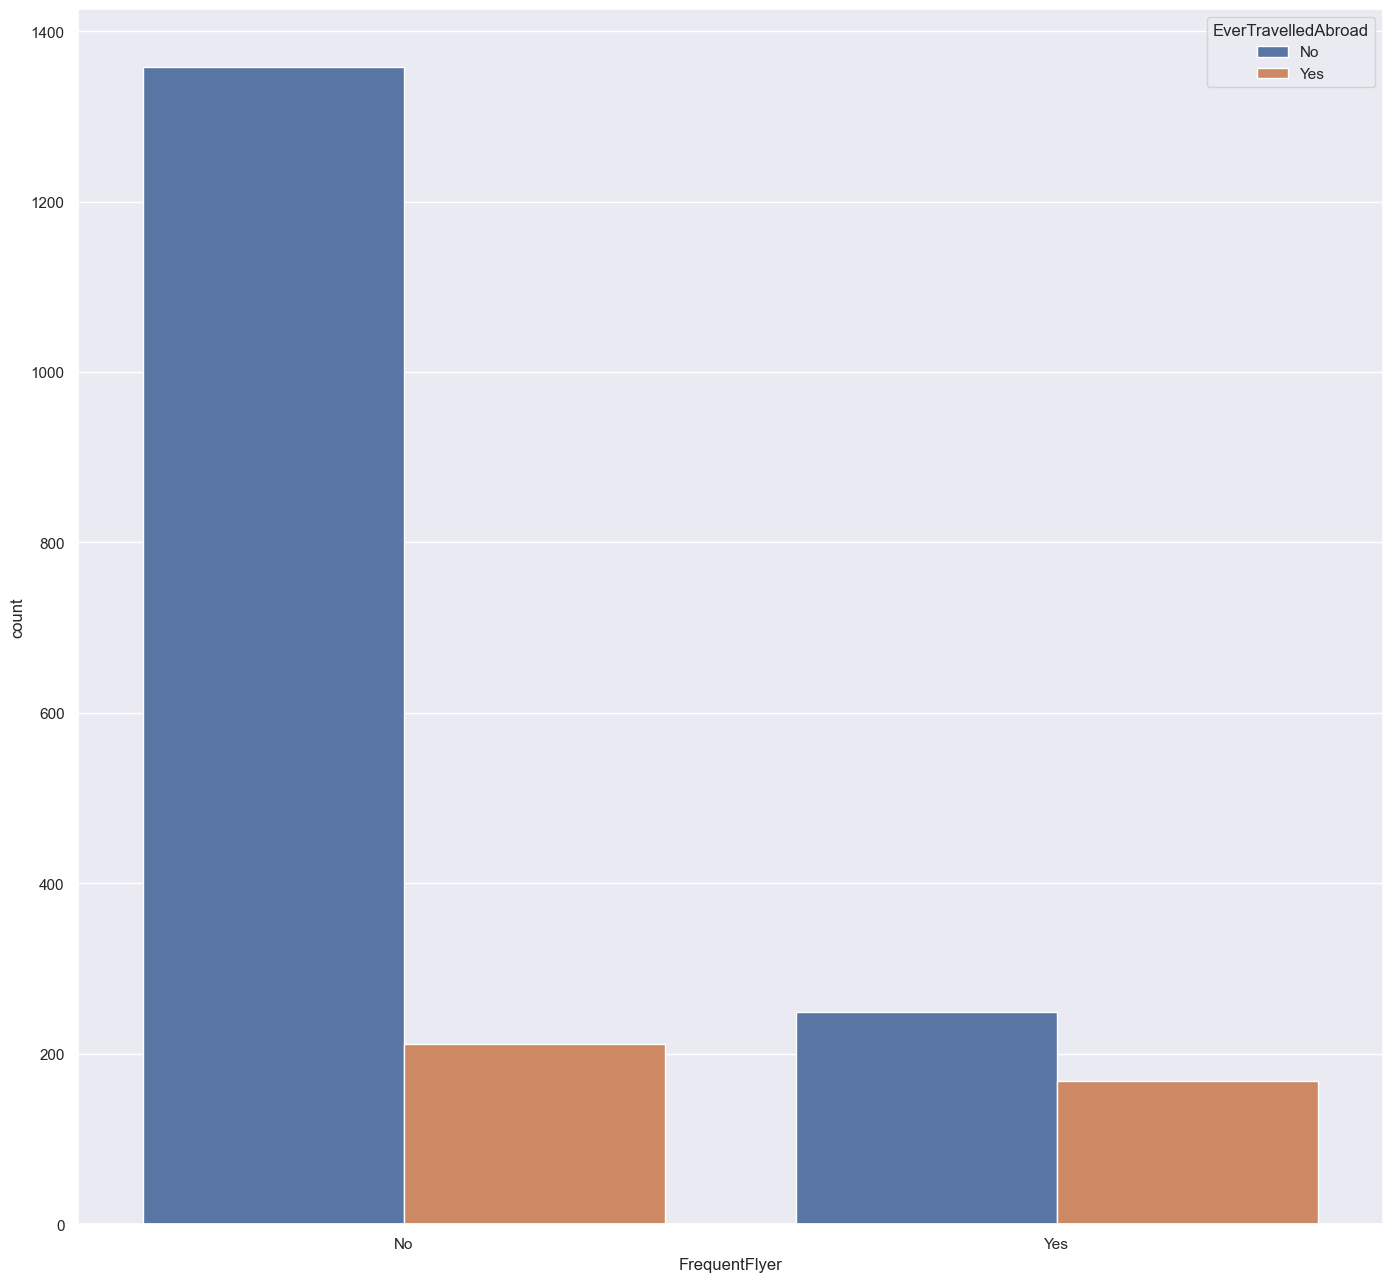

In [127]:
#Countplot
df_EverTravelledAbroad_FrequentFlyer = df.copy()
df_EverTravelledAbroad_FrequentFlyer['FrequentFlyer'] = df_EverTravelledAbroad_FrequentFlyer['FrequentFlyer'].astype(str)
df_EverTravelledAbroad_FrequentFlyer['EverTravelledAbroad'] = df_EverTravelledAbroad_FrequentFlyer['EverTravelledAbroad'].astype(str)
df_EverTravelledAbroad_FrequentFlyer['FrequentFlyer'] = df_EverTravelledAbroad_FrequentFlyer['FrequentFlyer'].replace(['0','1'], ['No','Yes'])
df_EverTravelledAbroad_FrequentFlyer['EverTravelledAbroad'] = df_EverTravelledAbroad_FrequentFlyer['EverTravelledAbroad'].replace(['0','1'], ['No','Yes'])
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(hue='EverTravelledAbroad',x='FrequentFlyer',data=df_EverTravelledAbroad_FrequentFlyer)

plt.show()

**Intepretasi**

Berdasarkan grafik dapat dilihat bahwa orang yang sering menggunakan bepergian menggunakan pesawat hampir setengahnya pernah berpergian  menggunakan pesawat. Walaupun begitu, mayoritas customer yang sering bepergian menggunakan pesawat belum pernah ke luar negeri.

**A. Korelasi masing-masing feature dan label :**


Usulan feature yang perlu dipertahankan :
- Annual Income
- Ever Travelled Abroad
- Frequent Flyer
- Employment Type
- Family Member
- Age


**B.Korelasi antar feature**:
- Tidak ada fitur yang redundant
- Mungkin bisa melakukan Feature Extraction antara family member dan annual income karena bisa menjadi sumber insight baru yakni Income per- capita.

### Business Insight

**Segmentasi untuk Melihat dan Membaca Business Insight**

In [180]:
def segment(x):
    if x['AnnualIncome'] < 900000:
        segment = 'Low'
    elif x['AnnualIncome'] <= 1250000 and x['AnnualIncome'] >= 900000:
        segment = 'Mid'
    else:
        segment = 'High'
    return segment

df['segment'] = df.apply(lambda x: segment(x), axis=1)

**Plot rasio pada EverTravelled Abroad dan Annual Income terhadap Travel Insurance**

In [182]:
p = df.groupby(['EverTravelledAbroad', 'segment', 'TravelInsurance'])['index'].nunique().reset_index()

p['Combinasi'] = p['EverTravelledAbroad'] + '-' + p['segment'].astype(str)

pp = p.groupby(['Combinasi', 'TravelInsurance'])['index'].sum()

ppp = pp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='rasio')
pppp = ppp.merge(pp.reset_index(), how = 'inner', on = ['Combinasi', 'TravelInsurance'])
pppp

Combinasi  TravelInsurance      rasio  index
0    No-High                0  45.774648     65
1    No-High                1  54.225352     77
2     No-Low                0  78.372352    703
3     No-Low                1  21.627648    194
4     No-Mid                0  75.176056    427
5     No-Mid                1  24.823944    141
6   Yes-High                0   7.382550     22
7   Yes-High                1  92.617450    276
8    Yes-Low                0  65.217391     30
9    Yes-Low                1  34.782609     16
10   Yes-Mid                0  83.333333     30
11   Yes-Mid                1  16.666667      6

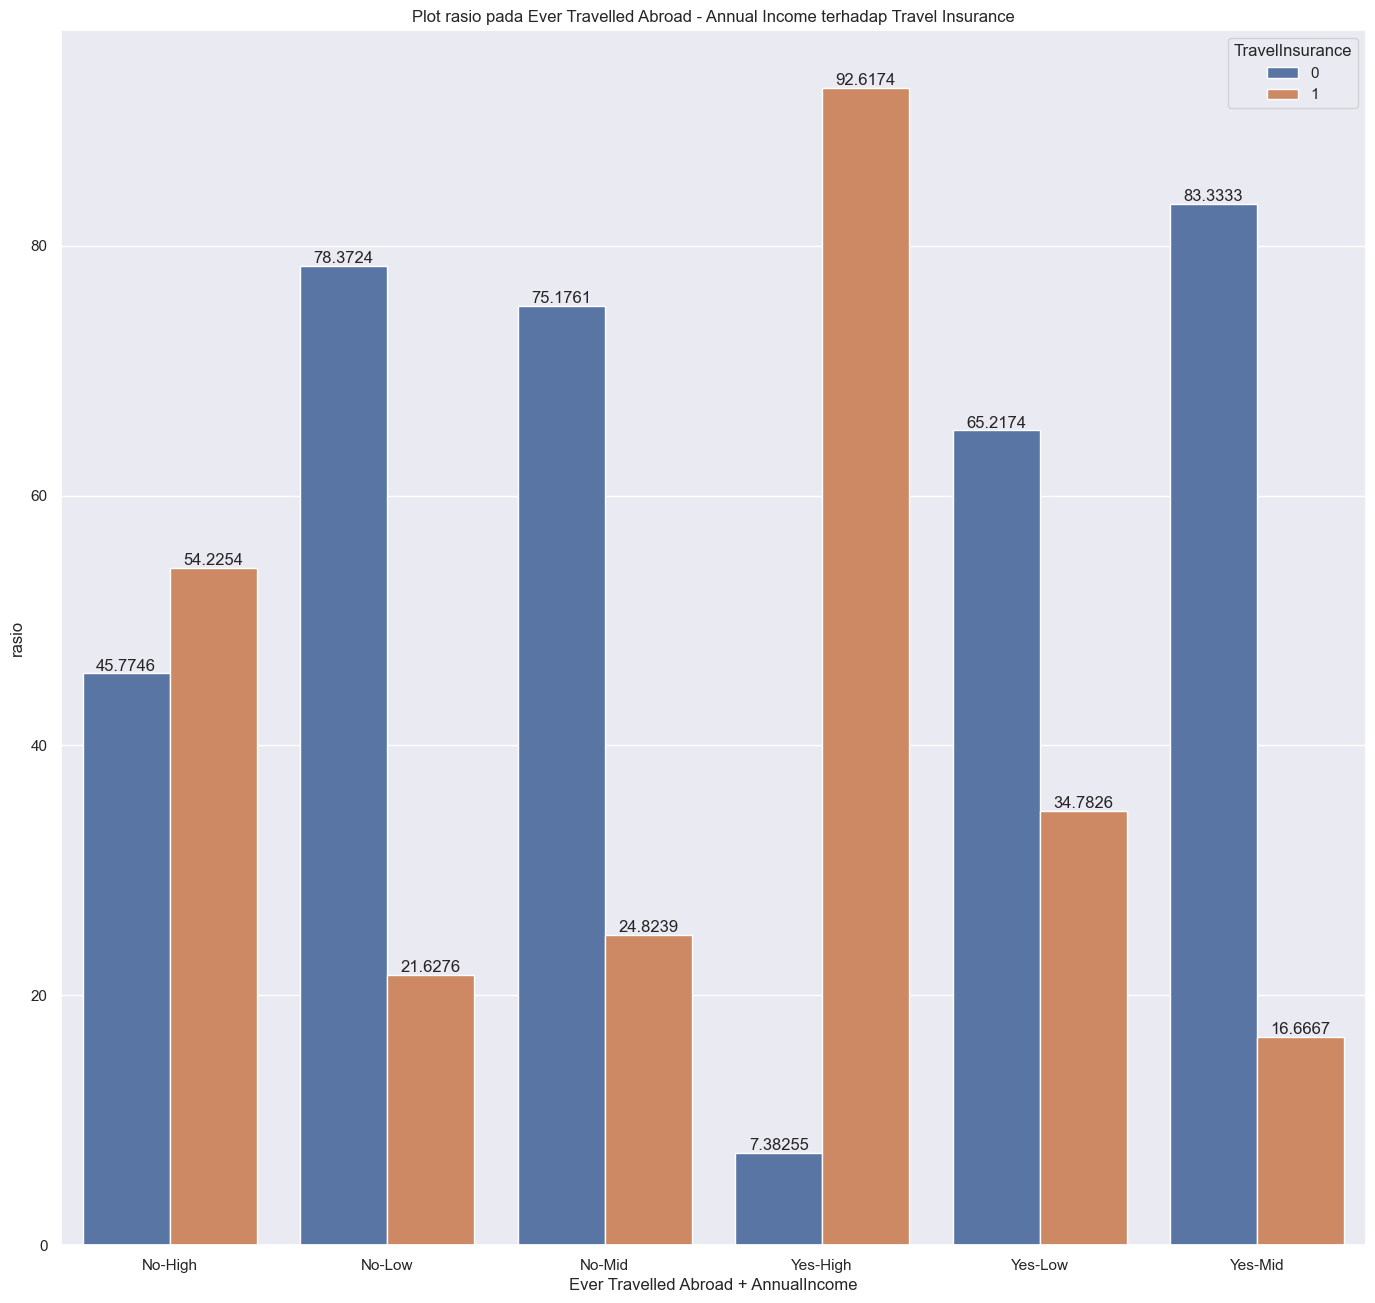

In [183]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x='Combinasi', y='rasio',data=pppp, hue='TravelInsurance')
plt.xticks(rotation = 0)
plt.xlabel('Ever Travelled Abroad + AnnualIncome')
plt.title('Plot rasio pada Ever Travelled Abroad - Annual Income terhadap Travel Insurance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Intepretasi**

- Dengan menggunakan multi barplot dari fitur yang dipilih menggunakan heatmap, kita mendapatkan gambaran bahwasanya:4

- Orang-orang yang pernah berpergian ke luar negeri dan memiliki penghasilan yang tinggi(setelah dilakukan segmentasi) memiliki kecenderungan yang paling tinggi untuk membeli travel insurance, diikuti dengan mereka yang tidak pernah ke luar negeri dan memiliki penghasilan tinggi.


**Plot rasio pada FrequentFlyer dan Annual Income terhadap Travel Insurance**

In [184]:
p = df.groupby(['FrequentFlyer', 'segment', 'TravelInsurance'])['index'].nunique().reset_index()

p['Combinasi'] = p['FrequentFlyer'] + '-' + p['segment'].astype(str)

pp = p.groupby(['Combinasi', 'TravelInsurance'])['index'].sum()

ppp = pp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='rasio')
pppp = ppp.merge(pp.reset_index(), how = 'inner', on = ['Combinasi', 'TravelInsurance'])
pppp

Combinasi  TravelInsurance      rasio  index
0    No-High                0  30.172414     70
1    No-High                1  69.827586    162
2     No-Low                0  77.937650    650
3     No-Low                1  22.062350    184
4     No-Mid                0  75.198413    379
5     No-Mid                1  24.801587    125
6   Yes-High                0   8.173077     17
7   Yes-High                1  91.826923    191
8    Yes-Low                0  76.146789     83
9    Yes-Low                1  23.853211     26
10   Yes-Mid                0  78.000000     78
11   Yes-Mid                1  22.000000     22

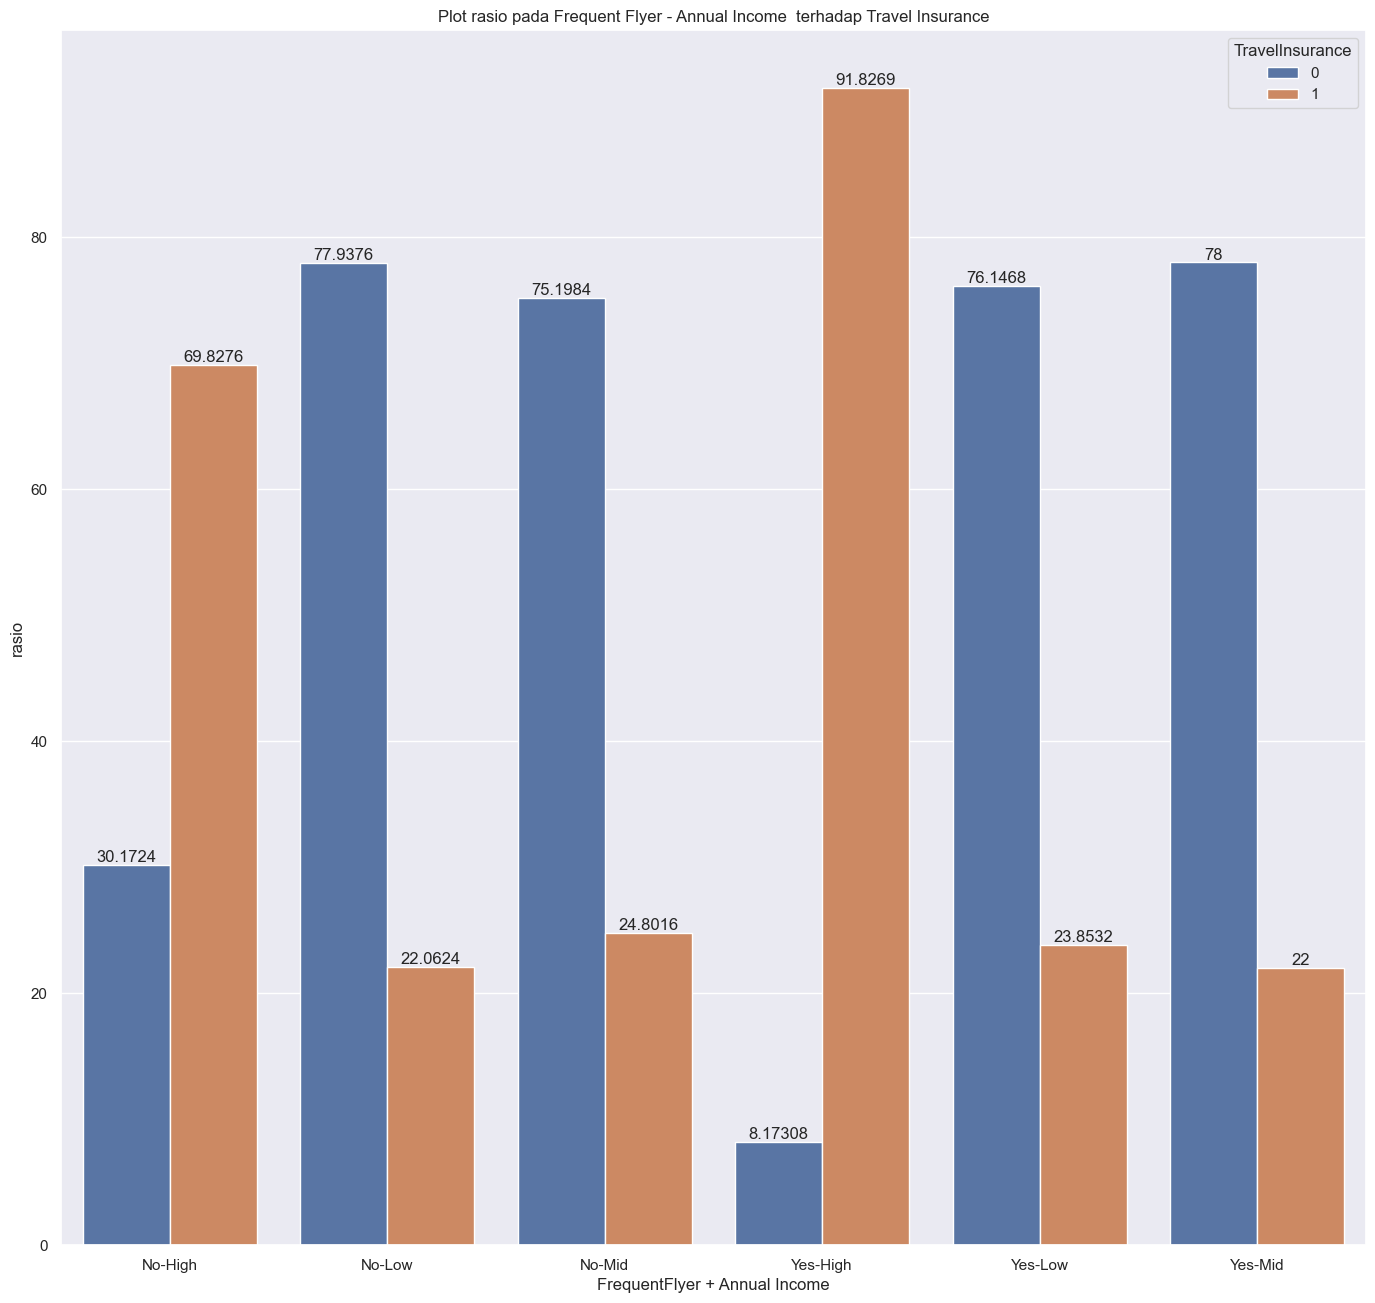

In [185]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x='Combinasi', y='rasio',data=pppp, hue='TravelInsurance')
plt.xticks(rotation = 0)
plt.xlabel('FrequentFlyer + Annual Income')
plt.title('Plot rasio pada Frequent Flyer - Annual Income  terhadap Travel Insurance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Intepretasi**

Dari plot di samping dapat dilihat bahwasanya orang-orang yang sering terbang dan berasal dari segment pendapatan yang tinggi memiliki kecenderungan untuk membeli travel insurance dibanding mereka yang sering terbang tetapi berasal dari segment pendapatan low atau mid, bahkan yang berasal dari segment low punya kecenderungan untuk membeli travel insurance daripada orang-orang yang sering terbang dan berasal dari segment pendapatan mid.


**Plot rasio pada Employment Type dan Annual Income terhadap Travel Insurance**

In [186]:
p = df.groupby(['Employment Type', 'segment', 'TravelInsurance'])['index'].nunique().reset_index()

p['Combinasi'] = p['Employment Type'] + '-' + p['segment'].astype(str)

pp = p.groupby(['Combinasi', 'TravelInsurance'])['index'].sum()

ppp = pp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='rasio')
pppp = ppp.merge(pp.reset_index(), how = 'inner', on = ['Combinasi', 'TravelInsurance'])
pppp

Combinasi  TravelInsurance      rasio  index
0              Government Sector-High                0  44.827586     26
1              Government Sector-High                1  55.172414     32
2               Government Sector-Low                0  81.887755    321
3               Government Sector-Low                1  18.112245     71
4               Government Sector-Mid                0  69.166667     83
5               Government Sector-Mid                1  30.833333     37
6   Private Sector/Self Employed-High                0  15.968586     61
7   Private Sector/Self Employed-High                1  84.031414    321
8    Private Sector/Self Employed-Low                0  74.773140    412
9    Private Sector/Self Employed-Low                1  25.226860    139
10   Private Sector/Self Employed-Mid                0  77.272727    374
11   Private Sector/Self Employed-Mid                1  22.727273    110

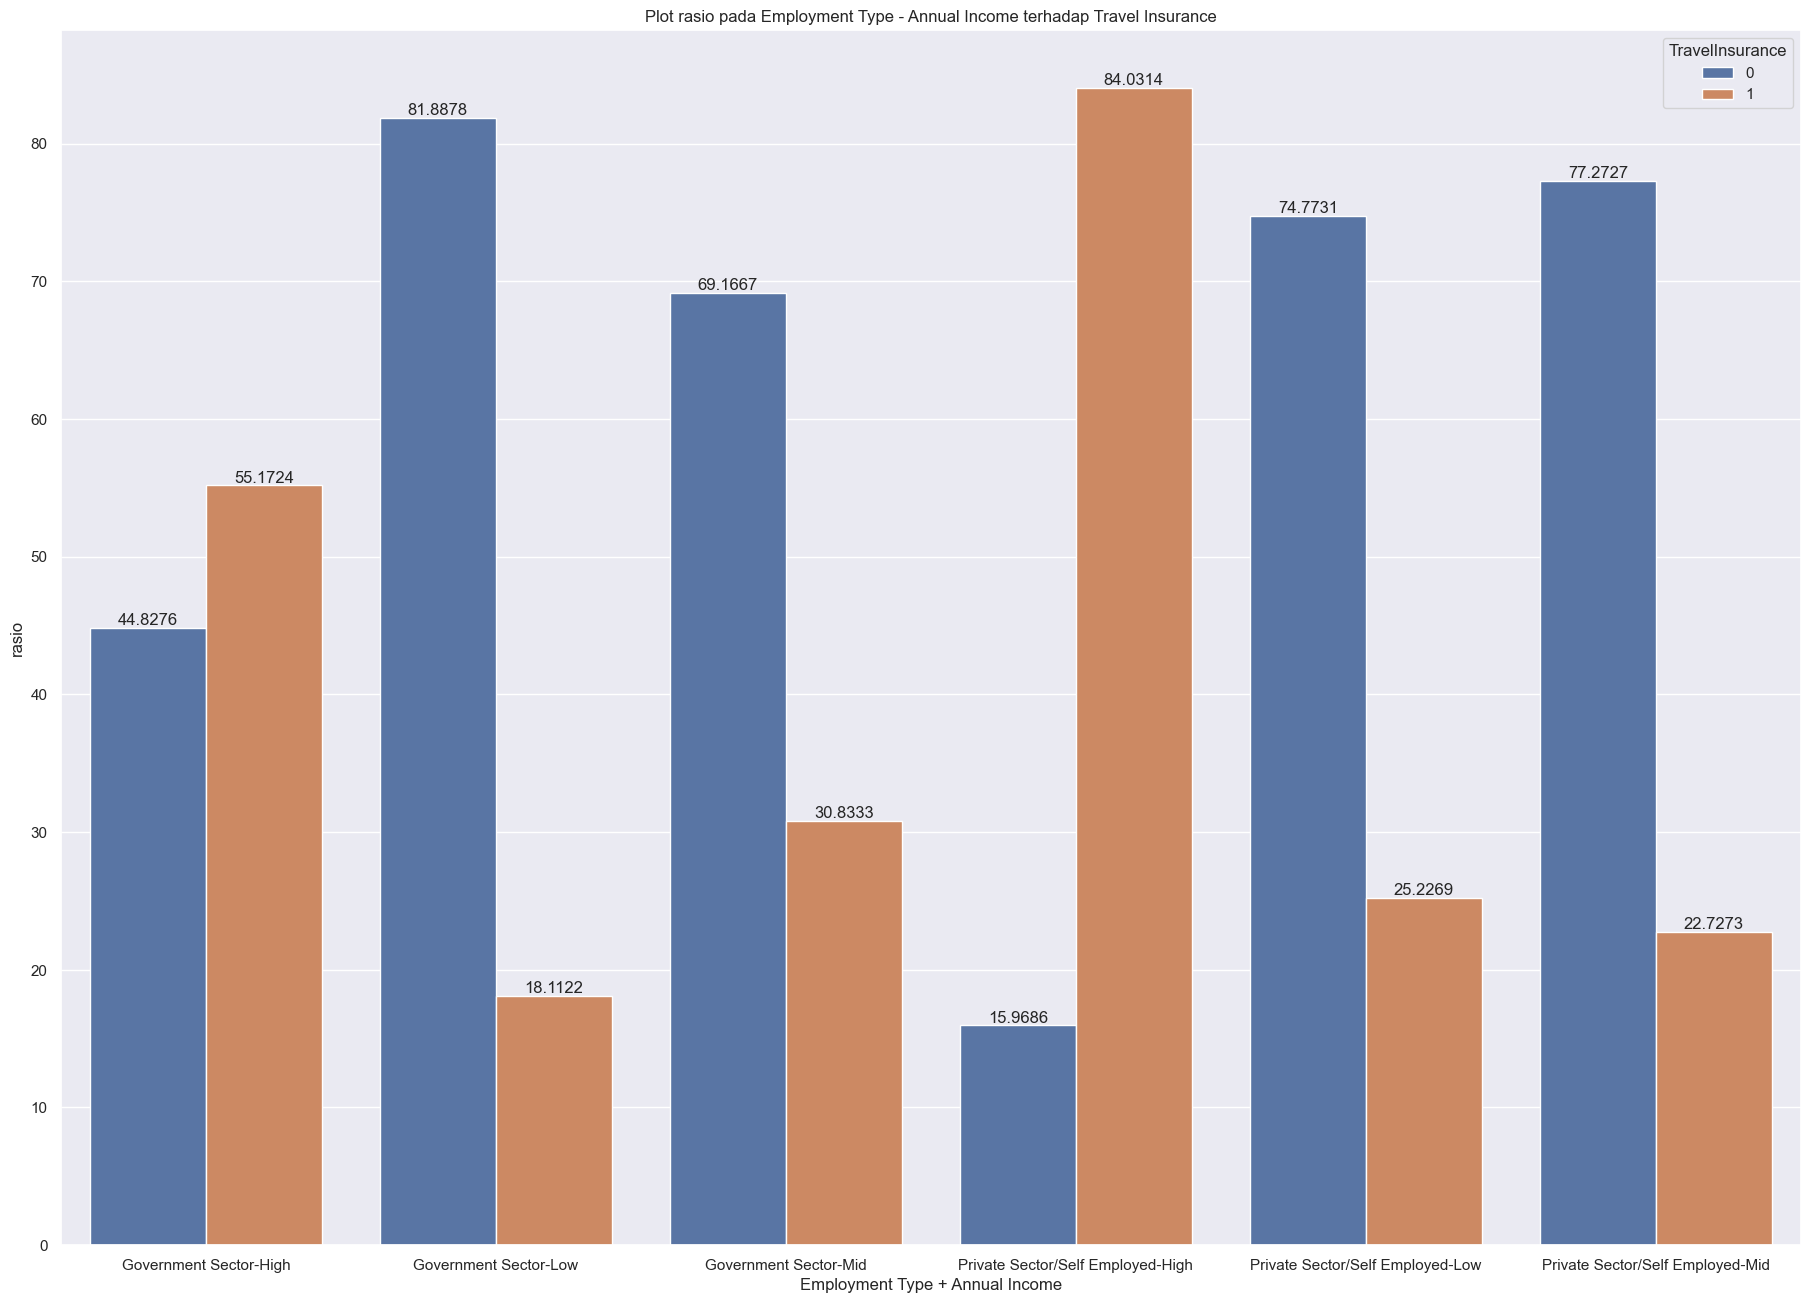

In [187]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.barplot(x='Combinasi', y='rasio',data=pppp, hue='TravelInsurance')
plt.xticks(rotation = 0)
plt.xlabel('Employment Type + Annual Income')
plt.title('Plot rasio pada Employment Type - Annual Income terhadap Travel Insurance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Intepretasi**

Dari plot di samping juga dapat dilihat bahwasanya orang-orang dari private sector dan berasal dari segment pendapatan High memiliki rasio pembelian travel insurance lebih tinggi daripada orang-orang yang berasal dari sektor pemerintahan dan berasal dari segment pendapatan yang sama, ini juga mungkin disebabkan dari kecenderungan orang-orang dari private sector yang sering melakukan penerbangan.

**Plot rasio pada Frequent Flyer dan Ever Travel Abroad terhadap Travel Insurance**

In [188]:
def segment_frequentflyer(z):
    if (z['FrequentFlyer']=='No'):
        segment ='No'
    elif (z['FrequentFlyer'])=='Yes':
        segment = 'Yes'
    return segment

df['segment_FrequentFlyer'] = df.apply(lambda z: segment_frequentflyer(z), axis=1)

In [189]:
p = df.groupby(['EverTravelledAbroad', 'segment_FrequentFlyer', 'TravelInsurance'])['index'].nunique().reset_index()

p['Combinasi_2'] = p['EverTravelledAbroad'] + '-' + p['segment_FrequentFlyer'].astype(str)

pp = p.groupby(['Combinasi_2', 'TravelInsurance'])['index'].sum()

ppp = pp.groupby(level=0).apply(lambda z:100 * z/ float(z.sum())).reset_index(name='rasio')
pppp = ppp.merge(pp.reset_index(), how = 'inner', on = ['Combinasi_2', 'TravelInsurance'])
pppp

Combinasi_2  TravelInsurance      rasio  index
0       No-No                0  76.362297   1037
1       No-No                1  23.637703    321
2      No-Yes                0  63.453815    158
3      No-Yes                1  36.546185     91
4      Yes-No                0  29.245283     62
5      Yes-No                1  70.754717    150
6     Yes-Yes                0  11.904762     20
7     Yes-Yes                1  88.095238    148

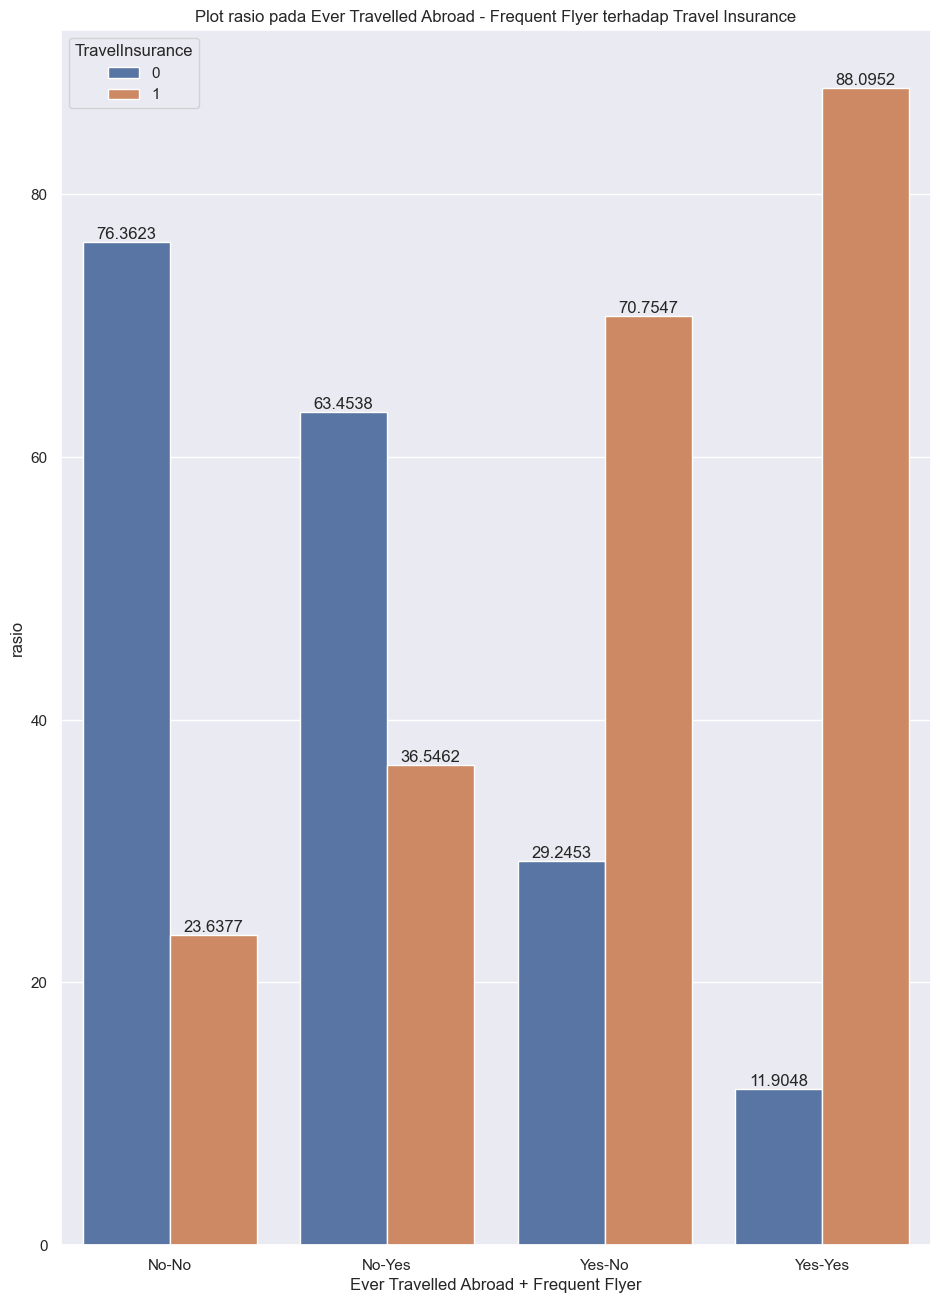

In [190]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x='Combinasi_2', y='rasio',data=pppp, hue='TravelInsurance')
plt.xticks(rotation = 0)
plt.xlabel('Ever Travelled Abroad + Frequent Flyer')
plt.title('Plot rasio pada Ever Travelled Abroad - Frequent Flyer terhadap Travel Insurance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Intepretasi**

Juga terlihat dari plot di samping bahwasanya orang-orang yang pernah terbang ke luar negeri dan juga sering melakukan penerbangan memiliki nilai pembelian insurance yang paling tinggi, diikuti dengan mereka yang pernah terbang ke luar negeri akan tetapi jarang melakukan penerbangan.


**Business Reccomendation**

- Tim marketing dapat membuat campaign yang berfokus kepada mereka yang berasal dari orang-orang yang sering melakukan penerbangan, orang-orang yang pernah melakukan penerbangan ke luar negeri, memiliki penghasilan yang tinggi dan bekerja di private sector sehingga lebih mudah untuk menarik perhatian dan minat mereka untuk membeli travel insurance.

- Tim marketing juga bisa mengurangi atau memberhentikan pemberian campaign kepada mereka yang berasal dari luar 4 kategori tadi agar cost campaign bisa menurun atau bisa dialokasikan kepada pemberian campaign kepada customer yang masuk ke dalam salah satu dari 4 kategori tadi.

- Campaign yang diberikan dapat berupa awareness kepada para customer atau calon customer yang masuk ke dalam salah satu dari ke-4 kategori tadi agar nantinya diharapkan mereka akan lebih memahami fungsi dari travel insurance yang disediakan oleh UNO Inc. 


## Data Preprocessing

### Data Cleansing

In [193]:
# Remove baris data duplikat
df = df.drop_duplicates(subset = ['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad',"TravelInsurance"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  1249 non-null   int64 
 1   Age                    1249 non-null   int64 
 2   Employment Type        1249 non-null   object
 3   GraduateOrNot          1249 non-null   object
 4   AnnualIncome           1249 non-null   int64 
 5   FamilyMembers          1249 non-null   int64 
 6   ChronicDiseases        1249 non-null   int64 
 7   FrequentFlyer          1249 non-null   object
 8   EverTravelledAbroad    1249 non-null   object
 9   TravelInsurance        1249 non-null   int64 
 10  segment                1249 non-null   object
 11  segment_FrequentFlyer  1249 non-null   object
dtypes: int64(6), object(6)
memory usage: 126.9+ KB


**Interpretasi** 

Setelah dilakukan remove baris duplikat, hanya tersisa 1249 baris data customer. 

### Feature Encoding

In [194]:
# Melakukan Categorial Encoding agar data kategorik bisa ditampilkan di heatmap
lambda x: 1 if x==True else 0
df['income_bracket'] = df['AnnualIncome'].apply(lambda x: 1 if x>= 1300001 else 0)
df['Employment Type']=df['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0,'Yes':1})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0,'Yes':1})

df.head()

index  Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0      0   31                0              1        400000              6   
1      1   31                1              1       1250000              7   
2      2   34                1              1        500000              4   
3      3   28                1              1        700000              3   
4      4   28                1              1        700000              8   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
0                1              0                    0                0   
1                0              0                    0                0   
2                1              0                    0                1   
3                1              0                    0                0   
4                1              1                    0                0   

  segment segment_FrequentFlyer  income_bracket  
0     Low                    No               0  
1     Mid                    No               0  
2     Low                    No               0  
3     Low                    No               0  
4     Low                   Yes               0

### Feature Selection

**Chi-Square**

<Axes: >

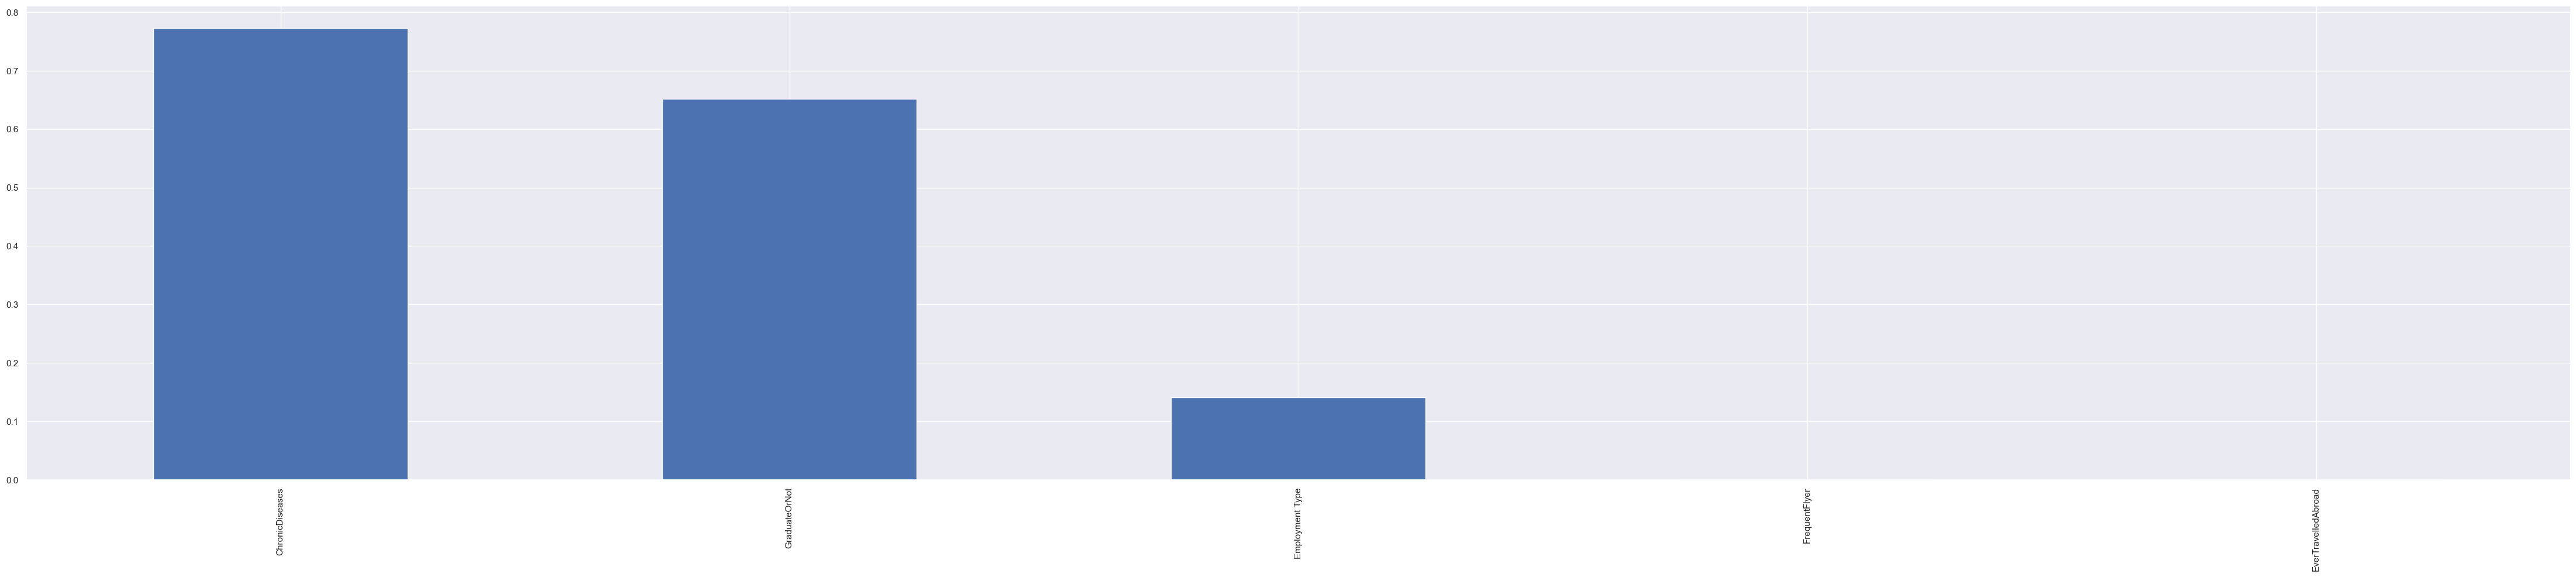

In [195]:
Cats = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad','ChronicDiseases']
df_cats = df[Cats]
df_cats = df_cats.astype(str)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cats['Employment Type'] = label_encoder.fit_transform(df_cats['Employment Type'])
df_cats['GraduateOrNot'] = label_encoder.fit_transform(df_cats['GraduateOrNot'])
df_cats['FrequentFlyer'] = label_encoder.fit_transform(df_cats['FrequentFlyer'])
df_cats['EverTravelledAbroad'] = label_encoder.fit_transform(df_cats['EverTravelledAbroad'])
df_cats['ChronicDiseases'] = label_encoder.fit_transform(df_cats['ChronicDiseases'])


from sklearn.feature_selection import chi2
X = df_cats
y = df['TravelInsurance']

chi_scores = chi2(X,y)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()


**Intepretasi**

Chi Square digunakan untuk fitur kategorik terhadap target kategorik. Fitur kategorik yang akan dites adalah GraduateOrNot, ChronicDiseasses, Employment Type, FrequentFlyer, EverTravelledAbroad.

Berdasarkan grafik diatas fitur yang digunakan :
- Employment Type
- FrequentFlyer
- EverTravelledAbroad


Berdasarkan hasil uji chi-square fitur yang tidak digunakan adalah GraduateOrNot dan ChronicDiseasses.


**Anova**

Feature Age: 4.718481
Feature AnnualIncome: 76.197528
Feature FamilyMembers: 7.776593


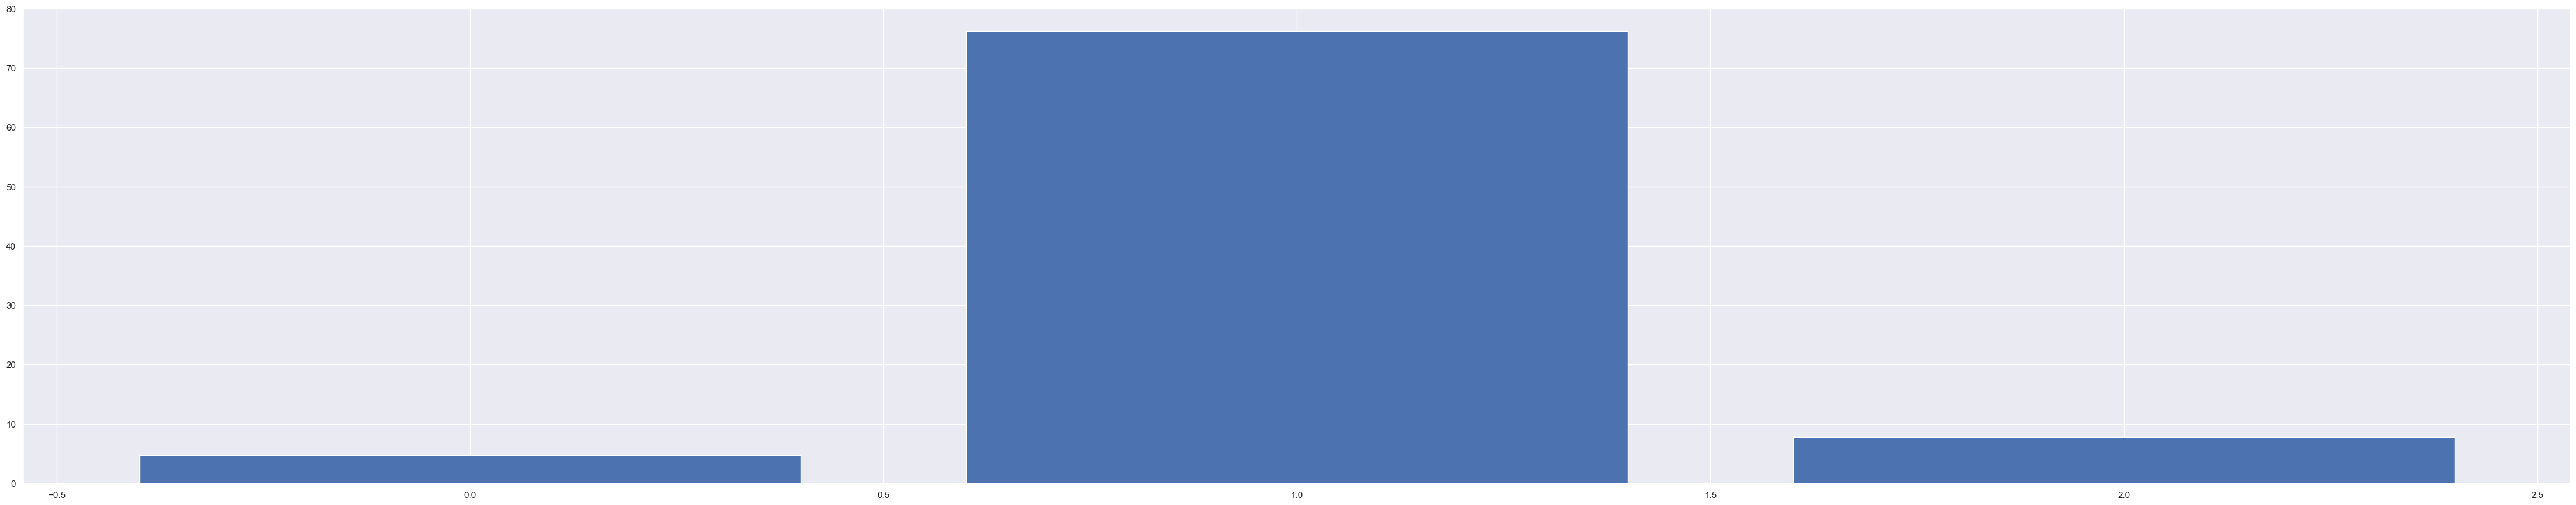

In [197]:
nums = ['Age','AnnualIncome','FamilyMembers']
df_nums = df[nums]

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X = df_nums
y = df["TravelInsurance"]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (nums[i], fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

**Intepretasi**

Anova digunakan untuk fitur numerik  terhadap target kategorik.

Berdasarkan grafik diatas fitur yang dapat digunakan :
- Age
- AnnualIncome
- FamilyMembers


Berdasarkan hasil Anova semua fitur bisa digunakan untuk pembuatan model. Walaupun begitu fitur FamilyMembers tidak akan digunakan dalam data preprocessing alasannya karena berdasarkan pandangan bisnis terkait produk yang ingin ditawarkan kepada customer yaitu produk untuk satu individu saja dan hanya mengcover individu yang membeli tersebut. Oleh sebab itu, fitur yang dipilih adalah Age dan AnnualIncome saja.

Selain itu, berdasarkan hasil analisa melalui heatmap di stage sebelumnya feature family member tidak berkorelasi kuat dengan target. 



**Tampilan Fitur yang dipilih untuk data preprocessing**

In [200]:
df.loc[:, df.columns.isin(['GraduateOrNot','ChronicDiseases', 'FamilyMembers'])]

GraduateOrNot  FamilyMembers  ChronicDiseases
0                 1              6                1
1                 1              7                0
2                 1              4                1
3                 1              3                1
4                 1              8                1
...             ...            ...              ...
1976              1              6                0
1981              1              3                0
1982              1              4                0
1983              1              5                1
1985              1              6                0

[1249 rows x 3 columns]

### Feature Extraction

In [201]:
#Kombinasi Frequent Flyer dan Ever Travelled Abroad
df["Traveller"]=df["FrequentFlyer"]*df["EverTravelledAbroad"]
df.head()


index  Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0      0   31                0              1        400000              6   
1      1   31                1              1       1250000              7   
2      2   34                1              1        500000              4   
3      3   28                1              1        700000              3   
4      4   28                1              1        700000              8   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
0                1              0                    0                0   
1                0              0                    0                0   
2                1              0                    0                1   
3                1              0                    0                0   
4                1              1                    0                0   

  segment segment_FrequentFlyer  income_bracket  Traveller  
0     Low                    No               0          0  
1     Mid                    No               0          0  
2     Low                    No               0          0  
3     Low                    No               0          0  
4     Low                   Yes               0          0

In [202]:
#Segmentasi low dan high dari kolom AnnualIncome
df['Income_Bracket'] = df['AnnualIncome'].apply(lambda x: 1 if x > 1300000 else 0)
df.head()

index  Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0      0   31                0              1        400000              6   
1      1   31                1              1       1250000              7   
2      2   34                1              1        500000              4   
3      3   28                1              1        700000              3   
4      4   28                1              1        700000              8   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
0                1              0                    0                0   
1                0              0                    0                0   
2                1              0                    0                1   
3                1              0                    0                0   
4                1              1                    0                0   

  segment segment_FrequentFlyer  income_bracket  Traveller  Income_Bracket  
0     Low                    No               0          0               0  
1     Mid                    No               0          0               0  
2     Low                    No               0          0               0  
3     Low                    No               0          0               0  
4     Low                   Yes               0          0               0

In [203]:
#pembagian umur menjadi di atas 30 dan di bawah 30
df['Age_Bracket'] = df['Age'].apply(lambda x: 1 if x < 31 else 0)

df.head()

index  Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0      0   31                0              1        400000              6   
1      1   31                1              1       1250000              7   
2      2   34                1              1        500000              4   
3      3   28                1              1        700000              3   
4      4   28                1              1        700000              8   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
0                1              0                    0                0   
1                0              0                    0                0   
2                1              0                    0                1   
3                1              0                    0                0   
4                1              1                    0                0   

  segment segment_FrequentFlyer  income_bracket  Traveller  Income_Bracket  \
0     Low                    No               0          0               0   
1     Mid                    No               0          0               0   
2     Low                    No               0          0               0   
3     Low                    No               0          0               0   
4     Low                   Yes               0          0               0   

   Age_Bracket  
0            0  
1            0  
2            0  
3            1  
4            1

## Machine Learning Evaluation & Supervised Learning

In [209]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("ROC-AUC (Test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    print('Precision (crossval train): '+ str(score['train_score'].mean()))
    print('Precision (crossval test): '+ str(score['test_score'].mean()))

In [210]:
# Pilihan data scenario
df1 = df[['Age','Employment Type','AnnualIncome','FrequentFlyer','EverTravelledAbroad','TravelInsurance']]
df2 = df[['Age','Employment Type','AnnualIncome','Traveller','TravelInsurance']]
df3 = df[['Age_Bracket','Employment Type','AnnualIncome','Traveller','TravelInsurance']]
df4 = df[['Age_Bracket','Employment Type','Income_Bracket','Traveller','TravelInsurance']]
df5 = df[['Age','Employment Type','Income_Bracket','Traveller','TravelInsurance']]
df6 = df[['Age','Employment Type','Income_Bracket','FrequentFlyer','EverTravelledAbroad','TravelInsurance']]

Berikut adalah penjelasan untuk data scenario yang sudah dibuat:
1. df1 merupakan keseluruhan feature selection yaitu (Age, Employment Type, AnnualIncome, FrequentFlyer, EverTravelledAbroad, dan TravelInsurance).
2. df2 menggunakan feature extraction Traveller yang merupakan gabungan dari feature FrequentFlyer dan  EverTravelledAbroad. Fungsinya adalah untuk melihat impact feature Traveller terhadap performa model. 
3. df3 sama seperti df2, akan tetapi untuk feature Age, diubah menjadi feature Age_Bracket. Tujuannya untuk melihat impact dari Age_Bracket terhadap performa model dari df2.
4. df4 sama seperti df3, akan tetapi untuk feature Annual Income, diubah menjadi feature Income_Bracket. Tujuannya untuk melihat impact dari Income_Bracket terhadap performa model dari df3.
5. df5 sama seperti df4, akan tetapi untuk feature Age_Bracket, diubah menjadi feature Age. Tujuannya, untuk melihat perubahan performa model dari df4 jika tanpa feature Age_Bracket. 
5. df6 sama seperti df1, akan tetapi untuk feature Traveller, diubah kembali menjadi feature FrequentFlyer dan  EverTravelledAbroad. Tujuannya, untuk melihat perubahan performa model jika hanya ada perubahan feature  Annual Income, diubah menjadi feature Income_Bracket.  

### Modeling - Logistic Regression

In [211]:
#Menggunakan df1
X = df1.drop(columns=['TravelInsurance'])
y = df1['TravelInsurance']

#Split data train & test df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.62
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
ROC-AUC (Test-proba): 0.31
Precision (crossval train): 0.0
Precision (crossval test): 0.0


In [212]:
#Menggunakan df2
X = df2.drop(columns=['TravelInsurance'])
y = df2['TravelInsurance']

#Split data train & test df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.62
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
ROC-AUC (Test-proba): 0.31
Precision (crossval train): 0.0
Precision (crossval test): 0.0


In [213]:
#Menggunakan df3
X = df3.drop(columns=['TravelInsurance'])
y = df3['TravelInsurance']

#Split data train & test df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.62
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
ROC-AUC (Test-proba): 0.31
Precision (crossval train): 0.0
Precision (crossval test): 0.0


In [214]:
#Menggunakan df4
X = df4.drop(columns=['TravelInsurance'])
y = df4['TravelInsurance']

#Split data train & test df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.84
Precision (Test Set): 0.87
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.8472878109650221
Precision (crossval test): 0.8431024279411374


In [215]:
#Menggunakan df5
X = df5.drop(columns=['TravelInsurance'])
y = df5['TravelInsurance']

#Split data train & test df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.84
Precision (Test Set): 0.87
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.8486591337913414
Precision (crossval test): 0.8431024279411374


In [216]:
#Menggunakan df6
X = df6.drop(columns=['TravelInsurance'])
y = df6['TravelInsurance']

#Split data train & test df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.80
Precision (Test Set): 0.85
Recall (Test Set): 0.40
F1-Score (Test Set): 0.54
ROC-AUC (Test-proba): 0.68
Precision (crossval train): 0.8447009081070815
Precision (crossval test): 0.8433922830136013


**Hasil analisa**



1.   Perfoma model untuk data scenario 1, 2, dan 3 menunjukkan angka 0 karena??
2.   Pada saat menggunakan data scenario 4, performa model langsung mengalami peningkatan ke angka 87% .  Artinya, feature Income Bracket memiliki feature importance yang tinggi pada performa model.
3.   Berdasarkan performa model di point 2, pada data scenario 5 dan 6 dilakukan percobaan untuk melihat performa model dengan mengubah feature Age Bracket menjadi Age kembali begitu juga dengan feature Traveller  diubah kembali menjadi Frequent Flyer dan Ever Travelled Abroad. Hasilnya tidak ada perubahan performa model untuk data scenario 5 dan terjadi penurunan 2% dengan menggunakan data scenario 6.
4.   Dari penjelasan 3 point di atas, dapat disimpulkan bahwa feature Income Bracket sangat berpengaruh pada performa model.






### Modeling - K-Nearest Neighbor

In [217]:
#Menggunakan df1
X = df1.drop(columns=['TravelInsurance'])
y = df1['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.66
Precision (Train Set): 0.74
Precision (Test Set): 0.58
Recall (Test Set): 0.43
F1-Score (Test Set): 0.50
ROC-AUC (Test-proba): 0.66
Precision (crossval train): 0.7582951346768333
Precision (crossval test): 0.657219040729166


In [218]:
#Menggunakan df2
X = df2.drop(columns=['TravelInsurance'])
y = df2['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.68
Precision (Train Set): 0.71
Precision (Test Set): 0.62
Recall (Test Set): 0.45
F1-Score (Test Set): 0.52
ROC-AUC (Test-proba): 0.68
Precision (crossval train): 0.7341902759762103
Precision (crossval test): 0.6637845000404405


In [219]:
#Menggunakan df3
X = df3.drop(columns=['TravelInsurance'])
y = df3['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.73
Precision (Train Set): 0.71
Precision (Test Set): 0.72
Recall (Test Set): 0.47
F1-Score (Test Set): 0.57
ROC-AUC (Test-proba): 0.70
Precision (crossval train): 0.6796151206834746
Precision (crossval test): 0.624203712216968


In [220]:
#Menggunakan df4
X = df4.drop(columns=['TravelInsurance'])
y = df4['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.85
Precision (Test Set): 0.89
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.67
Precision (crossval train): 0.8578435690669884
Precision (crossval test): 0.834845594257359


In [221]:
#Menggunakan df5
X = df5.drop(columns=['TravelInsurance'])
y = df5['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.69
Precision (Train Set): 0.61
Precision (Test Set): 0.60
Recall (Test Set): 0.55
F1-Score (Test Set): 0.57
ROC-AUC (Test-proba): 0.68
Precision (crossval train): 0.6568742425444645
Precision (crossval test): 0.6600304844003115


In [222]:
#Menggunakan df6
X = df6.drop(columns=['TravelInsurance'])
y = df6['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.69
Precision (Train Set): 0.64
Precision (Test Set): 0.60
Recall (Test Set): 0.53
F1-Score (Test Set): 0.57
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.7419543424050223
Precision (crossval test): 0.7170918104653045


**Hasil analisa**

1.	Perfoma model dengan menggunakan algoritma KNN memiliki hasil yang cukup beragam pada setiap data scenario yang digunakan. Hal ini terjadi kemungkinan besar karena belum dilakukan feature transformation pada data yang dipakai . Sedangkan algoritma ini memperhitungkan jarak pada prosesnya. 
2. Selanjutnya perlu dilakukan feature transformation jika memakai algoritma KNN ini. 


### Modeling - Decision Tree

In [223]:
#Menggunakan df1
X = df1.drop(columns=['TravelInsurance'])
y = df1['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.65
Precision (Train Set): 0.81
Precision (Test Set): 0.55
Recall (Test Set): 0.40
F1-Score (Test Set): 0.47
ROC-AUC (Test-proba): 0.64
Precision (crossval train): 0.8492653047275983
Precision (crossval test): 0.6526538900364849


In [224]:
#Menggunakan df2
X = df2.drop(columns=['TravelInsurance'])
y = df2['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.67
Precision (Train Set): 0.77
Precision (Test Set): 0.59
Recall (Test Set): 0.44
F1-Score (Test Set): 0.51
ROC-AUC (Test-proba): 0.68
Precision (crossval train): 0.8159369371601274
Precision (crossval test): 0.6849243137993845


In [225]:
#Menggunakan df3
X = df3.drop(columns=['TravelInsurance'])
y = df3['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.71
Precision (Train Set): 0.79
Precision (Test Set): 0.72
Recall (Test Set): 0.41
F1-Score (Test Set): 0.52
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.8110734630741903
Precision (crossval test): 0.7348191249325551


In [252]:
#Menggunakan df4
X = df4.drop(columns=['TravelInsurance'])
y = df4['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.85
Precision (Test Set): 0.89
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.8628751619794144
Precision (crossval test): 0.8510003258390355


In [233]:
#Menggunakan df5
X = df5.drop(columns=['TravelInsurance'])
y = df5['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.78
Precision (Test Set): 0.78
Recall (Test Set): 0.43
F1-Score (Test Set): 0.56
ROC-AUC (Test-proba): 0.70
Precision (crossval train): 0.8078940551173133
Precision (crossval test): 0.7595706656051483


In [234]:
#Menggunakan df6
X = df6.drop(columns=['TravelInsurance'])
y = df6['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.73
Precision (Train Set): 0.84
Precision (Test Set): 0.78
Recall (Test Set): 0.42
F1-Score (Test Set): 0.55
ROC-AUC (Test-proba): 0.70
Precision (crossval train): 0.8553664620410342
Precision (crossval test): 0.7860429099175903


### Modeling - Random Forest

In [235]:
#Menggunakan df1
X = df1.drop(columns=['TravelInsurance'])
y = df1['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model random forest dari data train
eval_classification(rf)

Accuracy (Test Set): 0.65
Precision (Train Set): 0.78
Precision (Test Set): 0.55
Recall (Test Set): 0.45
F1-Score (Test Set): 0.50
ROC-AUC (Test-proba): 0.67
Precision (crossval train): 0.794490823209215
Precision (crossval test): 0.5980282070315136


In [236]:
#Menggunakan df2
X = df2.drop(columns=['TravelInsurance'])
y = df2['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model random forest dari data train
eval_classification(rf)

Accuracy (Test Set): 0.65
Precision (Train Set): 0.74
Precision (Test Set): 0.56
Recall (Test Set): 0.47
F1-Score (Test Set): 0.51
ROC-AUC (Test-proba): 0.68
Precision (crossval train): 0.7828266681057652
Precision (crossval test): 0.6475398752482086


In [237]:
#Menggunakan df3
X = df3.drop(columns=['TravelInsurance'])
y = df3['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model random forest dari data train
eval_classification(rf)

Accuracy (Test Set): 0.71
Precision (Train Set): 0.76
Precision (Test Set): 0.70
Recall (Test Set): 0.43
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.7829973278753766
Precision (crossval test): 0.7125612318715767


In [238]:
#Menggunakan df4
X = df4.drop(columns=['TravelInsurance'])
y = df4['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model random forest dari data train
eval_classification(rf)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.85
Precision (Test Set): 0.89
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.8600534679316694
Precision (crossval test): 0.8333986928104575


In [239]:
#Menggunakan df5
X = df5.drop(columns=['TravelInsurance'])
y = df5['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model random forest dari data train
eval_classification(rf)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.78
Precision (Test Set): 0.78
Recall (Test Set): 0.43
F1-Score (Test Set): 0.56
ROC-AUC (Test-proba): 0.70
Precision (crossval train): 0.8034044402790238
Precision (crossval test): 0.7595706656051483


In [240]:
#Menggunakan df6
X = df6.drop(columns=['TravelInsurance'])
y = df6['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model random forest dari data train
eval_classification(rf)

Accuracy (Test Set): 0.73
Precision (Train Set): 0.83
Precision (Test Set): 0.75
Recall (Test Set): 0.42
F1-Score (Test Set): 0.54
ROC-AUC (Test-proba): 0.71
Precision (crossval train): 0.8427586130707253
Precision (crossval test): 0.787895964917387


**Hasil analisa**

1.	Performa model dengan menggunakan algoritma Decission Tree mirip dengan algoritma Random Forest untuk setiap data scenario karena algoritma Random Forest merupakan turunan dari algoritma Decission Tree.
2. Hasil model dengan menggunakan data scenario 1, 2, 3 masih mengalami overfitting.
3. Hasil model dengan menggunakan data scenario 2 tidak ada perbedaan signifikan dengan performa model dengan menggunakan data scenario 1.  Artinya, feature extraction Frequent Flyer dan Ever Travelled Abroad mejadi Traveller tidak memberikan pengaruh apapun pada performa model. 
4. Dengan menggunakan data scenario 3, performa model naik 24%. Hal ini berarti, adanya feature Age Bracket berpengaruh pada performa model. 
5. Performa model terbaik ditunjukkan saat menggunakan data scenario 4, dimana precision mencapai angka 89%. Artinya, perubahan feature Annual Income menjadi Income Bracket, berpengaruh pada performa model. 



### Modeling - Adaboost

In [241]:
#Menggunakan df1
X = df1.drop(columns=['TravelInsurance'])
y = df1['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = AdaBoostClassifier(random_state=42) # inisiasi object dengan nama clf
clf.fit(X_train, y_train) # fit model Adaboost dari data train
eval_classification(clf)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.75
Precision (Test Set): 0.82
Recall (Test Set): 0.43
F1-Score (Test Set): 0.56
ROC-AUC (Test-proba): 0.72
Precision (crossval train): 0.7972232935503254
Precision (crossval test): 0.7789743589743588


In [242]:
#Menggunakan df2
X = df2.drop(columns=['TravelInsurance'])
y = df2['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = AdaBoostClassifier(random_state=42) # inisiasi object dengan nama clf
clf.fit(X_train, y_train) # fit model Adaboost dari data train
eval_classification(clf)

Accuracy (Test Set): 0.75
Precision (Train Set): 0.80
Precision (Test Set): 0.84
Recall (Test Set): 0.42
F1-Score (Test Set): 0.56
ROC-AUC (Test-proba): 0.72
Precision (crossval train): 0.8106236794831698
Precision (crossval test): 0.796733326635227


In [243]:
#Menggunakan df3
X = df3.drop(columns=['TravelInsurance'])
y = df3['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = AdaBoostClassifier(random_state=42) # inisiasi object dengan nama clf
clf.fit(X_train, y_train) # fit model Adaboost dari data train
eval_classification(clf)

Accuracy (Test Set): 0.75
Precision (Train Set): 0.89
Precision (Test Set): 0.92
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.70
Precision (crossval train): 0.8991940760978722
Precision (crossval test): 0.8956792950551501


In [244]:
#Menggunakan df4
X = df4.drop(columns=['TravelInsurance'])
y = df4['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = AdaBoostClassifier(random_state=42) # inisiasi object dengan nama clf
clf.fit(X_train, y_train) # fit model Adaboost dari data train
eval_classification(clf)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.84
Precision (Test Set): 0.87
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.850055850696252
Precision (crossval test): 0.8431024279411374


In [245]:
#Menggunakan df5
X = df5.drop(columns=['TravelInsurance'])
y = df5['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = AdaBoostClassifier(random_state=42) # inisiasi object dengan nama clf
clf.fit(X_train, y_train) # fit model Adaboost dari data train
eval_classification(clf)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.78
Precision (Test Set): 0.82
Recall (Test Set): 0.41
F1-Score (Test Set): 0.55
ROC-AUC (Test-proba): 0.72
Precision (crossval train): 0.7986146741692859
Precision (crossval test): 0.7912098043800172


In [246]:
#Menggunakan df6
X = df6.drop(columns=['TravelInsurance'])
y = df6['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = AdaBoostClassifier(random_state=42) # inisiasi object dengan nama clf
clf.fit(X_train, y_train) # fit model Adaboost dari data train
eval_classification(clf)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.76
Precision (Test Set): 0.80
Recall (Test Set): 0.42
F1-Score (Test Set): 0.55
ROC-AUC (Test-proba): 0.71
Precision (crossval train): 0.7858730367053958
Precision (crossval test): 0.771639287177921


**Hasil analisa**


1.	Modeling dengan menggunakan algoritma Adaboost menunjukkan performa terbaik 92% pada saat menggunakan data scenario 3 yaitu dengan adanya feature extraction Age Bracket dan Traveller.
2. Sedangkan untuk model dengan data scenario 4, menunjukkan performa turun ke 87%.
3. Untuk analisa lebih dalam, akan dilakukan cek dengan menggunakan k-fold cross validation di section selanjutnya. 



### Model Terbaik



1. Berdasarkan hasil modeling dan model evaluation yang sudah dilakukan, dipilih model dengan menggunakan algoritma **Decision Tree** dengan metrics model Precision 89% pada data scenario 4 yang terdiri dari feature **‘Age Bracket','Employment Type','Income Bracket’, dan 'Traveller'**

2. Dari hasil k-fold cross validation beberapa algoritma machine learning yang sudah dilakukan, bisa diketahui bahwa untuk model Decision Tree dengan data scenario 4 sudah **best fit** di mana crossval train lebih besar dari crossval test dengan selisih yang tidak terlalu jauh. Oleh karena itu tidak dilakukan hyperparameter tuning di tahap selanjutnya. 





### Hyperparameter Tuning


In [248]:
##DecTre
#Menggunakan df4
X = df4.drop(columns=['TravelInsurance'])
y = df4['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.85
Precision (Test Set): 0.89
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.69
Precision (crossval train): 0.8628751619794144
Precision (crossval test): 0.8510003258390355


In [249]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.74
Precision (Train Set): 0.84
Precision (Test Set): 0.87
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
ROC-AUC (Test-proba): 0.67
Precision (crossval train): 0.8619530113106648
Precision (crossval test): 0.8373380867498514
